In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import colors
%matplotlib inline
from itertools import product

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans

!pip install kneed
from kneed import KneeLocator, DataGenerator as dg
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score


from sklearn.metrics import mutual_info_score, adjusted_rand_score


import warnings 
warnings.filterwarnings("ignore")


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [115]:
#definign data set

Data = pd.read_csv('Customer_Data.csv', encoding=('unicode-escape'))
Data

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [116]:
Df = pd.DataFrame(Data)
Df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [117]:
Df.describe(include='all')

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count     8950   8950.000000        8950.000000   8950.000000   
unique    8950           NaN                NaN           NaN   
top     C10001           NaN                NaN           NaN   
freq         1           NaN                NaN           NaN   
mean       NaN   1564.474828           0.877271   1003.204834   
std        NaN   2081.531879           0.236904   2136.634782   
min        NaN      0.000000           0.000000      0.000000   
25%        NaN    128.281915           0.888889     39.635000   
50%        NaN    873.385231           1.000000    361.280000   
75%        NaN   2054.140036           1.000000   1110.130000   
max        NaN  19043.138560           1.000000  49039.570000   

        ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count        8950.000000             8950.000000   8950.000000   
unique               NaN                     NaN           NaN   
top                  NaN                     NaN           NaN   
freq                 NaN                     NaN           NaN   
mean          592.437371              411.067645    978.871112   
std          1659.887917              904.338115   2097.163877   
min             0.000000                0.000000      0.000000   
25%             0.000000                0.000000      0.000000   
50%            38.000000               89.000000      0.000000   
75%           577.405000              468.637500   1113.821139   
max         40761.250000            22500.000000  47137.211760   

        PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count           8950.000000                 8950.000000   
unique                  NaN                         NaN   
top                     NaN                         NaN   
freq                    NaN                         NaN   
mean               0.490351                    0.202458   
std                0.401371                    0.298336   
min                0.000000                    0.000000   
25%                0.083333                    0.000000   
50%                0.500000                    0.083333   
75%                0.916667                    0.300000   
max                1.000000                    1.000000   

        PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                        8950.000000             8950.000000   
unique                               NaN                     NaN   
top                                  NaN                     NaN   
freq                                 NaN                     NaN   
mean                            0.364437                0.135144   
std                             0.397448                0.200121   
min                             0.000000                0.000000   
25%                             0.000000                0.000000   
50%                             0.166667                0.000000   
75%                             0.750000                0.222222   
max                             1.000000                1.500000   

        CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count        8950.000000    8950.000000   8949.000000   8950.000000   
unique               NaN            NaN           NaN           NaN   
top                  NaN            NaN           NaN           NaN   
freq                 NaN            NaN           NaN           NaN   
mean            3.248827      14.709832   4494.449450   1733.143852   
std             6.824647      24.857649   3638.815725   2895.063757   
min             0.000000       0.000000     50.000000      0.000000   
25%             0.000000       1.000000   1600.000000    383.276166   
50%             0.000000       7.000000   3000.000000    856.901546   
75%             4.000000      17.000000   6500.000000   1901.134317   
max           123.000000     358.000000  30000.000000  50721.483360   

        MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENUR

In [118]:
Df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8945    False
8946    False
8947    False
8948    False
8949    False
Length: 8950, dtype: bool

In [119]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [120]:
#EDA phase

Df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [121]:
Df=Data.drop("CUST_ID",axis=1)
Df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322               NaN          0.000000       6  
8947    81

In [122]:
Df['MINIMUM_PAYMENTS'] = Df['MINIMUM_PAYMENTS'].fillna(0)
Df['CREDIT_LIMIT'] = Df['CREDIT_LIMIT'].fillna(0)
Df.head()


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000          0.000000          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [123]:
Df.dropna()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000          0.000000          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322          0.000000          0.000000       6  
8947    81

In [124]:
#Definig a unique values for categorical features
print (pd.unique(Df['CASH_ADVANCE_TRX']))
print (pd.unique(Df['PURCHASES_TRX']))
print (pd.unique(Df['TENURE']))


[  0   4   1   3   6  13   5  16  10   2  11   7  12  37  27  23  21  14
  40   8   9  26  15  18  28  24  20  17  22  31 123  52  51  62  19  25
  30  29  53  45  43  42 107  38  56  39  32  33  50  34  63  36 110  47
  48  71  35  93  80  44  61  46  49  69  41]
[  2   0  12   1   8  64   5   3   6  26  11   9  92  17  13  45  14  41
  27  20  87  18   4  42  61  33   7  50  22  23  60  46  75  31  10  34
  81  25  85 217  19  52 216  97  24  77 130  90  44  39  15  30  36 123
 151  21 101  49  98  28  84  93  72  38  99  62  48  16  32  51  74  29
  59  76  47 126 229  40 103 121 157 114  53  83  43  54 222  66 141  37
  79  70  80 194 117 100 111  67 219  55 152 104 182  88  82  71  78  35
 122 105 108  69 175 135  91  65  68 119  63 140 113 358  58 248 129  56
  89  57 139 176 136 195  73 109 208 115 110 147 273 102 185 171 168 232
  95  86 148 112 128 254 198 298 154 116 142 131 347 204 200  94 118 344
 162 308 199 309  96 274 224 143 133 127 186]
[12  8 11  9 10  7  6]


In [125]:
Df['CASH_ADVANCE_TRX']=Df['CASH_ADVANCE_TRX'].astype(float)
Df['PURCHASES_TRX']=Df['PURCHASES_TRX'].astype(float)
Df['TENURE']=Df['TENURE'].astype(float)
Df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000               0.0            2.0        1000.0   
1                   0.250000               4.0            0.0        7000.0   
2                   0.000000               0.0           12.0        7500.0   
3                   0.083333               1.0            1.0        7500.0   
4                   0.000000               0.0            1.0        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000               0.0            6.0        1000.0   
8946                0.000000               0.0            6.0        1000.0   
8947                0.000000               0.0            5.0        1000.0   
8948                0.166667               2.0            0.0         500.0   
8949                0.333333               2.0           23.0        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000    12.0  
1     4103.032597       1072.340217          0.222222    12.0  
2      622.066742        627.284787          0.000000    12.0  
3        0.000000          0.000000          0.000000    12.0  
4      678.334763        244.791237          0.000000    12.0  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000     6.0  
8946   275.861322          0.000000          0.000000     6.0  
8947    81

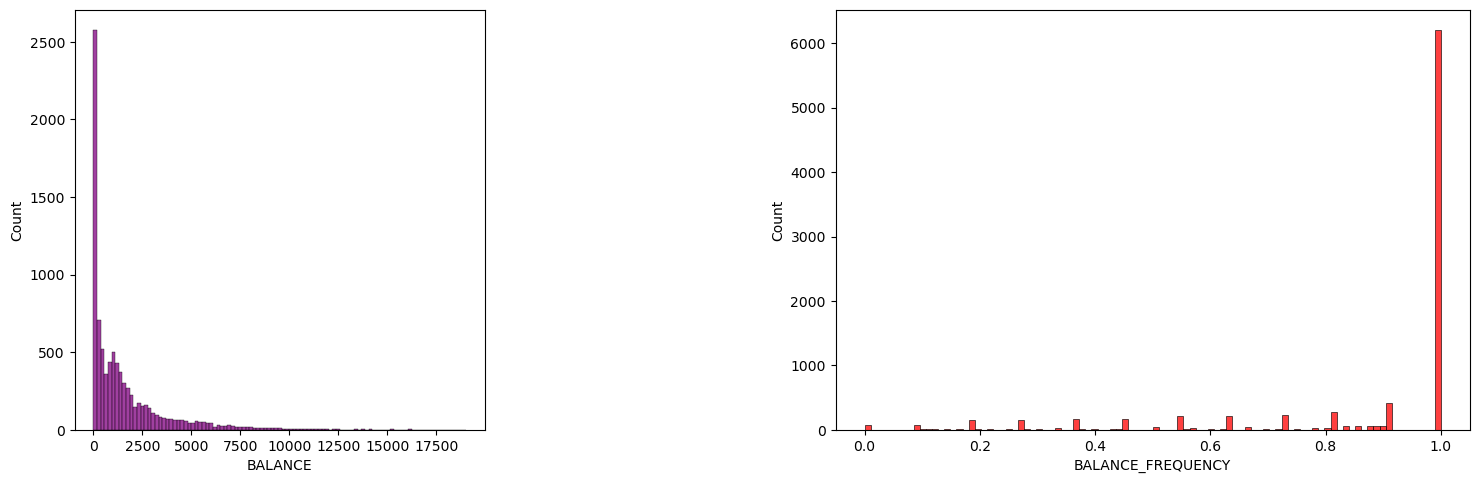

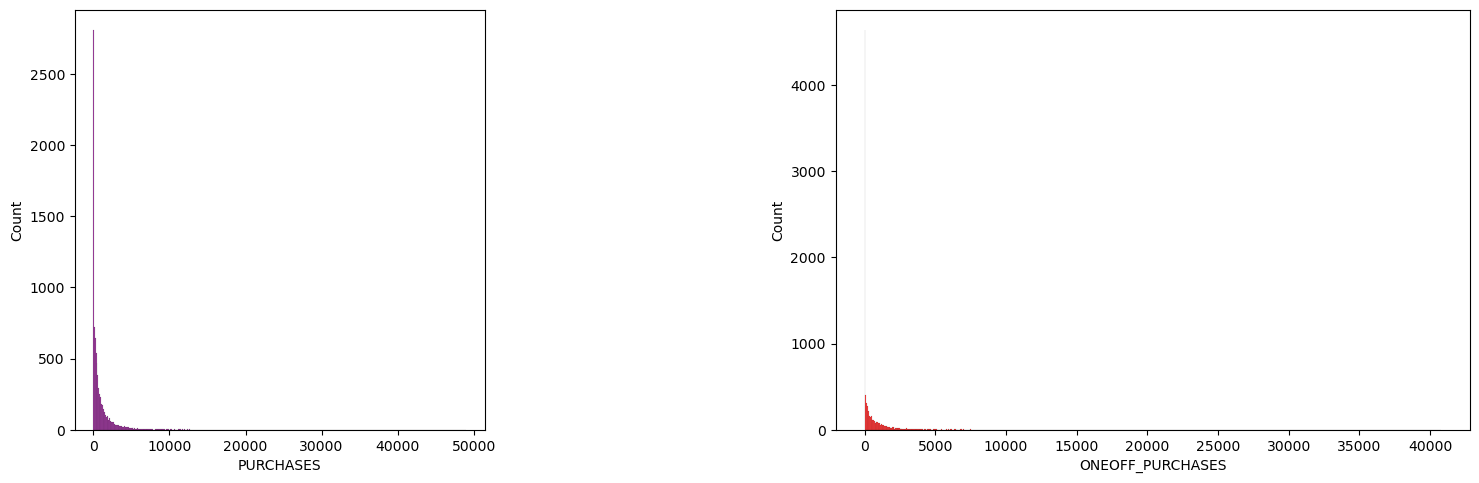

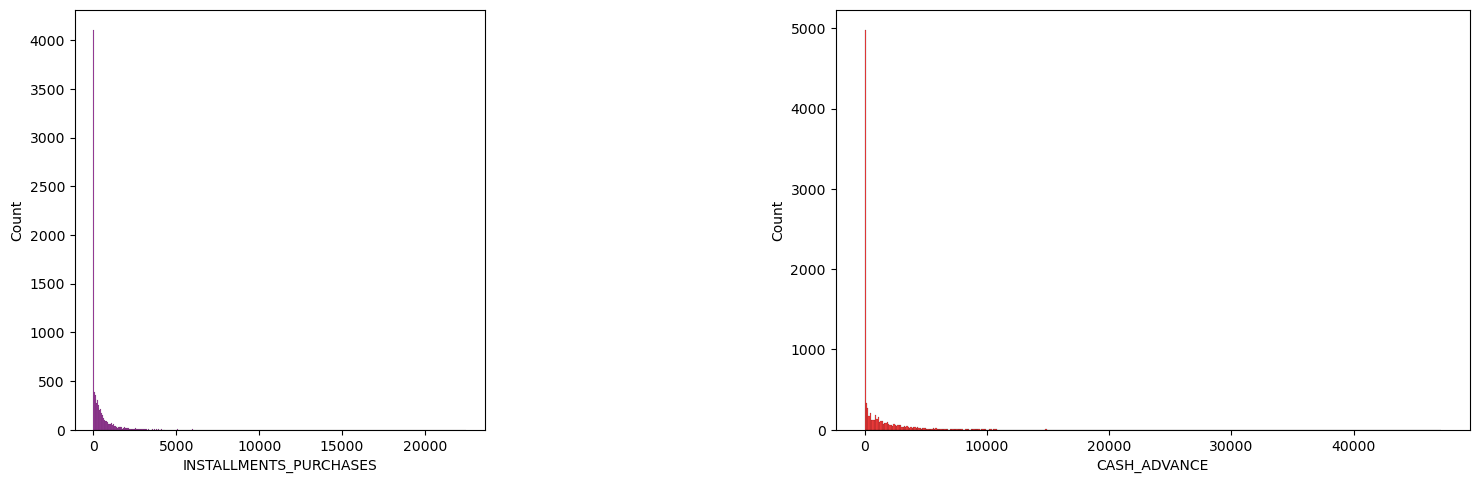

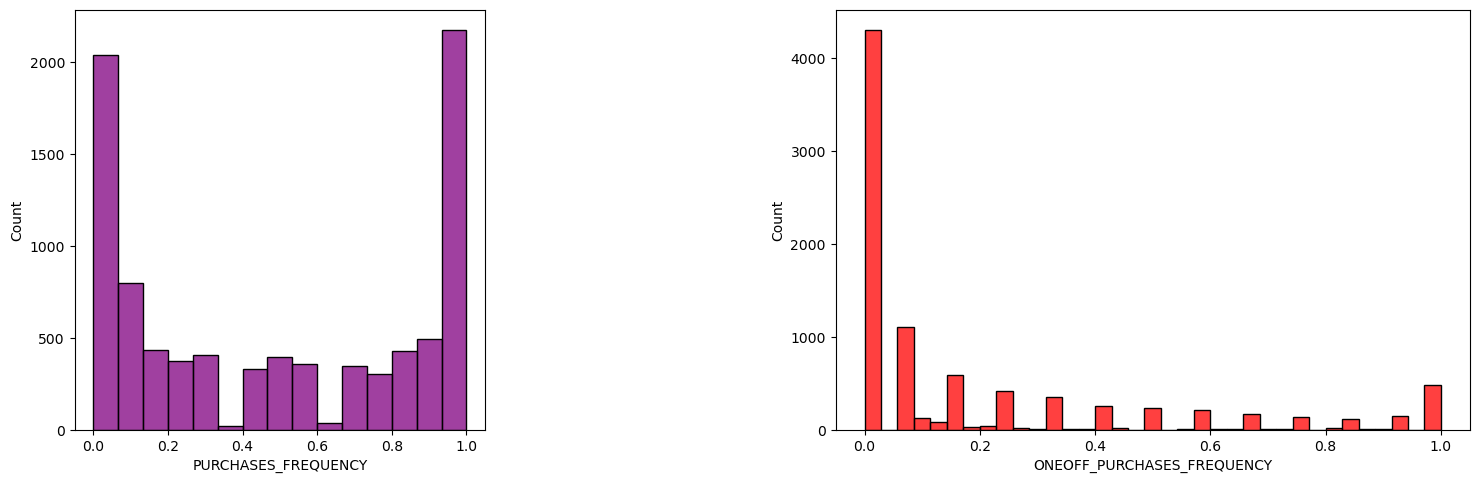

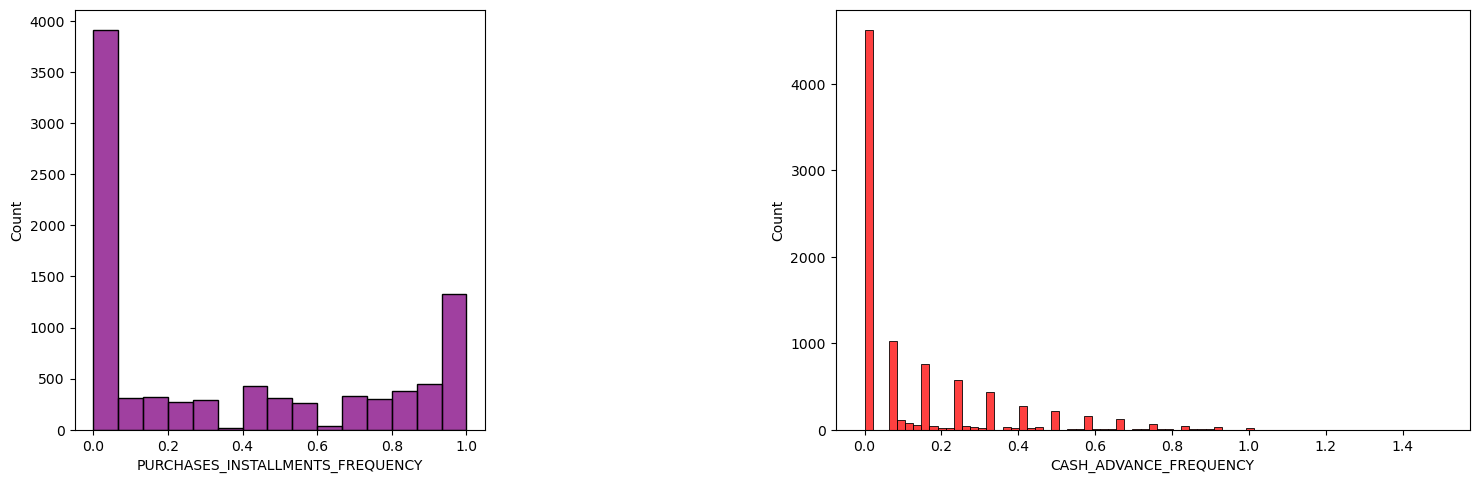

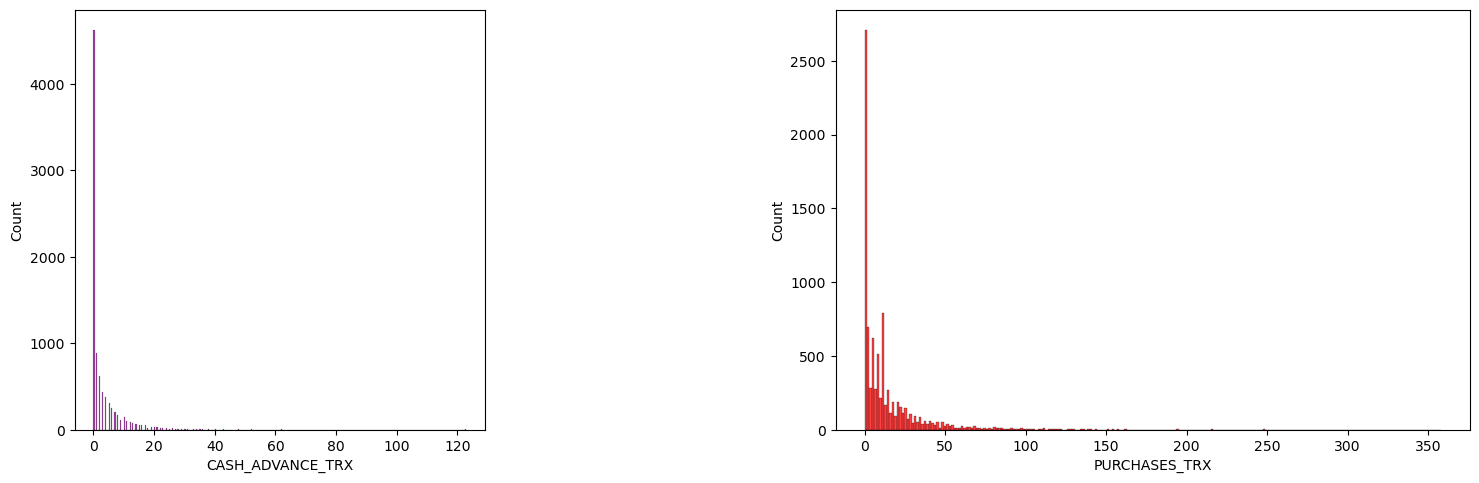

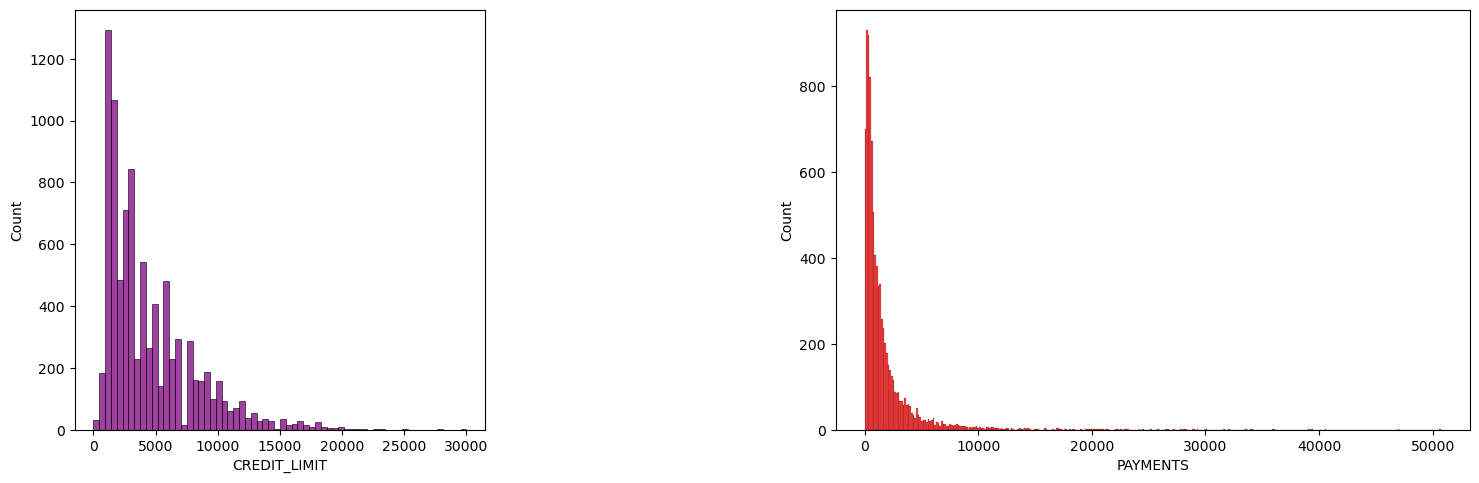

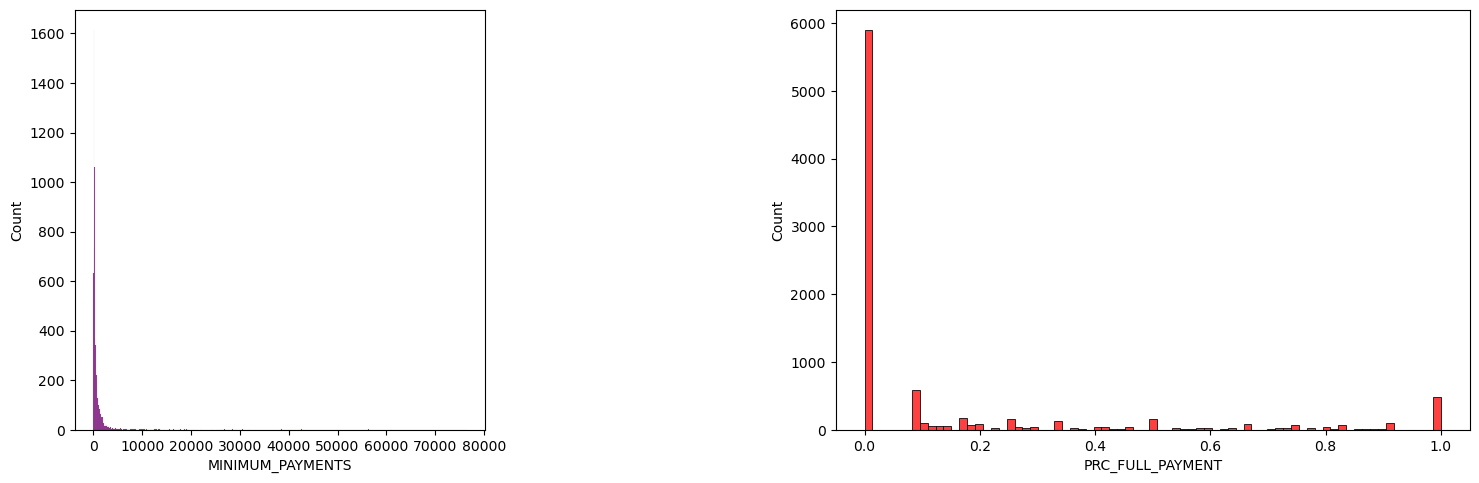

In [126]:
#PLotting for numerical
Numerical = ['BALANCE','BALANCE_FREQUENCY','PURCHASES' ,'ONEOFF_PURCHASES'
             ,'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE'
             ,'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY',
             'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY' ,
             'CASH_ADVANCE_TRX', 'PURCHASES_TRX','CREDIT_LIMIT',
             'PAYMENTS' , 'MINIMUM_PAYMENTS' ,'PRC_FULL_PAYMENT'
             , 'TENURE']
i = 0
while i <16:
    fig = plt.figure(figsize=(18, 12))
    plt.subplot(2,3,1)
    sns.histplot(x =Numerical [i], color='purple', data= Df)
    i = i+1
    plt.subplot(2,2,2)
    sns.histplot(x =Numerical [i], color='red', data= Df)
    i = i +1
    plt.show()
    

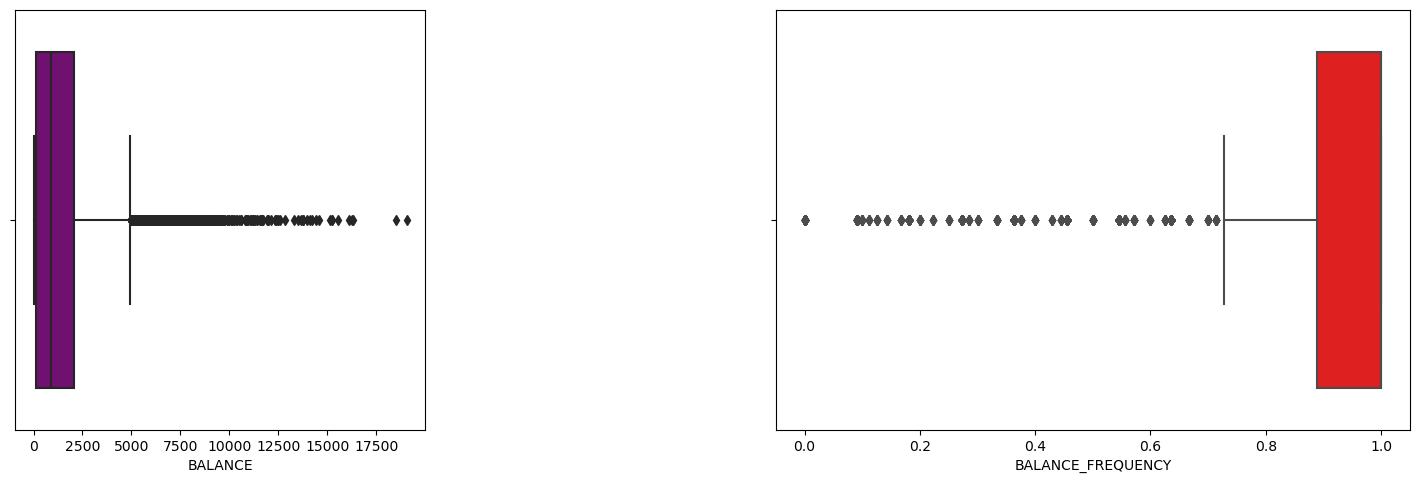

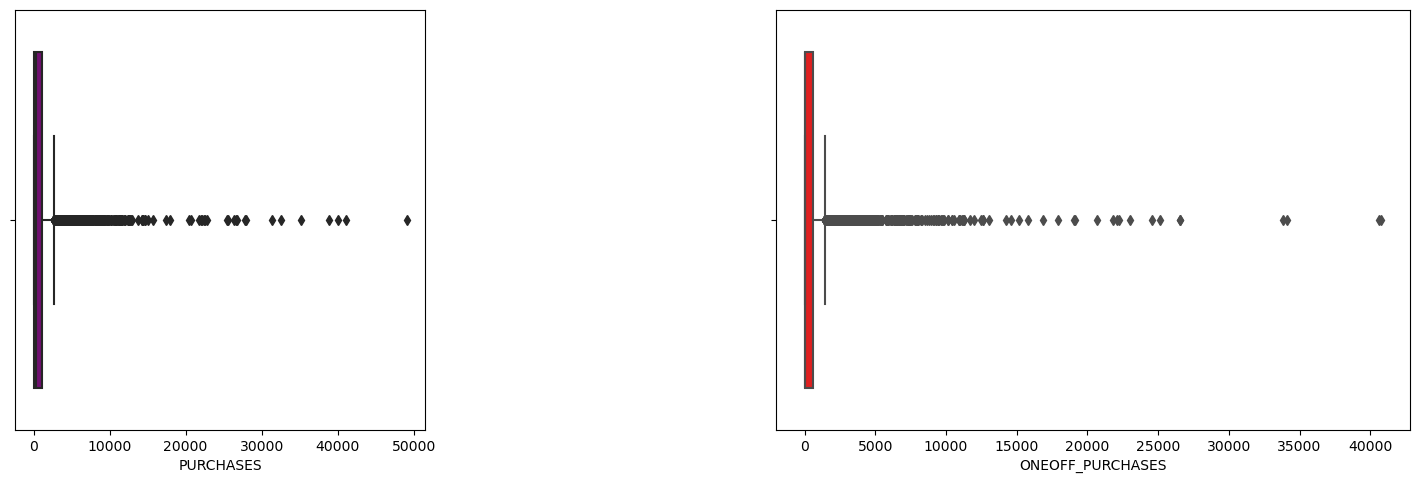

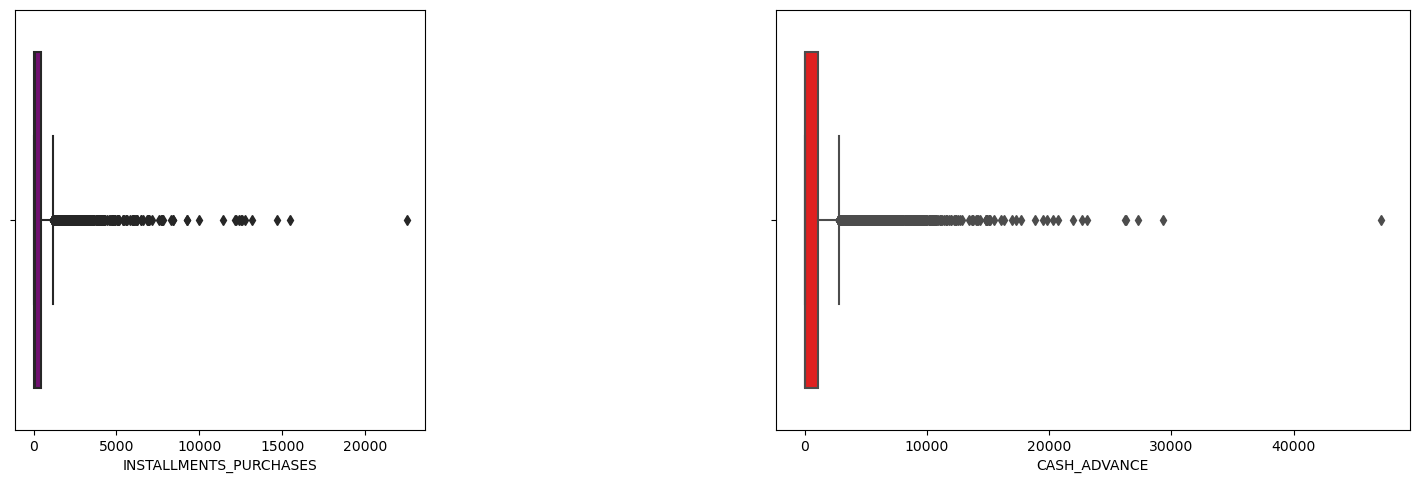

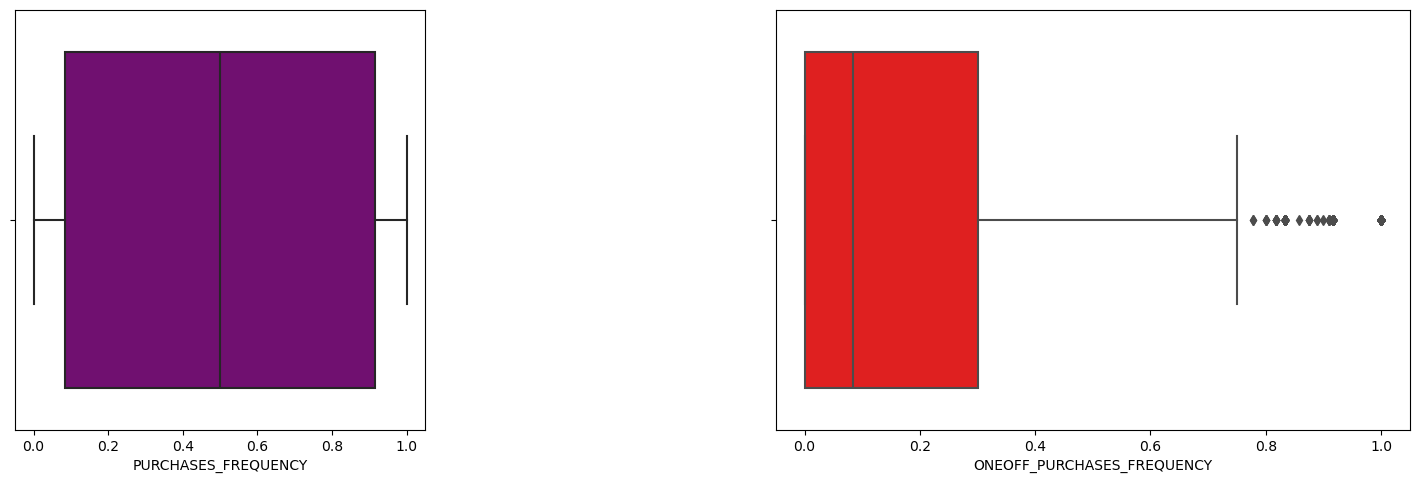

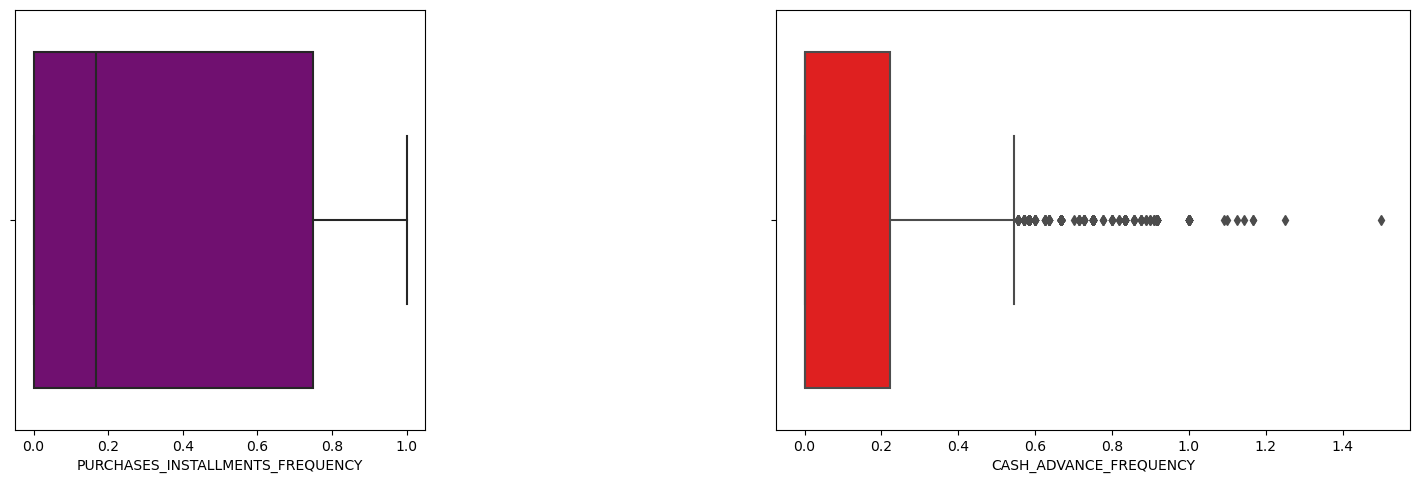

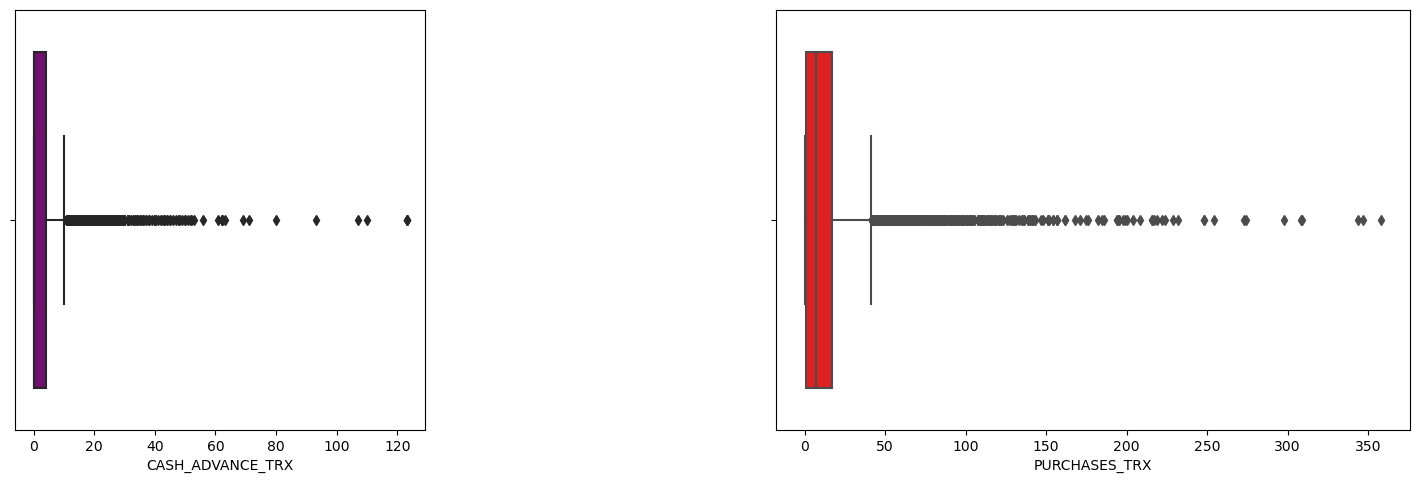

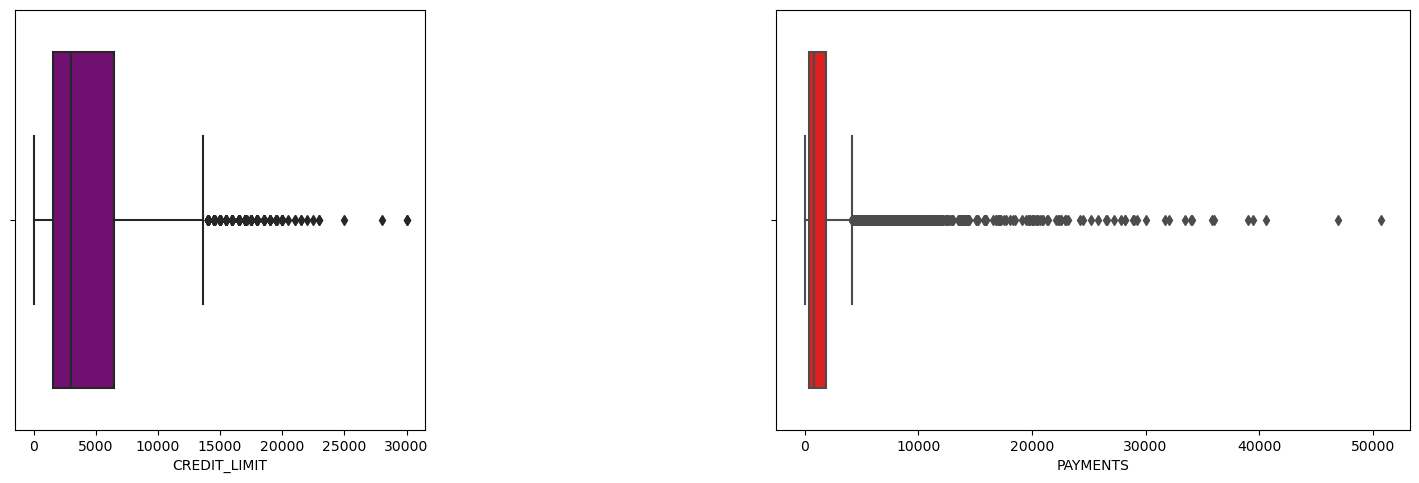

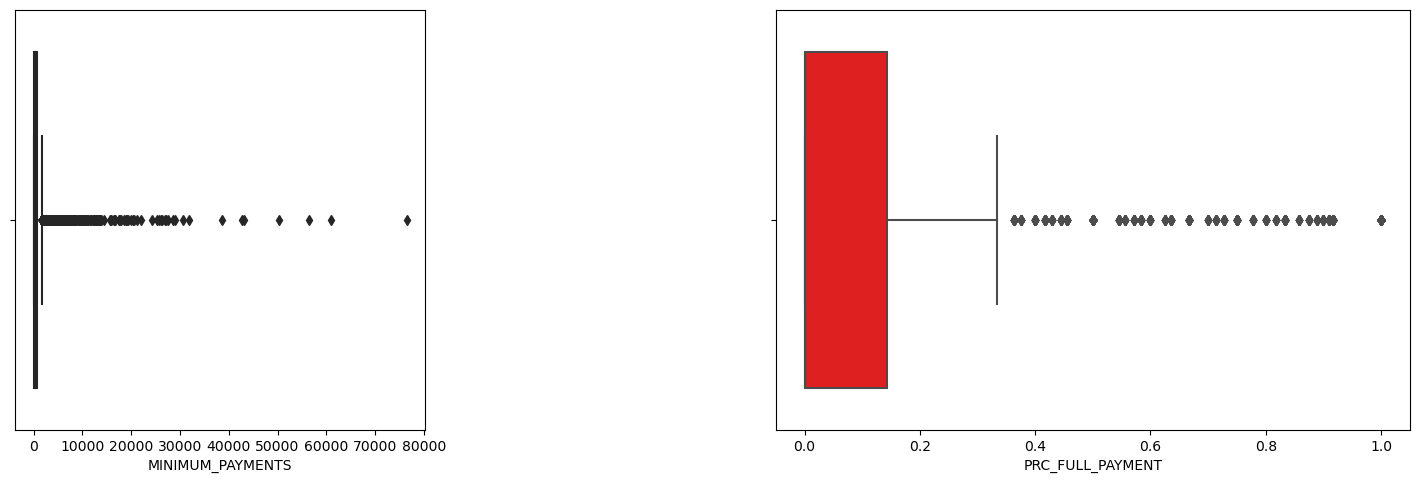

In [127]:
#PLotting for numerical
Numerical = ['BALANCE','BALANCE_FREQUENCY','PURCHASES' ,'ONEOFF_PURCHASES'
             ,'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE'
             ,'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY',
             'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY' ,
             'CASH_ADVANCE_TRX', 'PURCHASES_TRX','CREDIT_LIMIT',
             'PAYMENTS' , 'MINIMUM_PAYMENTS' ,'PRC_FULL_PAYMENT'
             , 'TENURE']
i = 0
while i <16:
    fig = plt.figure(figsize=(18, 12))
    plt.subplot(2,3,1)
    sns.boxplot(x =Numerical [i], color='purple', data= Df)
    i = i+1
    plt.subplot(2,2,2)
    sns.boxplot(x =Numerical [i], color='red', data= Df)
    i = i +1
    plt.show()

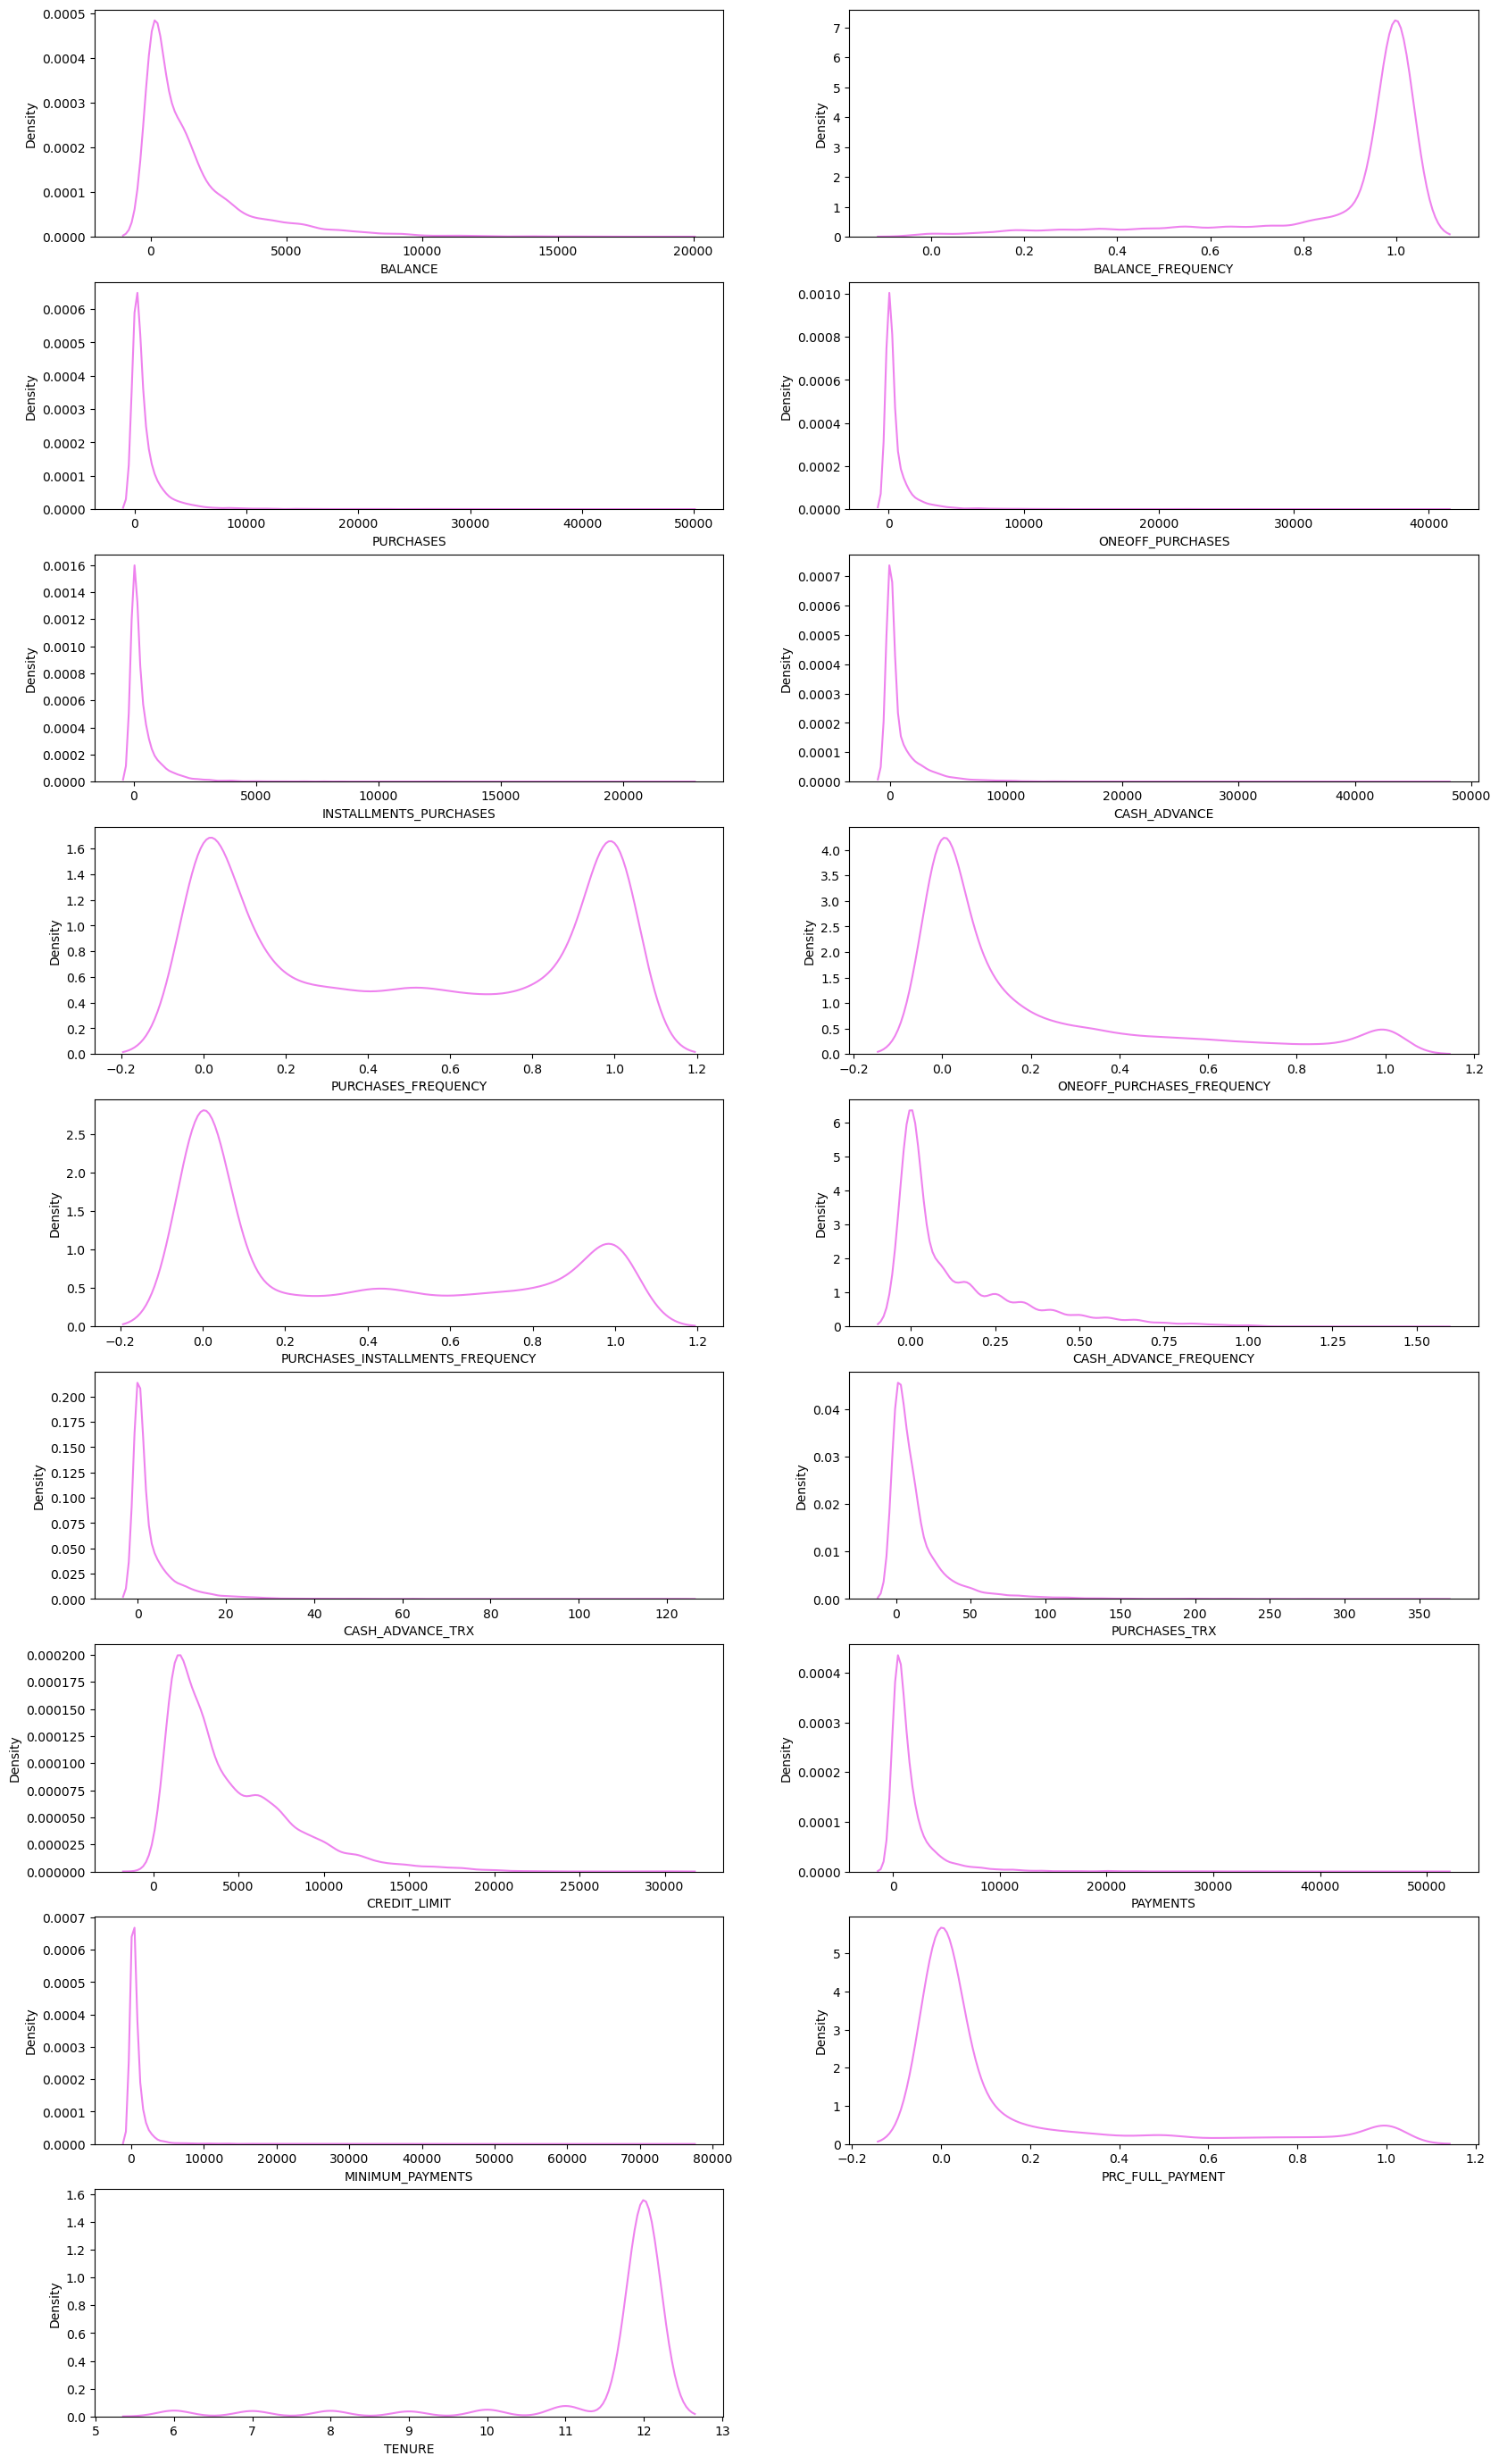

In [128]:
plt.figure(figsize=(20,35))
for i,col in enumerate(Df.columns):
    if Df[col].dtype !='object':
        ax=plt.subplot(9,2,i+1)
        sns.kdeplot(Df[col],ax=ax,color='violet')
        plt.xlabel(col)
plt.show()

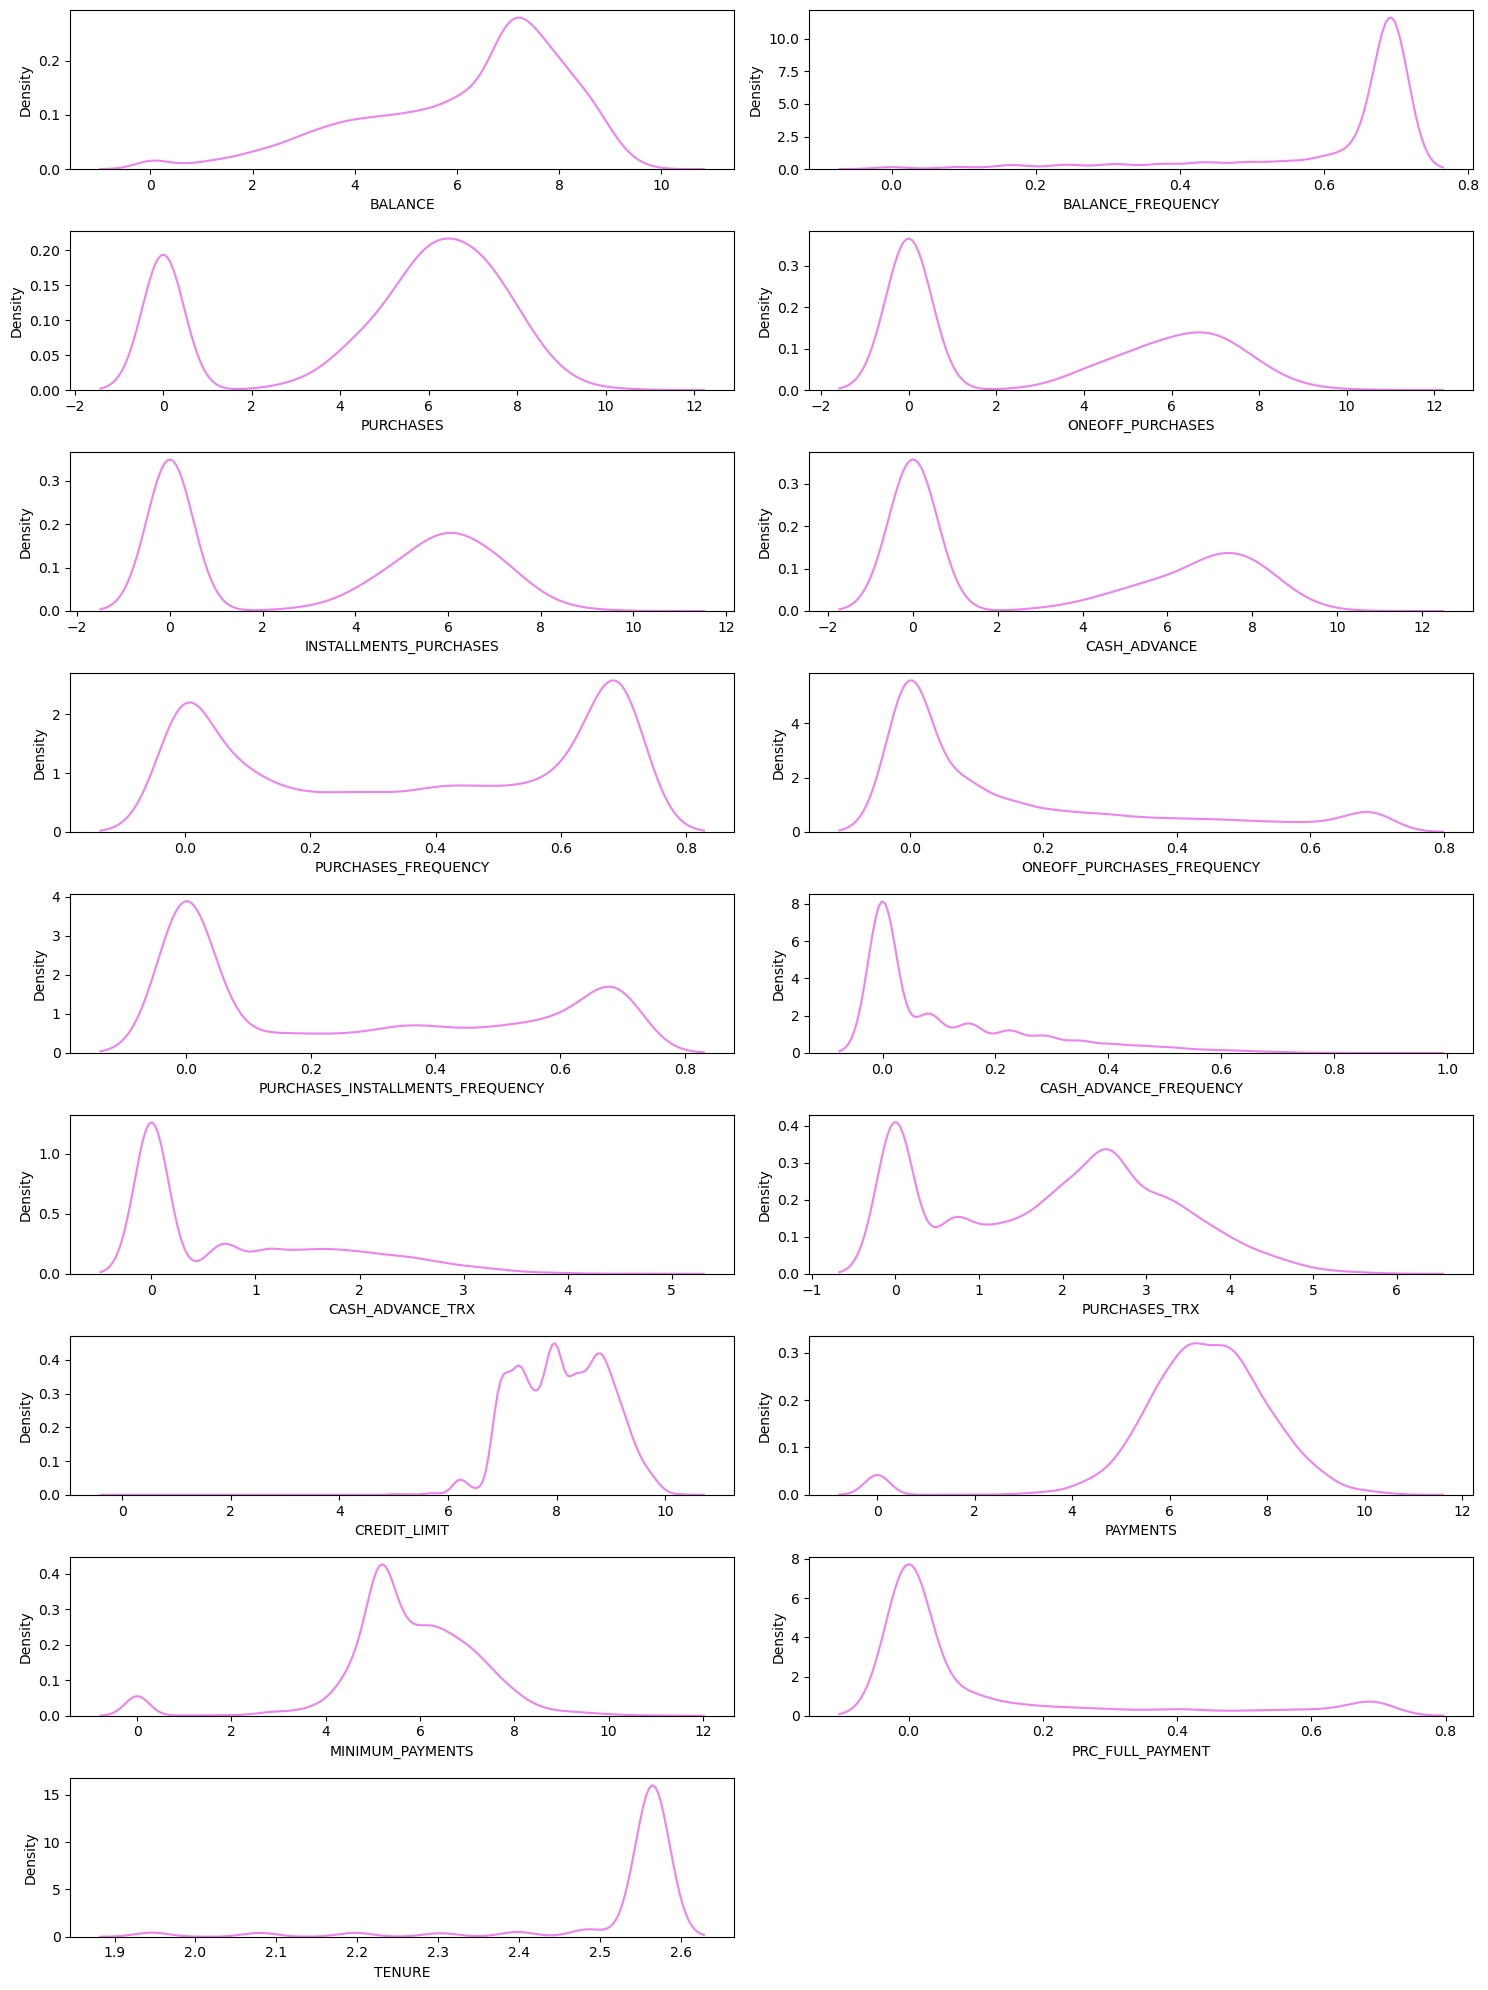

In [129]:
cols = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

for col in cols:
    Df[col] = np.log(1+Df[col])

plt.figure(figsize=(15, 20))

for i, col in enumerate(cols):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(Df[col], ax=ax, color='violet')
    ax.set_xlabel(col)  # Adding x-label for each subplot

plt.tight_layout()  # Adjust subplots to avoid overlapping
plt.show()

<Axes: title={'center': 'Correlation Graph'}>

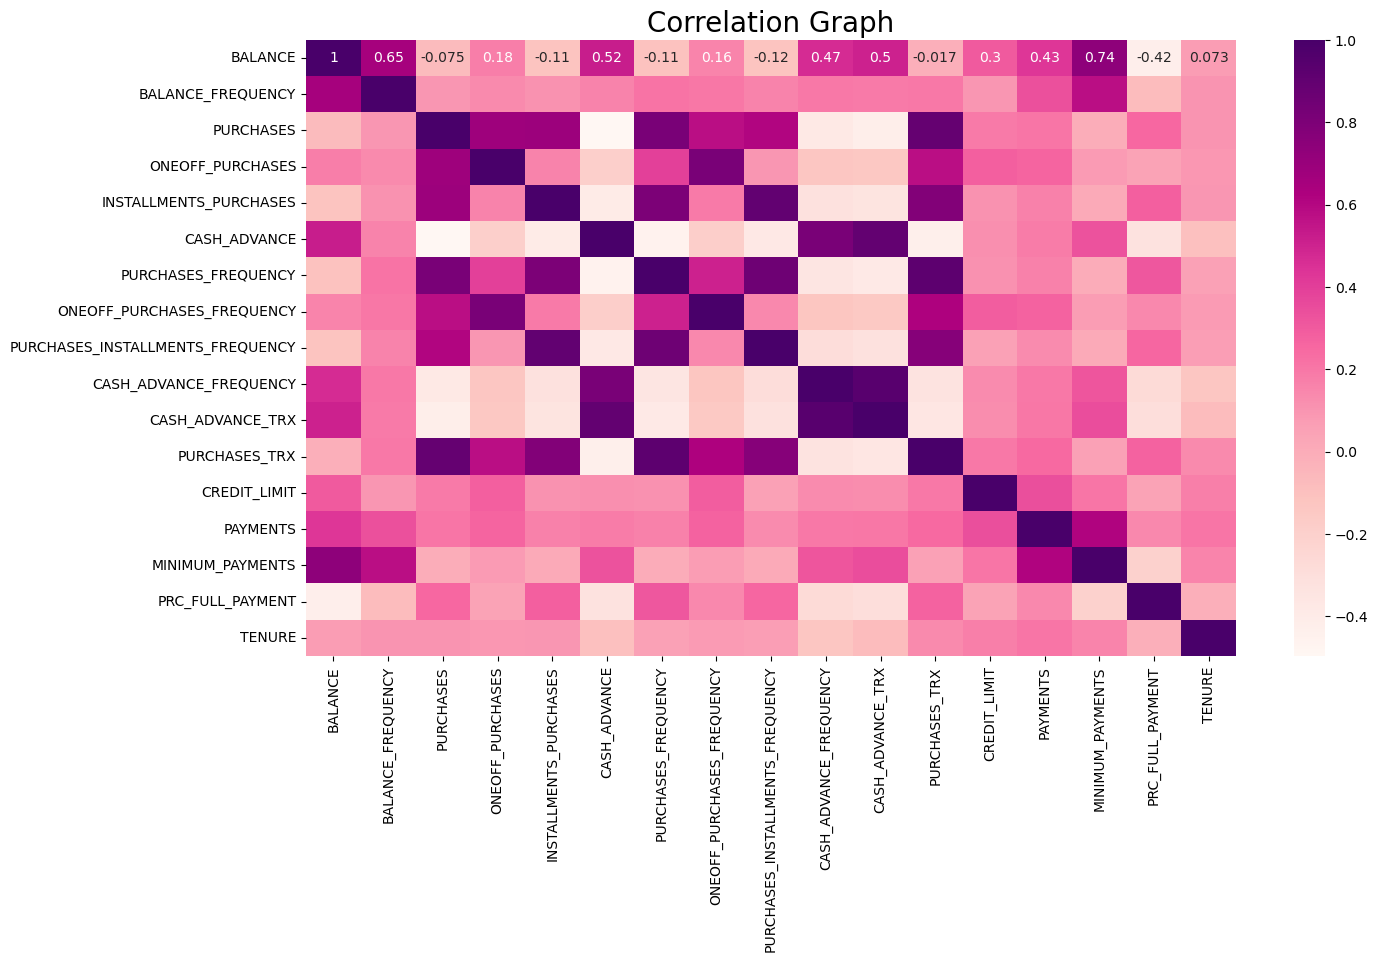

In [130]:
plt.figure (figsize = [15,8],  dpi = 100 )
plt.title ("Correlation Graph" , fontsize = 20 )
sns.heatmap (Df.corr(),annot=True, cmap ='RdPu') 

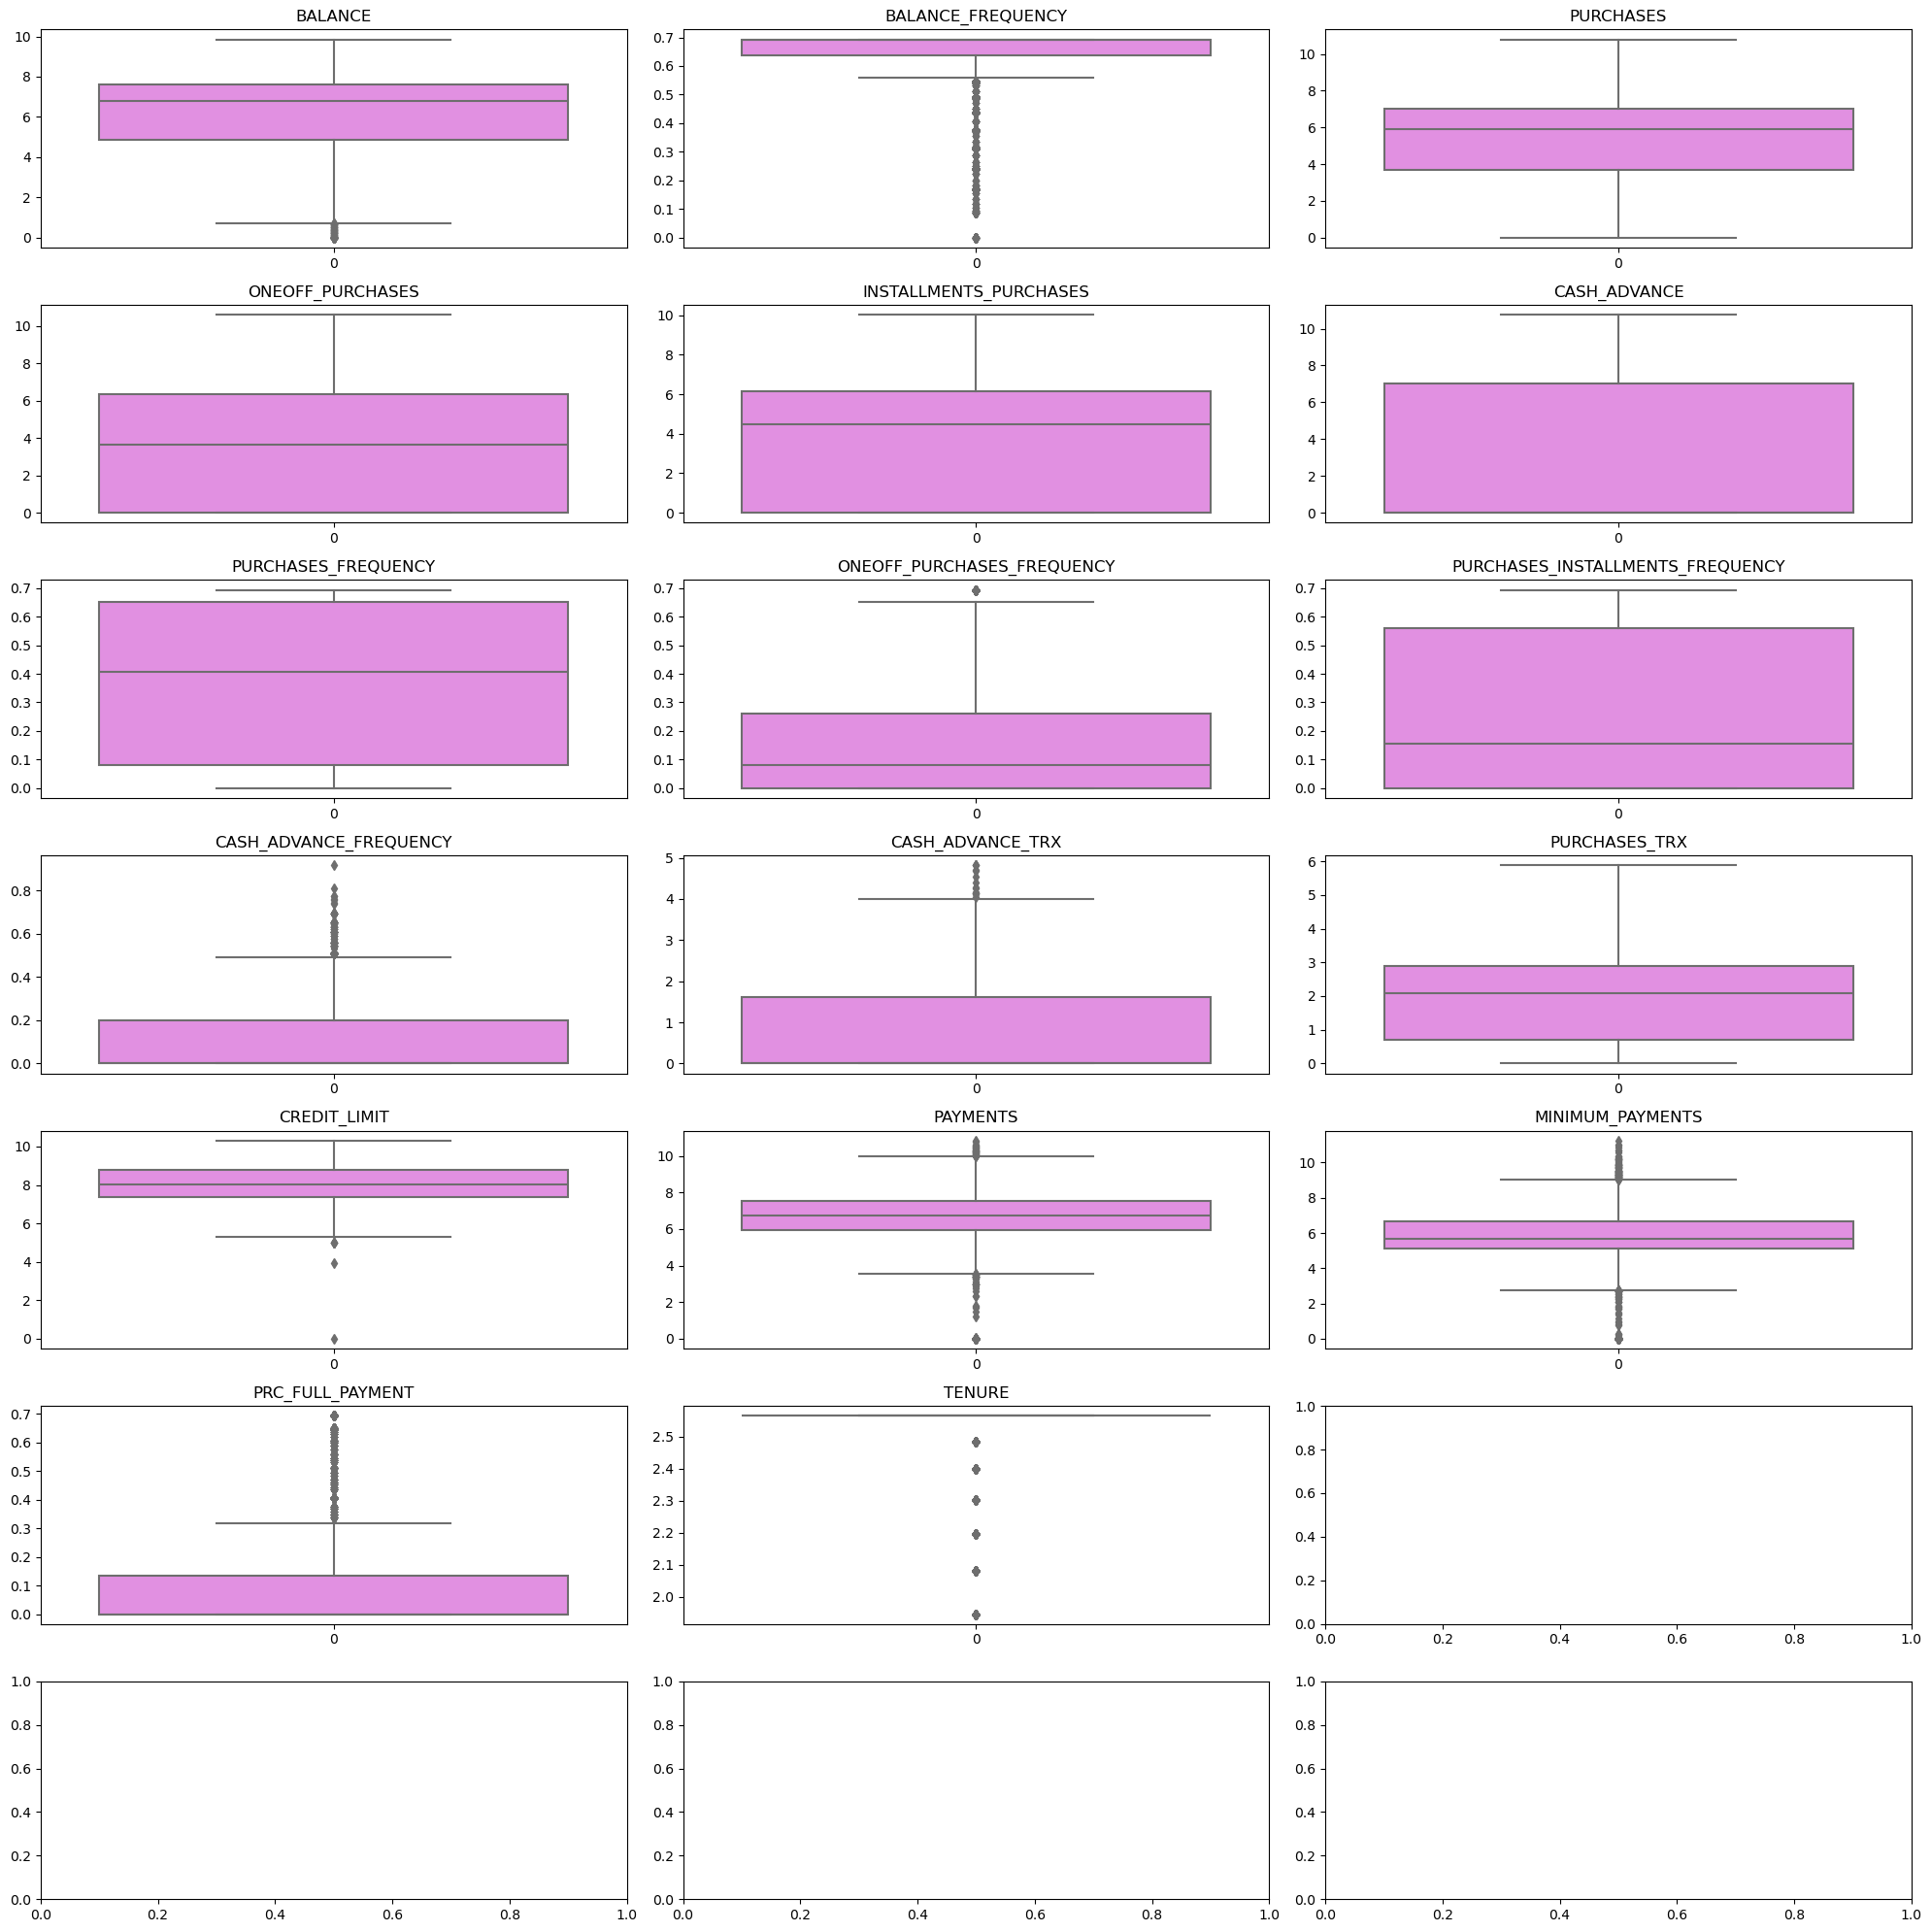

In [131]:
# Draw boxplot for check outliers
fig= plt.subplots(nrows=7 , ncols=3 , figsize=(20,20))
for i in range (len(Df.columns)):
    plt.subplot(7,3,i+1)
    ax=  sns.boxplot(Df[Df.columns[i]],color='violet')
    plt.title(Df.columns[i])
    plt.tight_layout()

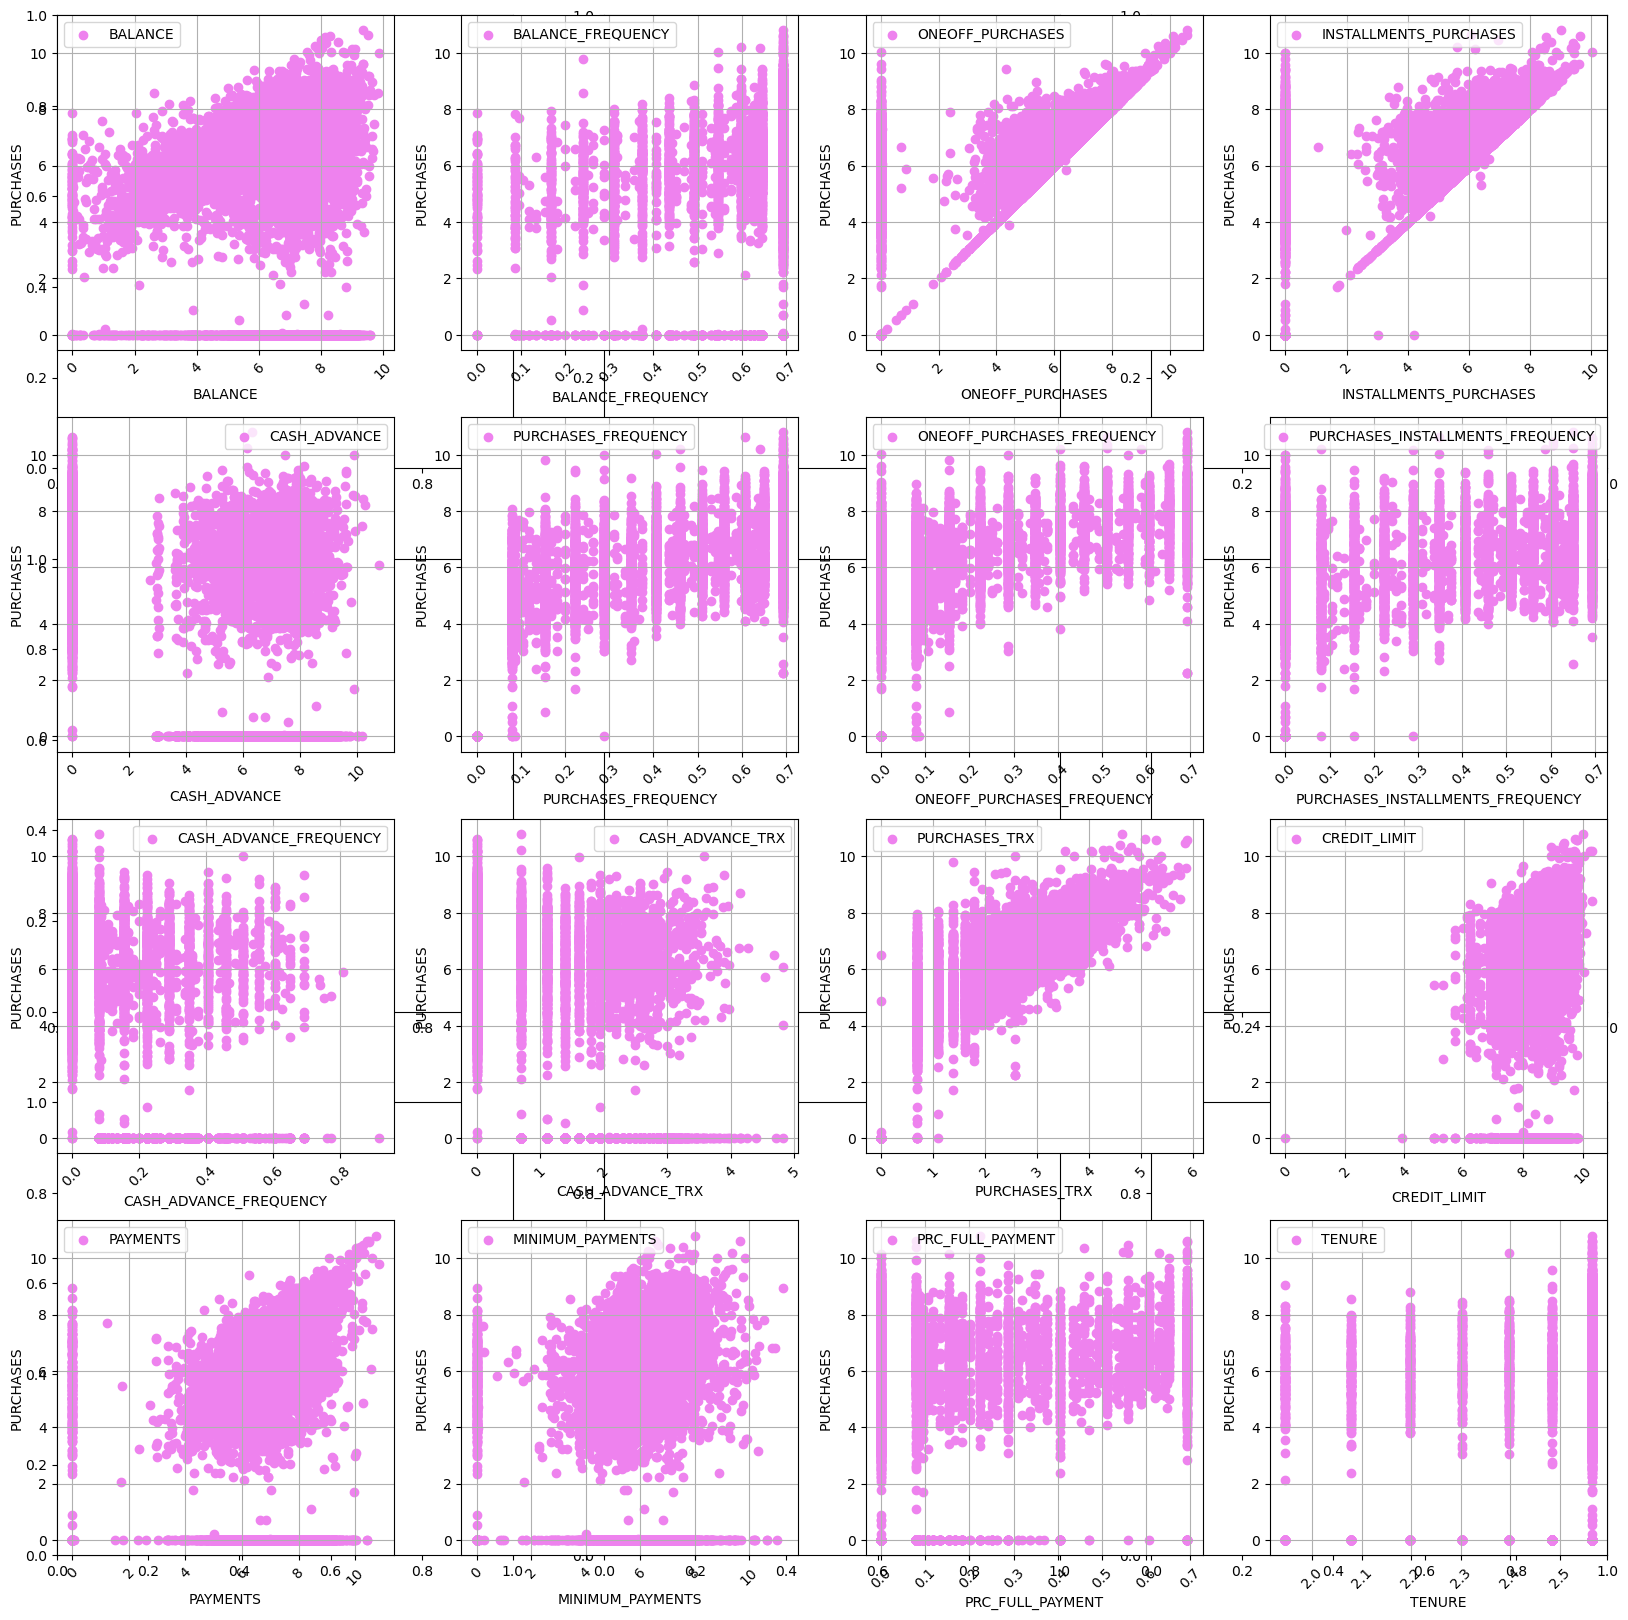

In [132]:

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 20))


plt.subplot (4,4,1)
x = Df ["BALANCE"]
y = Df ["PURCHASES"]
plt.scatter (x,y,color = "violet")
plt.xlabel ("BALANCE",fontsize=10)
plt.ylabel ("PURCHASES",fontsize=10)
plt.xticks (rotation = 45,fontsize=10)
plt.yticks (fontsize=10)
plt.legend (["BALANCE"],fontsize=10)
plt.grid()

plt.subplot (4,4,2)
x = Df ["BALANCE_FREQUENCY"]
y = Df ["PURCHASES"]
plt.scatter (x,y,color = "violet")
plt.xlabel ("BALANCE_FREQUENCY",fontsize=10)
plt.ylabel ("PURCHASES",fontsize=10)
plt.xticks (rotation = 45,fontsize=10)
plt.yticks (fontsize=10)
plt.legend (["BALANCE_FREQUENCY"],fontsize=10)
plt.grid()

plt.subplot (4,4,3)
x = Df ["ONEOFF_PURCHASES"]
y = Df ["PURCHASES"]
plt.scatter (x,y,color = "violet")
plt.xlabel ("ONEOFF_PURCHASES",fontsize=10)
plt.ylabel ("PURCHASES",fontsize=10)
plt.xticks (rotation = 45,fontsize=10)
plt.yticks (fontsize=10)
plt.legend (["ONEOFF_PURCHASES"],fontsize=10)
plt.grid()

plt.subplot (4,4,4)
x = Df ["INSTALLMENTS_PURCHASES"]
y = Df ["PURCHASES"]
plt.scatter (x,y,color = "violet")
plt.xlabel ("INSTALLMENTS_PURCHASES",fontsize=10)
plt.ylabel ("PURCHASES",fontsize=10)
plt.xticks (rotation = 45,fontsize=10)
plt.yticks (fontsize=10)
plt.legend (["INSTALLMENTS_PURCHASES"],fontsize=10)
plt.grid()



plt.subplot (4,4,5)
x = Df ["CASH_ADVANCE"]
y = Df ["PURCHASES"]
plt.scatter (x,y,color = "violet")
plt.xlabel ("CASH_ADVANCE",fontsize=10)
plt.ylabel ("PURCHASES",fontsize=10)
plt.xticks (rotation = 45,fontsize=10)
plt.yticks (fontsize=10)
plt.legend (["CASH_ADVANCE"],fontsize=10)
plt.grid()


plt.subplot (4,4,6)
x = Df ["PURCHASES_FREQUENCY"]
y = Df ["PURCHASES"]
plt.scatter (x,y,color = "violet")
plt.xlabel ("PURCHASES_FREQUENCY",fontsize=10)
plt.ylabel ("PURCHASES",fontsize=10)
plt.xticks (rotation = 45,fontsize=10)
plt.yticks (fontsize=10)
plt.legend (["PURCHASES_FREQUENCY"],fontsize=10)
plt.grid()



plt.subplot (4,4,7)
x = Df ["ONEOFF_PURCHASES_FREQUENCY"]
y = Df ["PURCHASES"]
plt.scatter (x,y,color = "violet")
plt.xlabel ("ONEOFF_PURCHASES_FREQUENCY",fontsize=10)
plt.ylabel ("PURCHASES",fontsize=10)
plt.xticks (rotation = 45,fontsize=10)
plt.yticks (fontsize=10)
plt.legend (["ONEOFF_PURCHASES_FREQUENCY"],fontsize=10)
plt.grid()


plt.subplot (4,4,8)
x = Df ["PURCHASES_INSTALLMENTS_FREQUENCY"]
y = Df ["PURCHASES"]
plt.scatter (x,y,color = "violet")
plt.xlabel ("PURCHASES_INSTALLMENTS_FREQUENCY",fontsize=10)
plt.ylabel ("PURCHASES",fontsize=10)
plt.xticks (rotation = 45,fontsize=10)
plt.yticks (fontsize=10)
plt.legend (["PURCHASES_INSTALLMENTS_FREQUENCY"],fontsize=10)
plt.grid()


plt.subplot (4,4,9)
x = Df ["CASH_ADVANCE_FREQUENCY"]
y = Df ["PURCHASES"]
plt.scatter (x,y,color = "violet")
plt.xlabel ("CASH_ADVANCE_FREQUENCY",fontsize=10)
plt.ylabel ("PURCHASES",fontsize=10)
plt.xticks (rotation = 45,fontsize=10)
plt.yticks (fontsize=10)
plt.legend (["CASH_ADVANCE_FREQUENCY"],fontsize=10)
plt.grid()

plt.subplot (4,4,10)
x = Df ["CASH_ADVANCE_TRX"]
y = Df ["PURCHASES"]
plt.scatter (x,y,color = "violet")
plt.xlabel ("CASH_ADVANCE_TRX",fontsize=10)
plt.ylabel ("PURCHASES",fontsize=10)
plt.xticks (rotation = 45,fontsize=10)
plt.yticks (fontsize=10)
plt.legend (["CASH_ADVANCE_TRX"],fontsize=10)
plt.grid()

plt.subplot (4,4,11)
x = Df ["PURCHASES_TRX"]
y = Df ["PURCHASES"]
plt.scatter (x,y,color = "violet")
plt.xlabel ("PURCHASES_TRX",fontsize=10)
plt.ylabel ("PURCHASES",fontsize=10)
plt.xticks (rotation = 45,fontsize=10)
plt.yticks (fontsize=10)
plt.legend (["PURCHASES_TRX"],fontsize=10)
plt.grid()



plt.subplot (4,4,12)
x = Df ["CREDIT_LIMIT"]
y = Df ["PURCHASES"]
plt.scatter (x,y,color = "violet")
plt.xlabel ("CREDIT_LIMIT",fontsize=10)
plt.ylabel ("PURCHASES",fontsize=10)
plt.xticks (rotation = 45,fontsize=10)
plt.yticks (fontsize=10)
plt.legend (["CREDIT_LIMIT"],fontsize=10)
plt.grid()


plt.subplot (4,4,13)
x = Df ["PAYMENTS"]
y = Df ["PURCHASES"]
plt.scatter (x,y,color = "violet")
plt.xlabel ("PAYMENTS",fontsize=10)
plt.ylabel ("PURCHASES",fontsize=10)
plt.xticks (rotation = 45,fontsize=10)
plt.yticks (fontsize=10)
plt.legend (["PAYMENTS"],fontsize=10)
plt.grid()

plt.subplot (4,4,14)
x = Df ["MINIMUM_PAYMENTS"]
y = Df ["PURCHASES"]
plt.scatter (x,y,color = "violet")
plt.xlabel ("MINIMUM_PAYMENTS",fontsize=10)
plt.ylabel ("PURCHASES",fontsize=10)
plt.xticks (rotation = 45,fontsize=10)
plt.yticks (fontsize=10)
plt.legend (["MINIMUM_PAYMENTS"],fontsize=10)
plt.grid()

plt.subplot (4,4,15)
x = Df ["PRC_FULL_PAYMENT"]
y = Df ["PURCHASES"]
plt.scatter (x,y,color = "violet")
plt.xlabel ("PRC_FULL_PAYMENT",fontsize=10)
plt.ylabel ("PURCHASES",fontsize=10)
plt.xticks (rotation = 45,fontsize=10)
plt.yticks (fontsize=10)
plt.legend (["PRC_FULL_PAYMENT"],fontsize=10)
plt.grid()

plt.subplot (4,4,16)
x = Df ["TENURE"]
y = Df ["PURCHASES"]
plt.scatter (x,y,color = "violet")
plt.xlabel ("TENURE",fontsize=10)
plt.ylabel ("PURCHASES",fontsize=10)
plt.xticks (rotation = 45,fontsize=10)
plt.yticks (fontsize=10)
plt.legend (["TENURE"],fontsize=10)
plt.grid()

plt.show()


In [133]:
#####clustering Model
#####1- Kmeans 

In [134]:
#normalization the data
Scaler=StandardScaler()
Scaled_features=Scaler.fit_transform(Df)
Df.shape

(8950, 17)

In [135]:
Df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3.735304           0.597837   4.568506          0.000000   
1     8.071989           0.646627   0.000000          0.000000   
2     7.822504           0.693147   6.651791          6.651791   
3     7.419183           0.492477   7.313220          7.313220   
4     6.707735           0.693147   2.833213          2.833213   
...        ...                ...        ...               ...   
8945  3.384170           0.693147   5.677165          0.000000   
8946  3.004851           0.693147   5.707110          0.000000   
8947  3.194529           0.606136   4.979489          0.000000   
8948  2.671218           0.606136   0.000000          0.000000   
8949  5.923475           0.510826   6.997824          6.997824   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   4.568506      0.000000             0.154151   
1                   0.000000      8.770896             0.000000   
2                   0.000000      0.000000             0.693147   
3                   0.000000      5.331694             0.080042   
4                   0.000000      0.000000             0.080042   
...                      ...           ...                  ...   
8945                5.677165      0.000000             0.693147   
8946                5.707110      0.000000             0.693147   
8947                4.979489      0.000000             0.606136   
8948                0.000000      3.625907             0.000000   
8949                0.000000      4.852343             0.510826   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.080042   
1                       0.000000                          0.000000   
2                       0.693147                          0.000000   
3                       0.080042                          0.000000   
4                       0.080042                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.606136   
8946                    0.000000                          0.606136   
8947                    0.000000                          0.510826   
8948                    0.000000                          0.000000   
8949                    0.510826                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000          0.000000       1.098612      6.908755   
1                   0.223144          1.609438       0.000000      8.853808   
2                   0.000000          0.000000       2.564949      8.922792   
3                   0.080042          0.693147       0.693147      8.922792   
4                   0.000000          0.000000       0.693147      7.090910   
...                      ...               ...            ...           ...   
8945                0.000000          0.000000       1.945910      6.908755   
8946                0.000000          0.000000       1.945910      6.908755   
8947                0.000000          0.000000       1.791759      6.908755   
8948                0.154151          1.098612       0.000000      6.216606   
8949                0.287682          1.098612       3.178054      7.090910   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0     5.312231          4.945277          0.000000  2.564949  
1     8.319725          6.978531          0.200671  2.564949  
2     6.434654          6.442994          0.000000  2.564949  
3     0.000000          0.000000          0.000000  2.564949  
4     6.521114          5.504483          0.000000  2.564949  
...        ...               ...               ...       ...  
8945  5.788719          3.909748          0.405465  1.945910  
8946  5.623517          0.000000          0.000000  1.945910  
8947  4.410016          4.423869          0.223144  

In [136]:
kmeans_set={"init":"random","n_init":10,"max_iter":300,"random_state":42}

#####inertia calculation to fit the model for 1st step
from sklearn.cluster import KMeans
inertia_list = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, **kmeans_set)  # ** unpacking the dictionary
    kmeans.fit(Scaled_features)
    inertia_list.append(kmeans.inertia_)

In [137]:
inertia_list

[152149.99999999994,
 112583.78916117804,
 94757.45185200861,
 84774.06278967785,
 75800.30994854121,
 69305.25465702974,
 65659.20127117896,
 62252.98548433437,
 59138.41106696492,
 56036.82592625823,
 53993.62494372619,
 51354.98585932094,
 49890.463735889774,
 48517.65881197798,
 47060.30028794648,
 45731.742076955336,
 44663.02562086945,
 43545.76879794078,
 42187.30069562411,
 41631.97102013614,
 40678.26581990218,
 40264.952010010384,
 39339.129595163,
 38418.24797280966,
 37928.62096653879,
 37012.29930685921,
 36400.26694441504,
 35657.47103708865,
 35209.82740511783]

In [138]:
print (inertia_list)
max(inertia_list)

[152149.99999999994, 112583.78916117804, 94757.45185200861, 84774.06278967785, 75800.30994854121, 69305.25465702974, 65659.20127117896, 62252.98548433437, 59138.41106696492, 56036.82592625823, 53993.62494372619, 51354.98585932094, 49890.463735889774, 48517.65881197798, 47060.30028794648, 45731.742076955336, 44663.02562086945, 43545.76879794078, 42187.30069562411, 41631.97102013614, 40678.26581990218, 40264.952010010384, 39339.129595163, 38418.24797280966, 37928.62096653879, 37012.29930685921, 36400.26694441504, 35657.47103708865, 35209.82740511783]


152149.99999999994

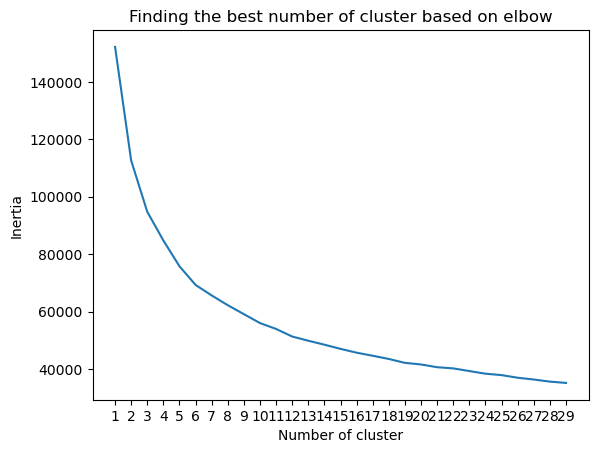

In [139]:
#ploting the intertia and number of cluster for KmeanS
plt.plot (range(1,30),inertia_list )
plt.xticks (range(1,30))
plt.title('Finding the best number of cluster based on elbow')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

In [140]:
#finding the best k based on elbow for 1st step
from kneed import KneeLocator
KM1 = KneeLocator (range (1,30), inertia_list, curve="convex" , direction="decreasing")
KM1.elbow

6

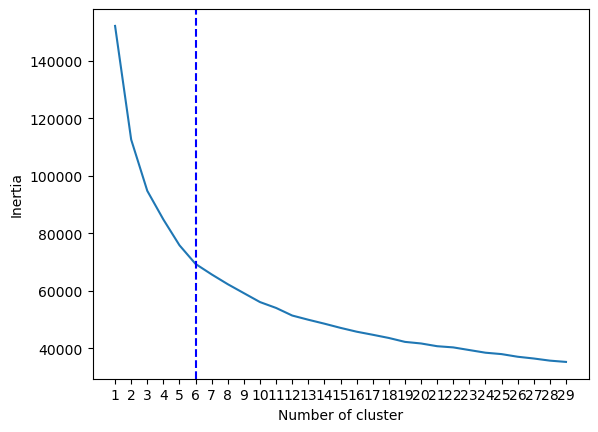

In [141]:
#ploting the best k based on elbow for 1st step and inertia


plt.plot (range(1,30),inertia_list )
plt.xticks (range(1,30))
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.axvline(x=KM1.elbow, color='b', label='axvline-full height', ls='--')

plt.show()

In [142]:
#fit the Kmeans model for k=6 based on inertia and elbow and setting the labels
Kmeans = KMeans(n_clusters=6).fit(Scaled_features)
centroids = Kmeans.cluster_centers_
print(centroids)
labels=Kmeans.labels_
labels

[[ 0.03166549  0.10568223  0.37458903  0.76548848 -0.68864588 -0.58703879
  -0.27796023  0.39743528 -0.78012966 -0.56234745 -0.59599292 -0.09004468
  -0.17728206 -0.08502253  0.00814872 -0.26013708  0.07017022]
 [-0.69964235  0.05178923  0.39416861 -0.73999412  0.85532002 -0.81802729
   0.76263651 -0.63886769  0.98124718 -0.67484394 -0.74244733  0.44565929
  -0.44786598 -0.25976205 -0.23459799  0.62498936 -0.03817506]
 [ 0.79725529  0.39760798  0.6215584   0.52481799  0.49189213  1.15608664
   0.53724031  0.35369227  0.39403041  1.17093086  1.23747363  0.61390905
   0.39423215  0.52935923  0.70569456 -0.39547618 -0.04360992]
 [ 0.56392434  0.21906699 -1.46095803 -0.82559532 -1.04926386  1.02022752
  -1.24657337 -0.67995278 -0.94561367  0.82904037  0.90860961 -1.28518464
  -0.07898372  0.09651446  0.37435448 -0.41586876 -0.07917035]
 [-1.78684673 -2.43556397 -0.32005003 -0.34614672 -0.39528344 -0.48327284
  -0.63027351 -0.47239478 -0.51340433 -0.52495698 -0.53433144 -0.58470205
  -0.292

array([1, 3, 0, ..., 1, 4, 0])

In [143]:
#creating the clusters specifications
cluster_kmeans = pd.DataFrame(data = Kmeans.cluster_centers_, columns = [Df.columns])
cluster_kmeans

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0  0.031665          0.105682  0.374589         0.765488   
1 -0.699642          0.051789  0.394169        -0.739994   
2  0.797255          0.397608  0.621558         0.524818   
3  0.563924          0.219067 -1.460958        -0.825595   
4 -1.786847         -2.435564 -0.320050        -0.346147   
5  0.216757          0.399950  0.986847         1.203750   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.688646    -0.587039           -0.277960   
1               0.855320    -0.818027            0.762637   
2               0.491892     1.156087            0.537240   
3              -1.049264     1.020228           -1.246573   
4              -0.395283    -0.483273           -0.630274   
5               0.925116    -0.739056            1.038321   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.397435                        -0.780130   
1                  -0.638868                         0.981247   
2                   0.353692                         0.394030   
3                  -0.679953                        -0.945614   
4                  -0.472395                        -0.513404   
5                   1.418058                         0.839223   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.562347        -0.595993     -0.090045    -0.177282   
1              -0.674844        -0.742447      0.445659    -0.447866   
2               1.170931         1.237474      0.613909     0.394232   
3               0.829040         0.908610     -1.285185    -0.078984   
4              -0.524957        -0.534331     -0.584702    -0.292231   
5              -0.645508        -0.703249      1.235797     0.665499   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.085023         0.008149        -0.260137  0.070170  
1 -0.259762        -0.234598         0.624989 -0.038175  
2  0.529359         0.705695        -0.395476 -0.043610  
3  0.096514         0.374354        -0.415869 -0.079170  
4 -1.597610        -1.955893        -0.094008 -0.252108  
5  0.619805         0.099533         0.482214  0.273634

In [144]:
#appending the label to the data frame

cluster_kmeans=pd.concat([Df,pd.DataFrame({'cluster':labels})],axis=1)
cluster_kmeans

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3.735304           0.597837   4.568506          0.000000   
1     8.071989           0.646627   0.000000          0.000000   
2     7.822504           0.693147   6.651791          6.651791   
3     7.419183           0.492477   7.313220          7.313220   
4     6.707735           0.693147   2.833213          2.833213   
...        ...                ...        ...               ...   
8945  3.384170           0.693147   5.677165          0.000000   
8946  3.004851           0.693147   5.707110          0.000000   
8947  3.194529           0.606136   4.979489          0.000000   
8948  2.671218           0.606136   0.000000          0.000000   
8949  5.923475           0.510826   6.997824          6.997824   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   4.568506      0.000000             0.154151   
1                   0.000000      8.770896             0.000000   
2                   0.000000      0.000000             0.693147   
3                   0.000000      5.331694             0.080042   
4                   0.000000      0.000000             0.080042   
...                      ...           ...                  ...   
8945                5.677165      0.000000             0.693147   
8946                5.707110      0.000000             0.693147   
8947                4.979489      0.000000             0.606136   
8948                0.000000      3.625907             0.000000   
8949                0.000000      4.852343             0.510826   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.080042   
1                       0.000000                          0.000000   
2                       0.693147                          0.000000   
3                       0.080042                          0.000000   
4                       0.080042                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.606136   
8946                    0.000000                          0.606136   
8947                    0.000000                          0.510826   
8948                    0.000000                          0.000000   
8949                    0.510826                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000          0.000000       1.098612      6.908755   
1                   0.223144          1.609438       0.000000      8.853808   
2                   0.000000          0.000000       2.564949      8.922792   
3                   0.080042          0.693147       0.693147      8.922792   
4                   0.000000          0.000000       0.693147      7.090910   
...                      ...               ...            ...           ...   
8945                0.000000          0.000000       1.945910      6.908755   
8946                0.000000          0.000000       1.945910      6.908755   
8947                0.000000          0.000000       1.791759      6.908755   
8948                0.154151          1.098612       0.000000      6.216606   
8949                0.287682          1.098612       3.178054      7.090910   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  cluster  
0     5.312231          4.945277          0.000000  2.564949        1  
1     8.319725          6.978531          0.200671  2.564949        3  
2     6.434654          6.442994          0.000000  2.564949        0  
3     0.000000          0.000000          0.000000  2.564949        4  
4     6.521114          5.504483          0.000000  2.564949        0  
...        ...               ...               ...       ...      ...  
8945  5.788719          3.909748          0.405465  1.945910        1  
8946  5.623517          0.000000          0

In [150]:
# Calculate clustering metrics by K= 6 based on Inertia
silhouette = silhouette_score(Scaled_features,kmeans.labels_)
ch_index = calinski_harabasz_score(Scaled_features,kmeans.labels_)


# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")


Silhouette Score: 0.24
Calinski-Harabasz Index: 2138.26


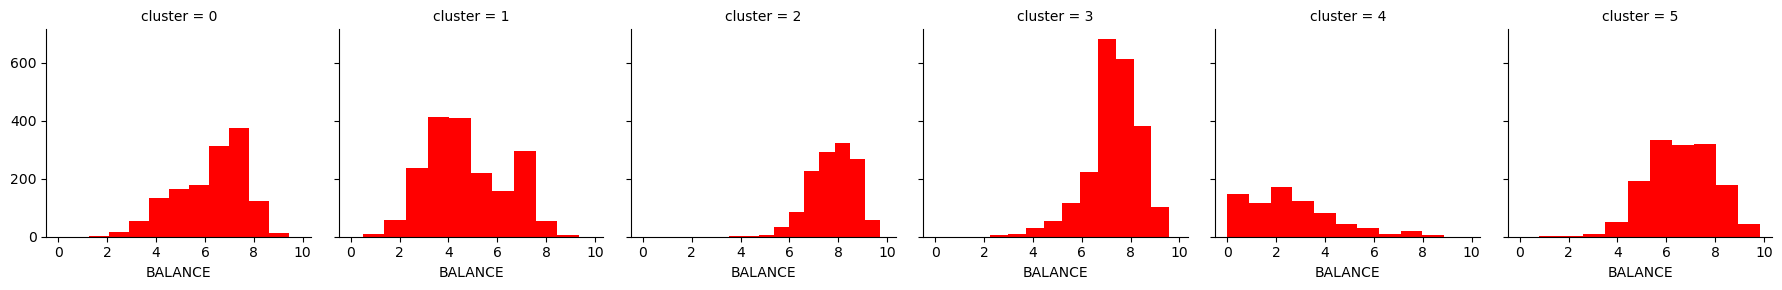

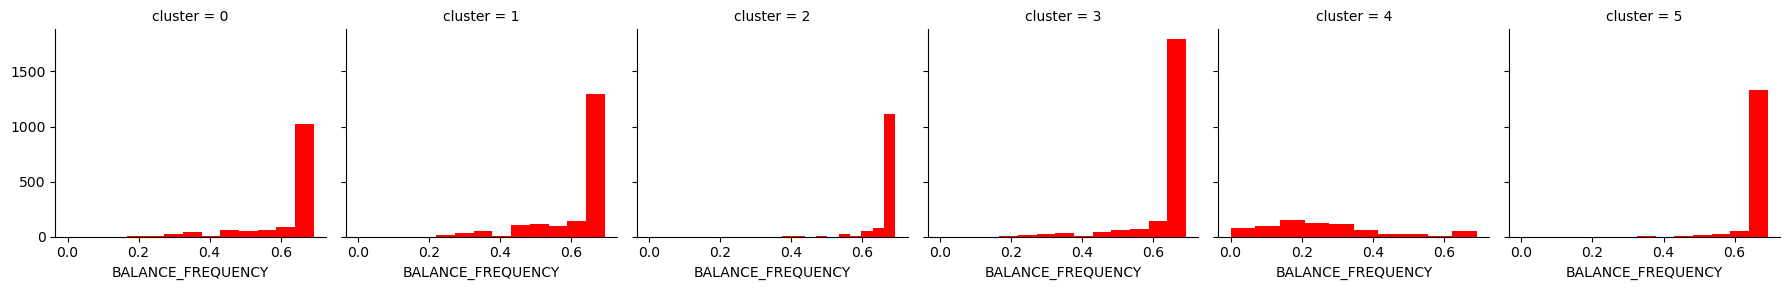

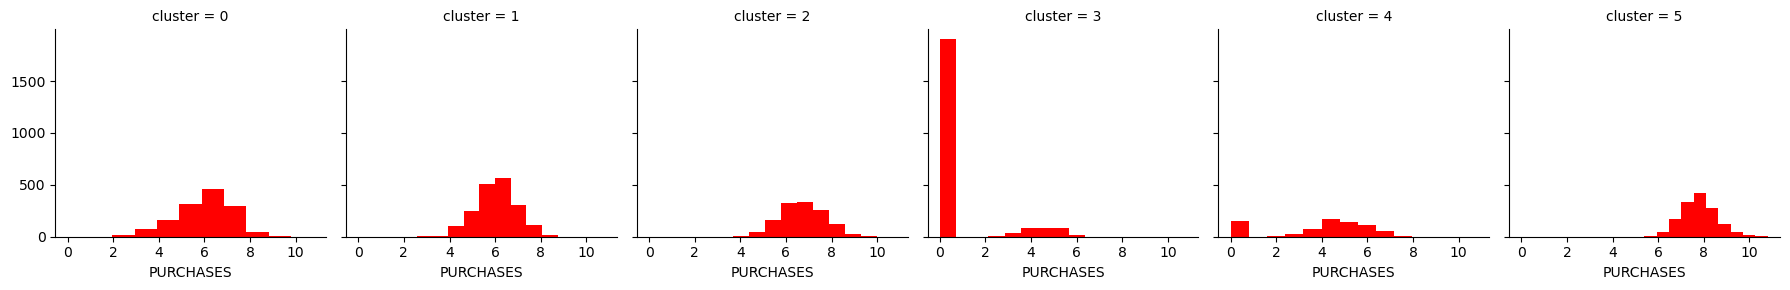

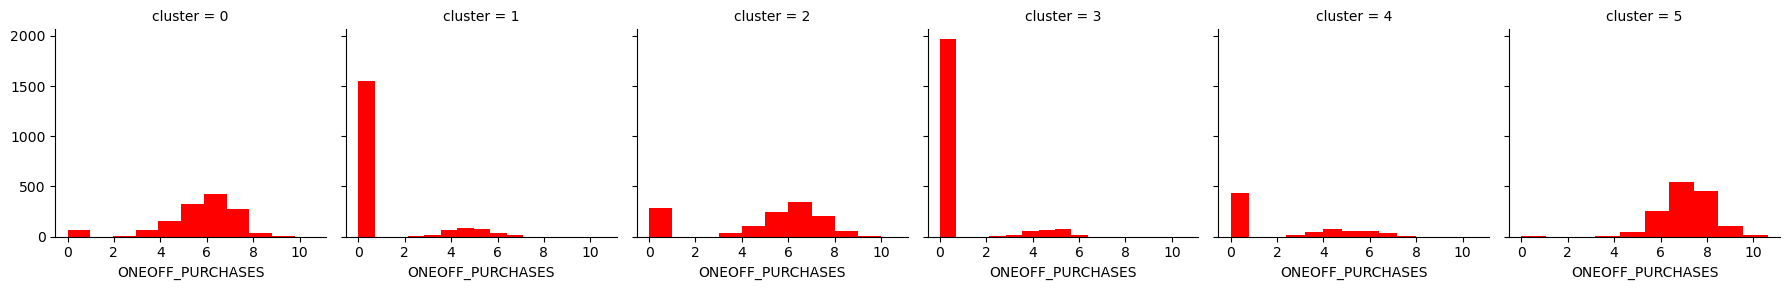

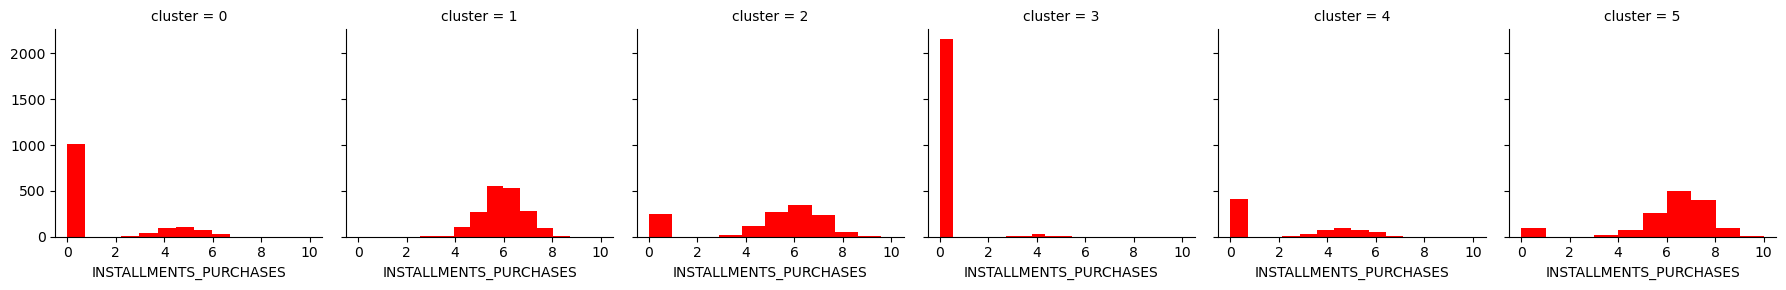

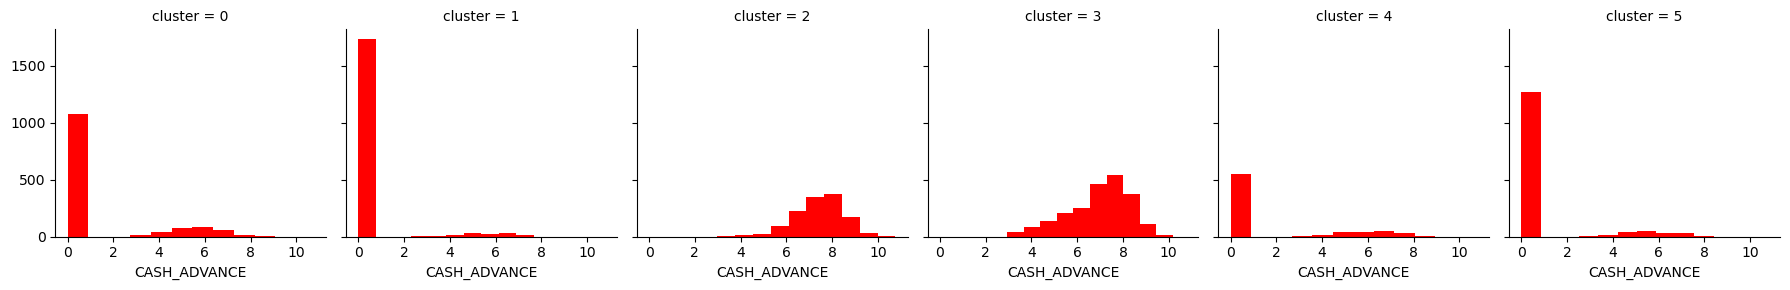

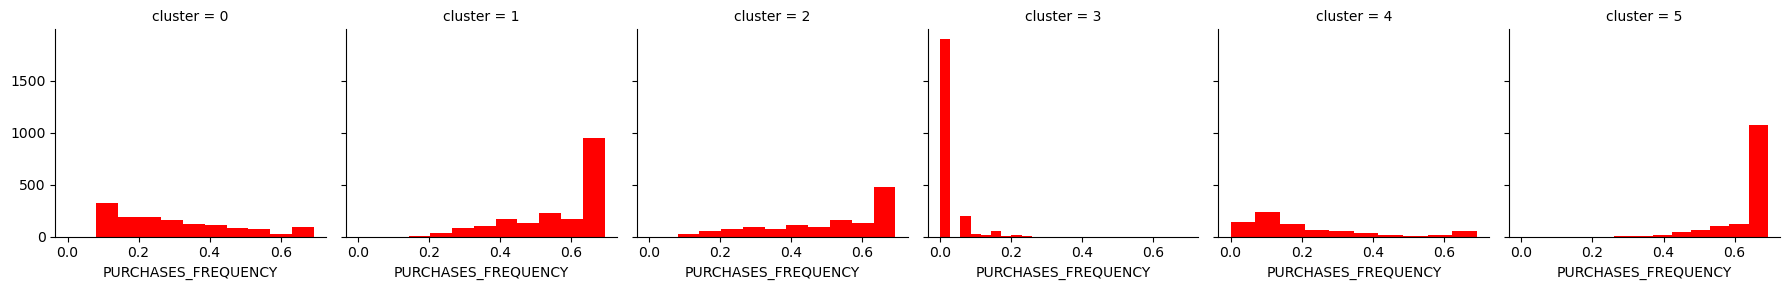

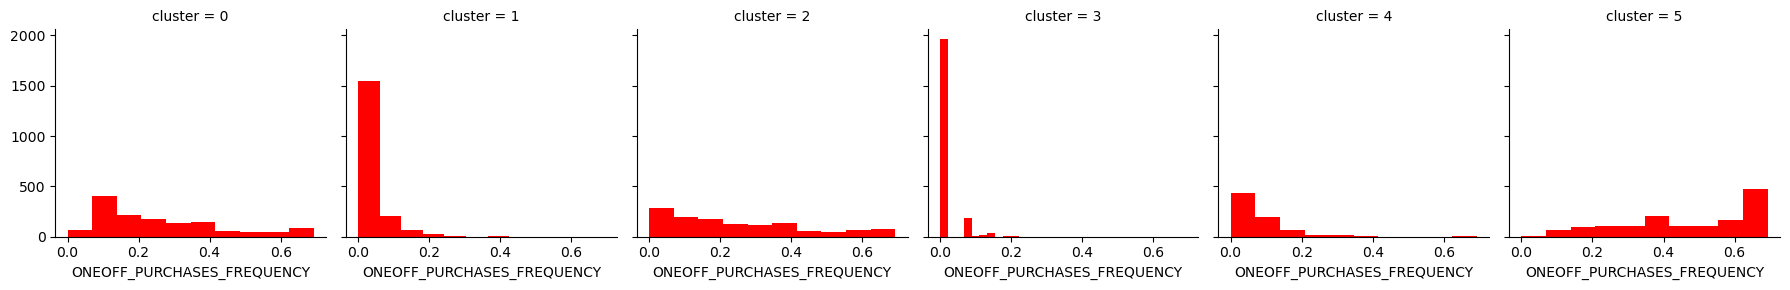

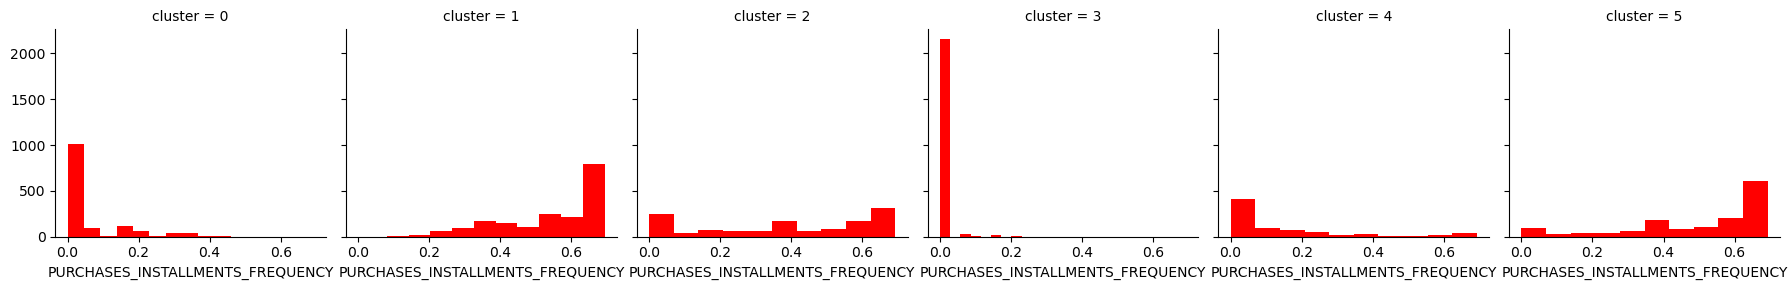

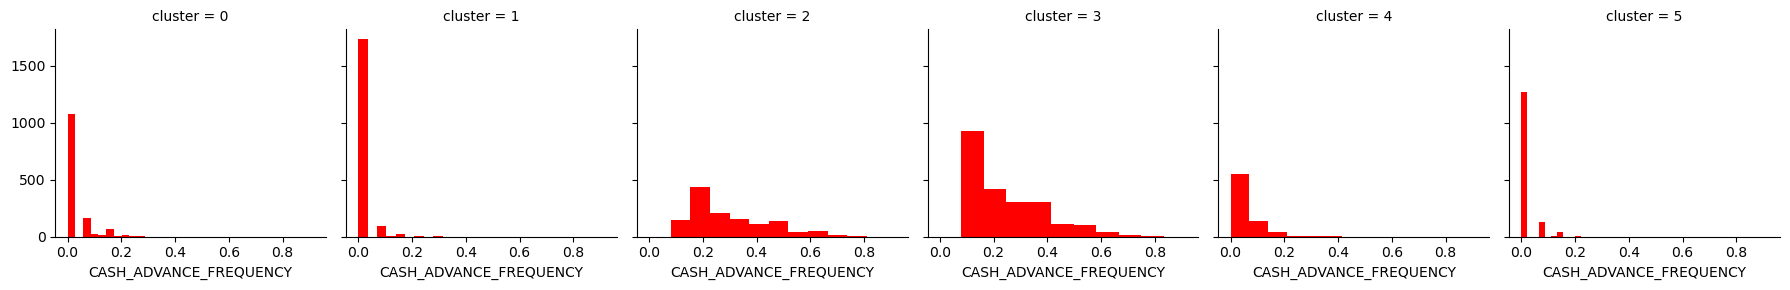

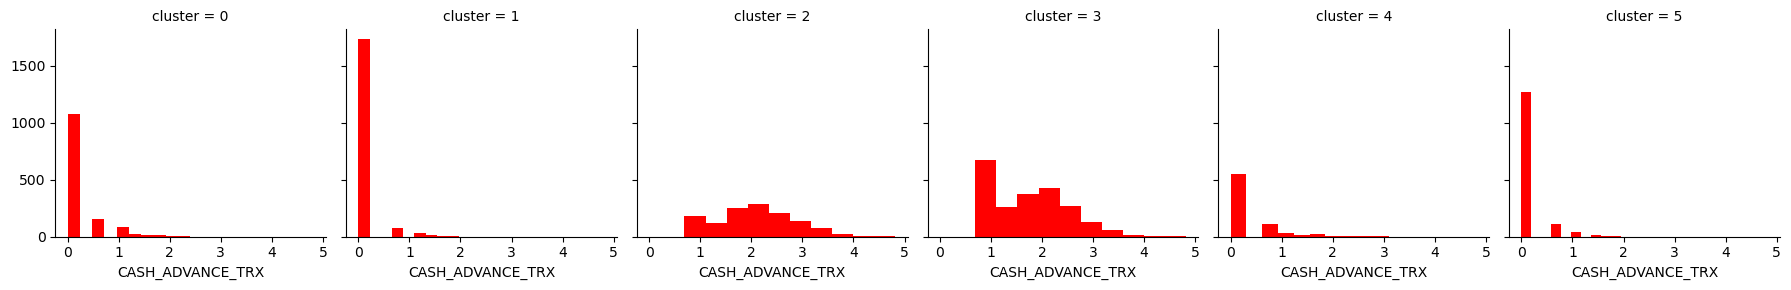

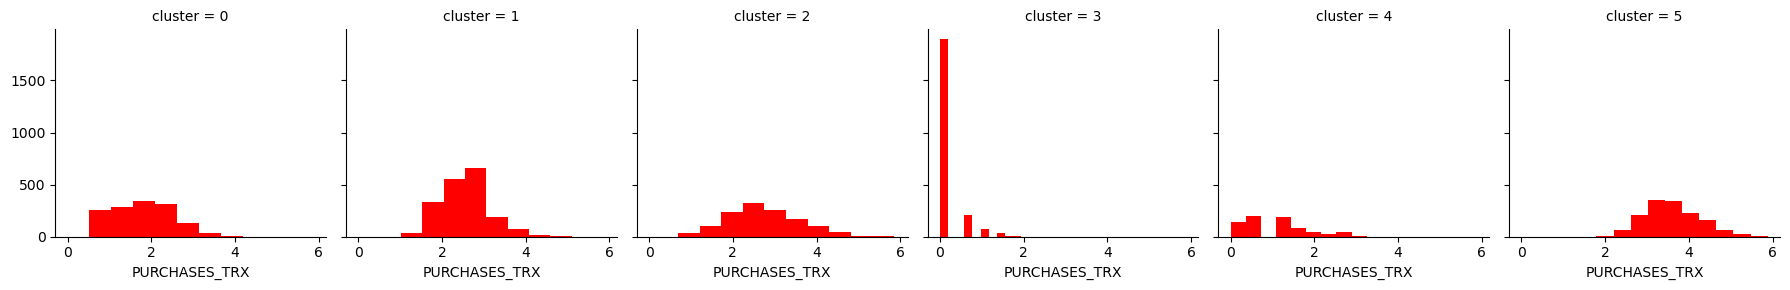

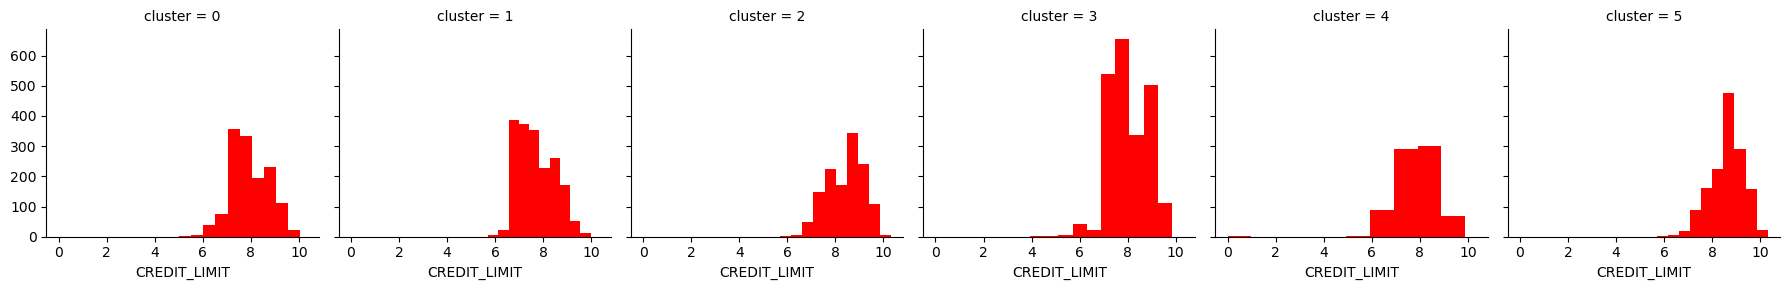

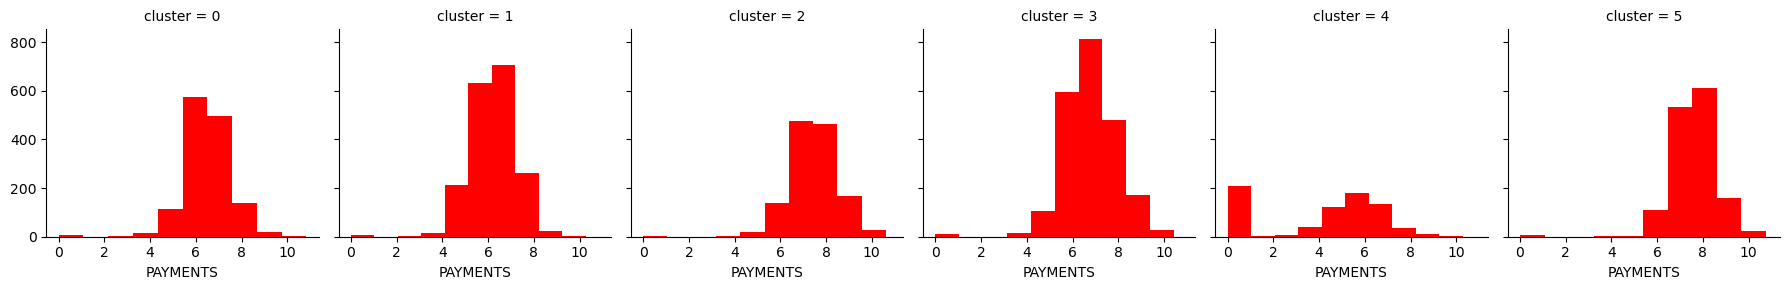

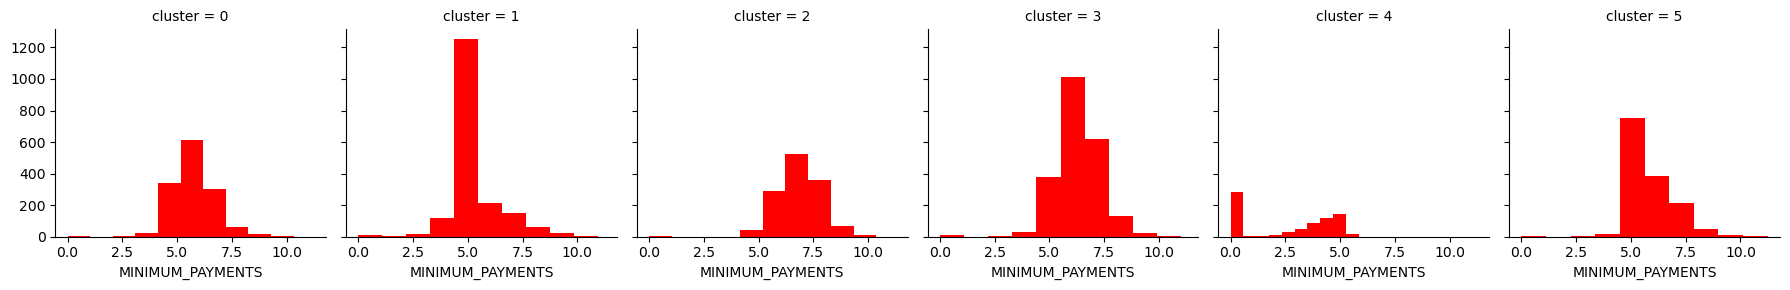

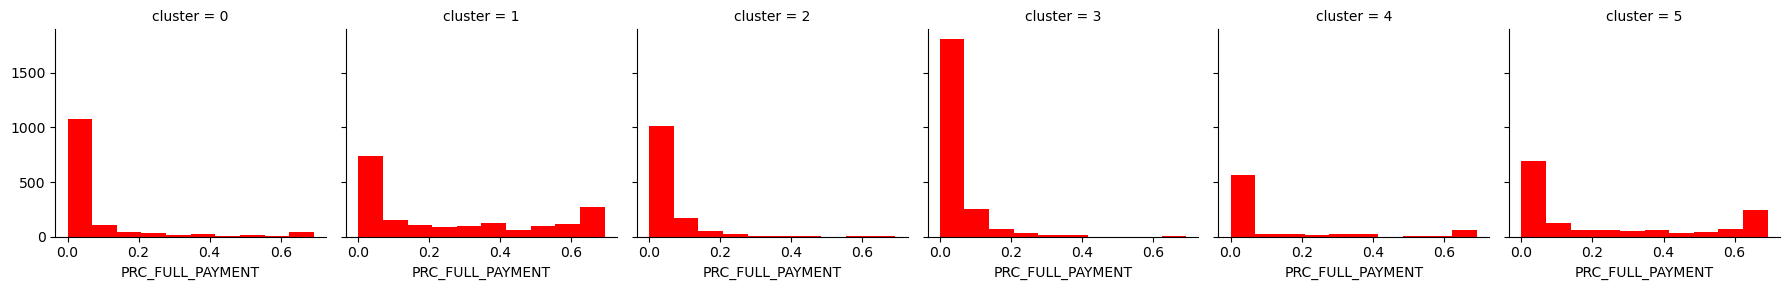

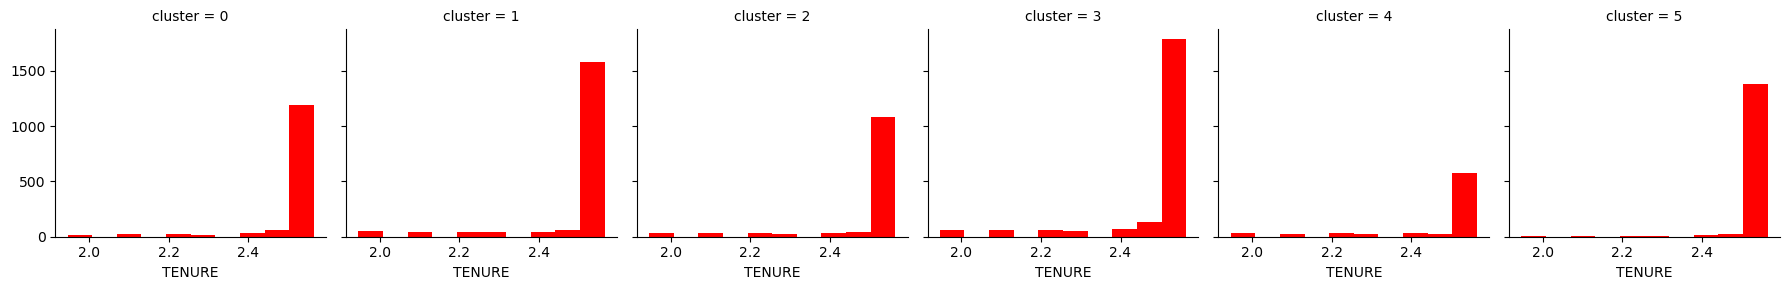

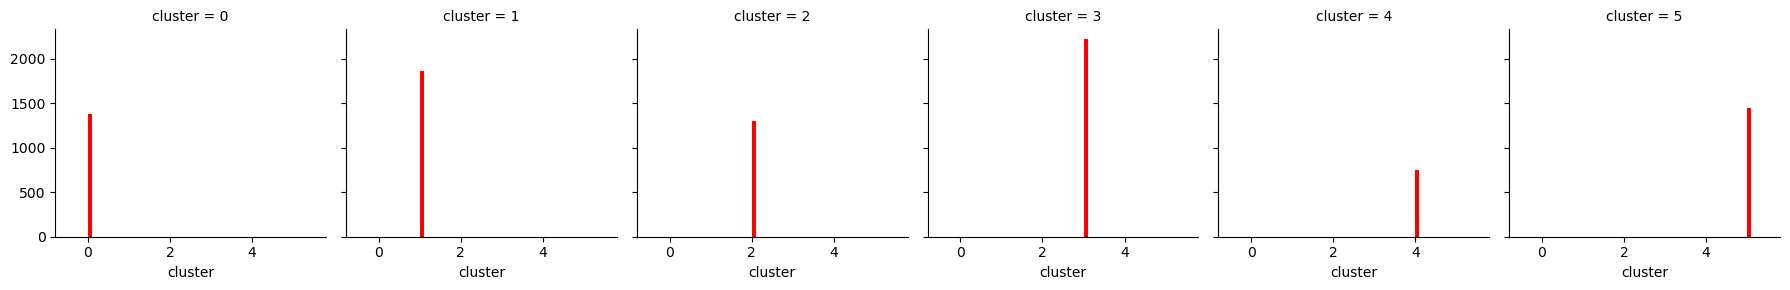

In [151]:
#some plotting based on clusters
for c in cluster_kmeans:
    grid=sns.FacetGrid(cluster_kmeans,col='cluster')
    grid.map(plt.hist,c,color='red')

Text(31.67467503561253, 0.5, 'PURCHASES_TRX')

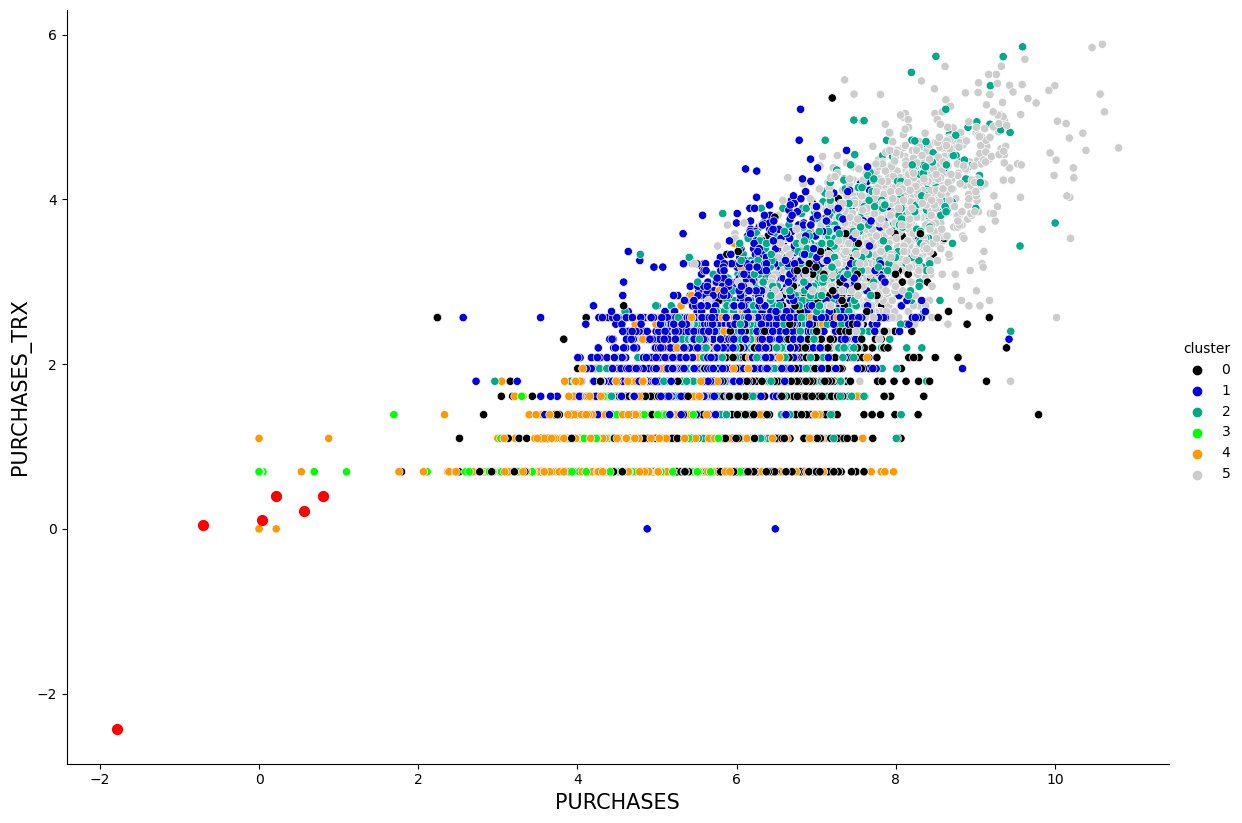

In [152]:
sns.relplot(data = cluster_kmeans,x='PURCHASES' , y  ='PURCHASES_TRX', hue='cluster', palette='nipy_spectral',kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)

[[ 0.21683152  0.39982111  0.98754415  1.20453155  0.9252704  -0.73879059
   1.03810113  1.41940412  0.83851525 -0.6453984  -0.70310119  1.23604515
   0.66791902  0.62108347  0.0992686   0.48365277  0.27353176]
 [ 0.56595908  0.22184456 -1.46066182 -0.82537679 -1.04921218  1.02048005
  -1.24649729 -0.6798817  -0.94559656  0.83029865  0.91000594 -1.28505741
  -0.07746585  0.09742545  0.37551738 -0.41596328 -0.077897  ]
 [-0.69499285  0.05967643  0.3950758  -0.73887162  0.85621769 -0.81703675
   0.76709851 -0.6378333   0.9854574  -0.67357115 -0.74130352  0.44882561
  -0.45053646 -0.26157547 -0.23379386  0.61863486 -0.03879573]
 [ 0.03594349  0.10864669  0.3760239   0.76635241 -0.68581437 -0.58471758
  -0.27683046  0.39729115 -0.77835638 -0.56114099 -0.59454398 -0.0883842
  -0.17713715 -0.08277373  0.00935608 -0.26140406  0.06996841]
 [ 0.79895668  0.39738732  0.6219977   0.52550946  0.4915871   1.15756374
   0.53743335  0.35537641  0.39363744  1.17245348  1.23936014  0.61445358
   0.3975

Text(32.12126958689458, 0.5, 'CASH_ADVANCE')

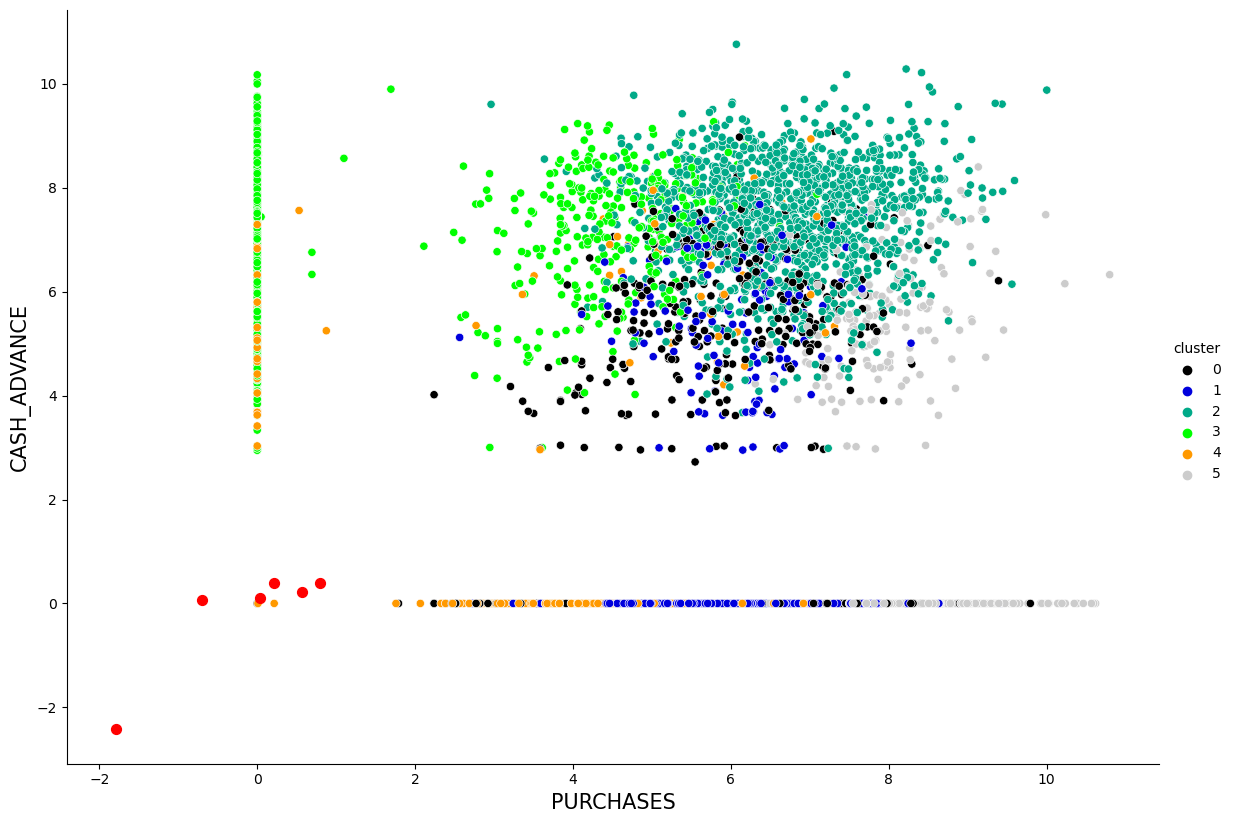

In [153]:
kmeans = KMeans(n_clusters=6).fit(Scaled_features)
centroids=kmeans.cluster_centers_
print(centroids)

sns.relplot(data = cluster_kmeans,x='PURCHASES' , y  ='CASH_ADVANCE', hue='cluster', palette='nipy_spectral',kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("CASH_ADVANCE",fontsize=15)

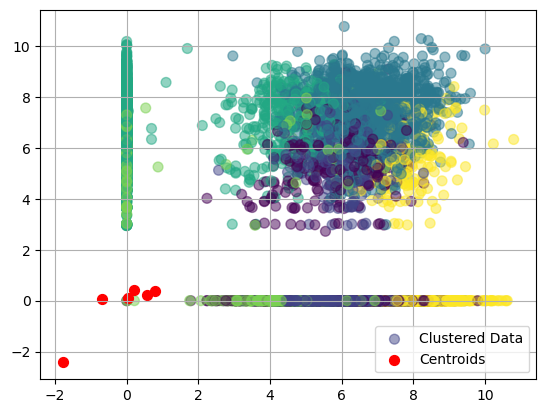

In [154]:
plt.scatter(Df['PURCHASES'], Df['CASH_ADVANCE'], c=Kmeans.labels_.astype('float'),  s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)
plt.legend(['Clustered Data', 'Centroids'])
plt.grid()
plt.show()


In [155]:
#calculating the Sillhouette to improve the model with the k of 6 and finding new k

silhouette_coefficients=[]
for k in range(2,30):
    
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(Scaled_features)
    score=silhouette_score (Scaled_features,kmeans.labels_)
    silhouette_coefficients.append(score)

In [156]:
silhouette_coefficients

[0.2613770477180035,
 0.2329600008851751,
 0.23301178834799607,
 0.2355448988108462,
 0.23626125257499572,
 0.23919289592111123,
 0.2283166058400219,
 0.23142190020187384,
 0.19334334987291868,
 0.19167768659755666,
 0.1966435408782465,
 0.19747585360101377,
 0.1880020257965367,
 0.20550692030240772,
 0.20173225866432404,
 0.20528835774546017,
 0.18452086103451718,
 0.18599889670559683,
 0.17919716437385008,
 0.1813718787900354,
 0.19583202718249423,
 0.17700397664452713,
 0.17816703853607366,
 0.1803229627909112,
 0.1840323111328686,
 0.18381556382699468,
 0.18745582938514357,
 0.185053865018527]

In [160]:
max(silhouette_coefficients)


0.2613770477180035

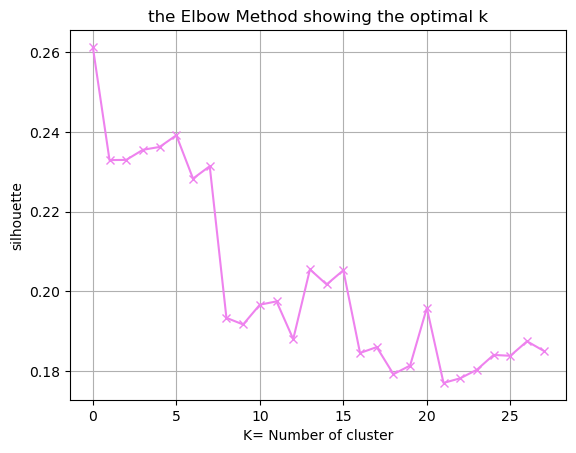

In [161]:
plt.plot(silhouette_coefficients,'bx-',color='violet')
plt.xlabel('K= Number of cluster')
plt.ylabel('silhouette')
plt.title('the Elbow Method showing the optimal k')
plt.grid()
plt.show()

In [162]:
KM2=KneeLocator(range (2,30),silhouette_coefficients,curve="convex",direction="decreasing")
KM2.elbow

3

In [163]:
print(silhouette_coefficients)
print(max(silhouette_coefficients))
print (min (silhouette_coefficients))

[0.2613770477180035, 0.2329600008851751, 0.23301178834799607, 0.2355448988108462, 0.23626125257499572, 0.23919289592111123, 0.2283166058400219, 0.23142190020187384, 0.19334334987291868, 0.19167768659755666, 0.1966435408782465, 0.19747585360101377, 0.1880020257965367, 0.20550692030240772, 0.20173225866432404, 0.20528835774546017, 0.18452086103451718, 0.18599889670559683, 0.17919716437385008, 0.1813718787900354, 0.19583202718249423, 0.17700397664452713, 0.17816703853607366, 0.1803229627909112, 0.1840323111328686, 0.18381556382699468, 0.18745582938514357, 0.185053865018527]
0.2613770477180035
0.17700397664452713


In [164]:
Kmeans = KMeans(n_clusters=3).fit(Scaled_features)
centroids = Kmeans.cluster_centers_
print(centroids)
labels=Kmeans.labels_
labels

[[ 0.40861435  0.41447506  0.80247546  0.80364948  0.6392543  -0.16028803
   0.8288472   0.84809986  0.5890176  -0.15518334 -0.14867596  0.91837947
   0.33980183  0.47600295  0.36480069  0.03210808  0.19017008]
 [ 0.55699256  0.1995156  -1.14053115 -0.59538939 -0.95557231  0.9950279
  -1.09657024 -0.56405903 -0.88796754  0.8482888   0.90894673 -1.08997108
  -0.04647098  0.08641362  0.35449052 -0.41448539 -0.11421464]
 [-1.04056057 -0.68936953  0.19482761 -0.35266999  0.20230571 -0.80749539
   0.11964325 -0.43655239  0.19391078 -0.66652407 -0.73497514  0.00729385
  -0.35475574 -0.6487315  -0.78595409  0.37730242 -0.11017504]]


array([2, 1, 0, ..., 2, 1, 2])

In [165]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, **kmeans_set) 
kmeans.fit(Scaled_features) 
score = silhouette_score(Scaled_features, kmeans.labels_) 

# Calculate clustering metrics by k= 3
silhouette = silhouette_score(Scaled_features,kmeans.labels_)
ch_index = calinski_harabasz_score(Scaled_features,kmeans.labels_)


# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

score

Silhouette Score: 0.23
Calinski-Harabasz Index: 2709.50


0.2329600008851751

In [166]:
cluster_kmeans = pd.DataFrame(data = Kmeans.cluster_centers_, columns = [Df.columns])
cluster_kmeans=pd.concat([Df,pd.DataFrame({'cluster':labels})],axis=1)
cluster_kmeans

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3.735304           0.597837   4.568506          0.000000   
1     8.071989           0.646627   0.000000          0.000000   
2     7.822504           0.693147   6.651791          6.651791   
3     7.419183           0.492477   7.313220          7.313220   
4     6.707735           0.693147   2.833213          2.833213   
...        ...                ...        ...               ...   
8945  3.384170           0.693147   5.677165          0.000000   
8946  3.004851           0.693147   5.707110          0.000000   
8947  3.194529           0.606136   4.979489          0.000000   
8948  2.671218           0.606136   0.000000          0.000000   
8949  5.923475           0.510826   6.997824          6.997824   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   4.568506      0.000000             0.154151   
1                   0.000000      8.770896             0.000000   
2                   0.000000      0.000000             0.693147   
3                   0.000000      5.331694             0.080042   
4                   0.000000      0.000000             0.080042   
...                      ...           ...                  ...   
8945                5.677165      0.000000             0.693147   
8946                5.707110      0.000000             0.693147   
8947                4.979489      0.000000             0.606136   
8948                0.000000      3.625907             0.000000   
8949                0.000000      4.852343             0.510826   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.080042   
1                       0.000000                          0.000000   
2                       0.693147                          0.000000   
3                       0.080042                          0.000000   
4                       0.080042                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.606136   
8946                    0.000000                          0.606136   
8947                    0.000000                          0.510826   
8948                    0.000000                          0.000000   
8949                    0.510826                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000          0.000000       1.098612      6.908755   
1                   0.223144          1.609438       0.000000      8.853808   
2                   0.000000          0.000000       2.564949      8.922792   
3                   0.080042          0.693147       0.693147      8.922792   
4                   0.000000          0.000000       0.693147      7.090910   
...                      ...               ...            ...           ...   
8945                0.000000          0.000000       1.945910      6.908755   
8946                0.000000          0.000000       1.945910      6.908755   
8947                0.000000          0.000000       1.791759      6.908755   
8948                0.154151          1.098612       0.000000      6.216606   
8949                0.287682          1.098612       3.178054      7.090910   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  cluster  
0     5.312231          4.945277          0.000000  2.564949        2  
1     8.319725          6.978531          0.200671  2.564949        1  
2     6.434654          6.442994          0.000000  2.564949        0  
3     0.000000          0.000000          0.000000  2.564949        2  
4     6.521114          5.504483          0.000000  2.564949        2  
...        ...               ...               ...       ...      ...  
8945  5.788719          3.909748          0.405465  1.945910        2  
8946  5.623517          0.000000          0

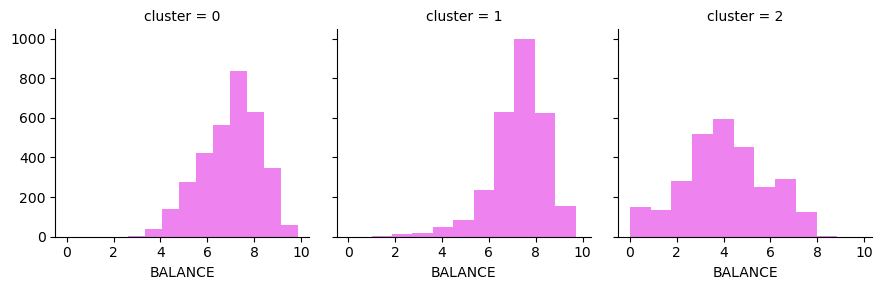

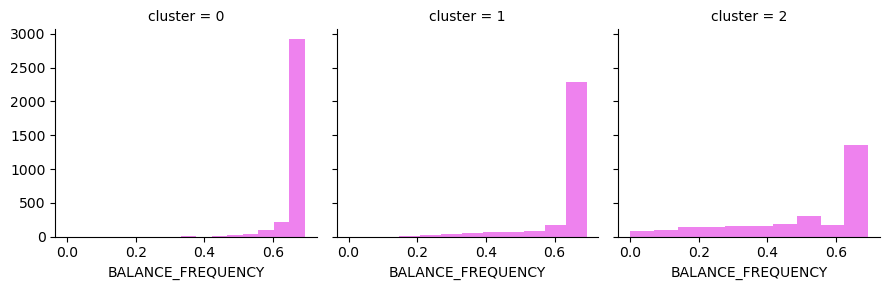

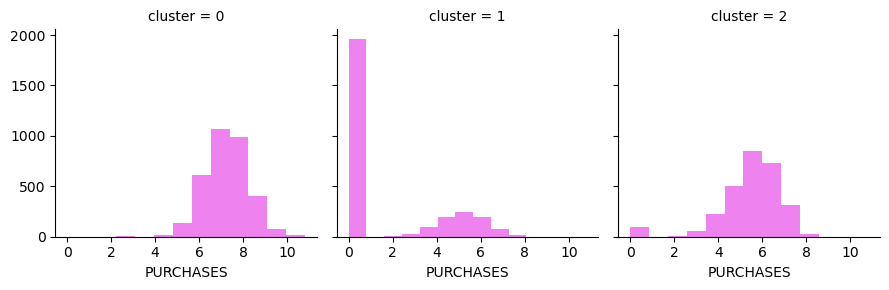

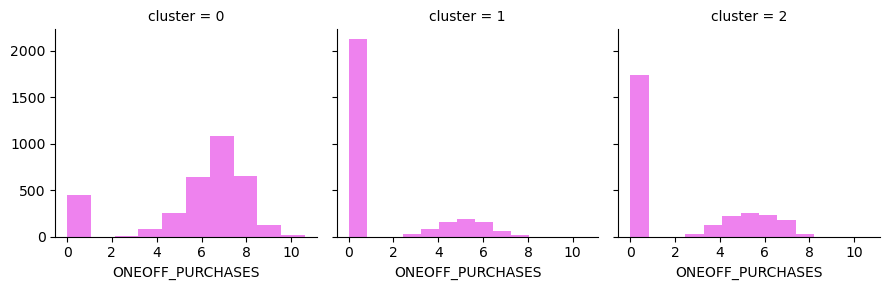

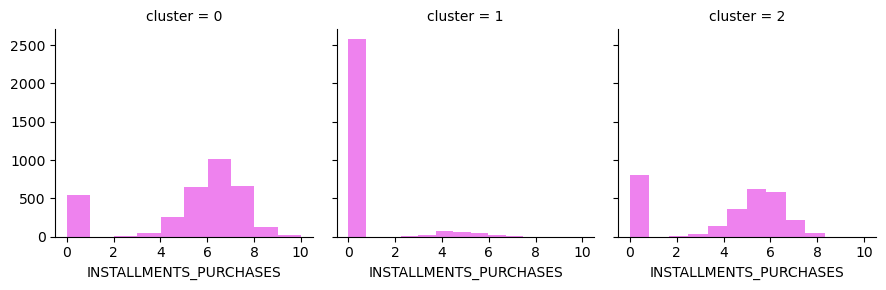

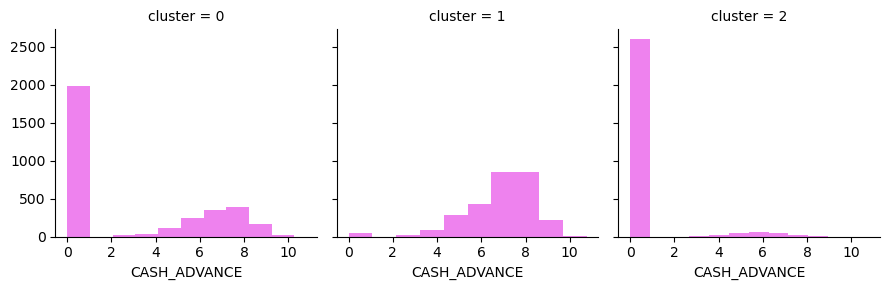

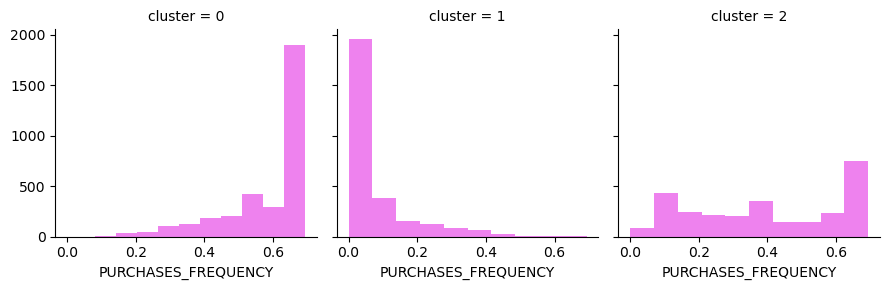

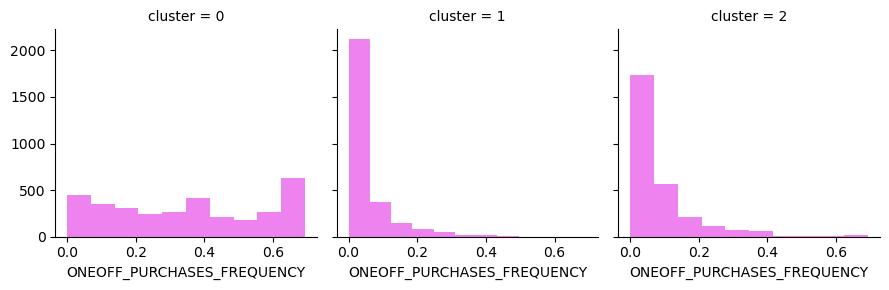

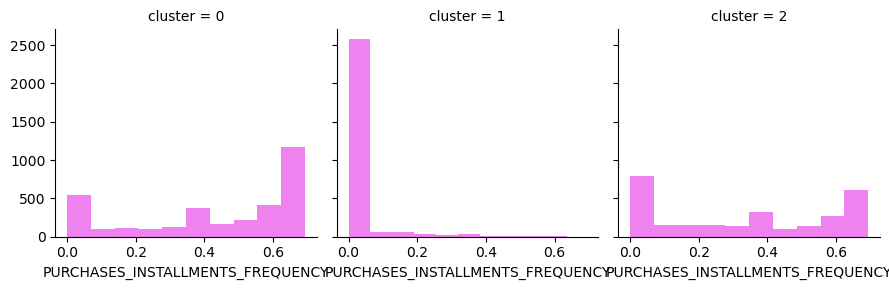

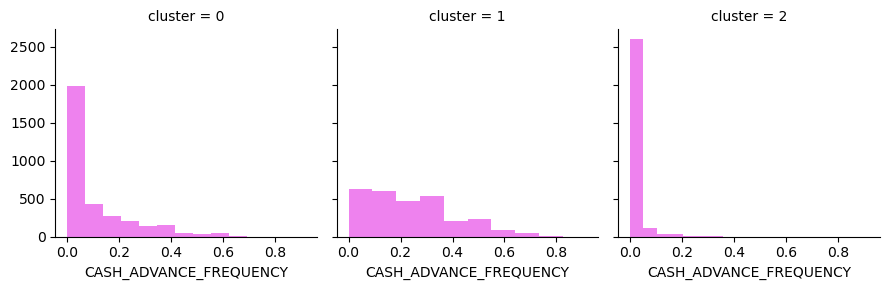

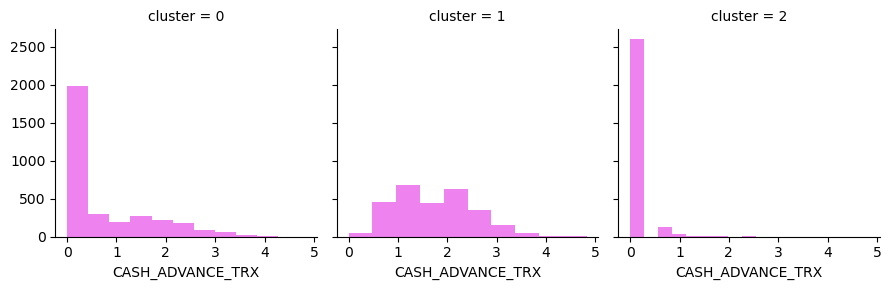

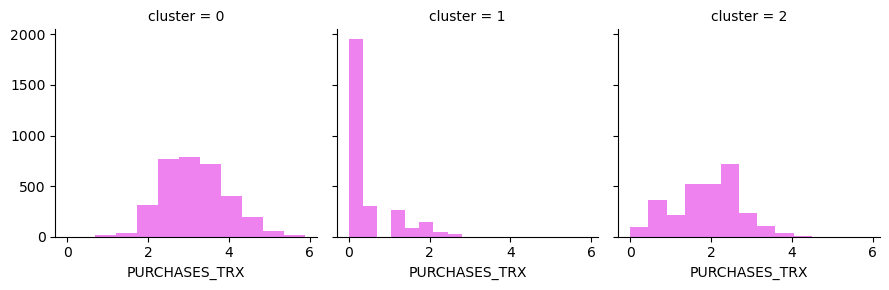

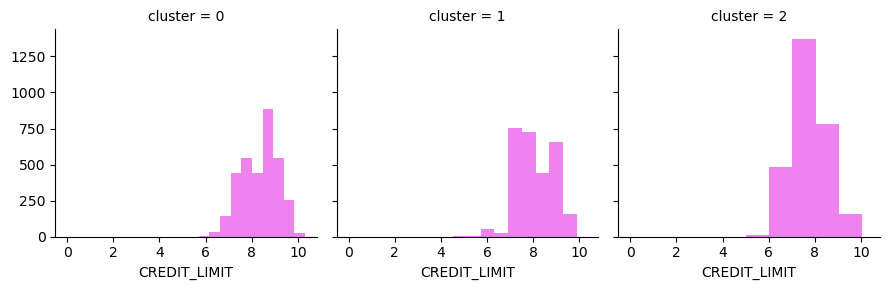

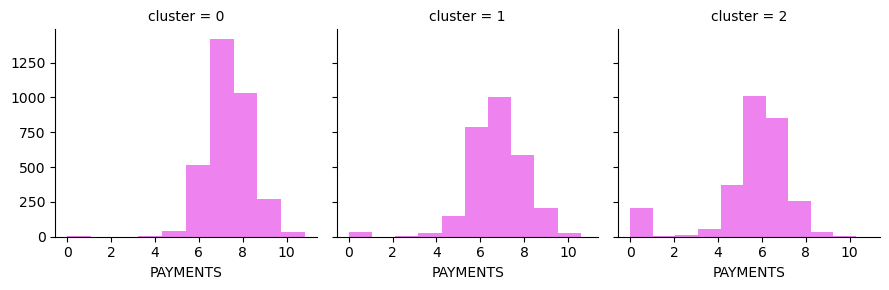

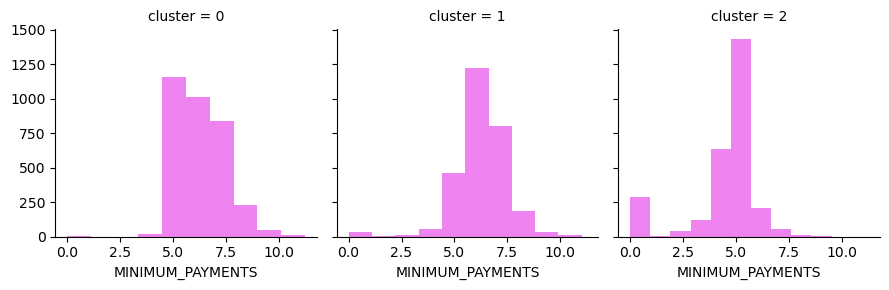

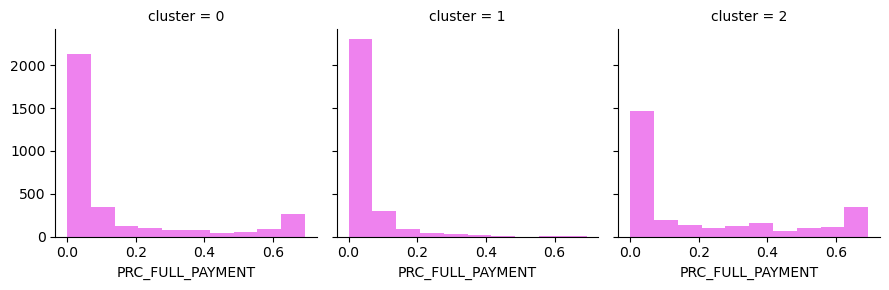

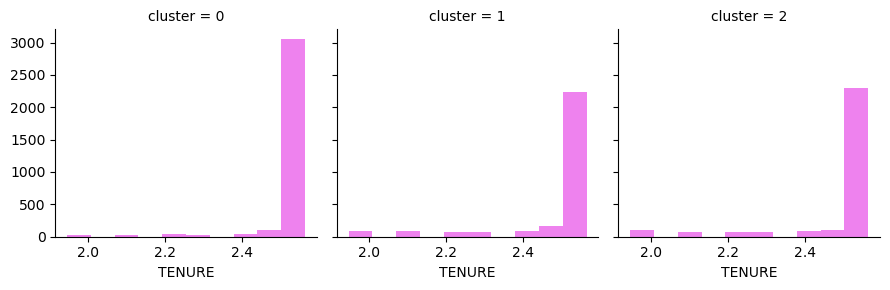

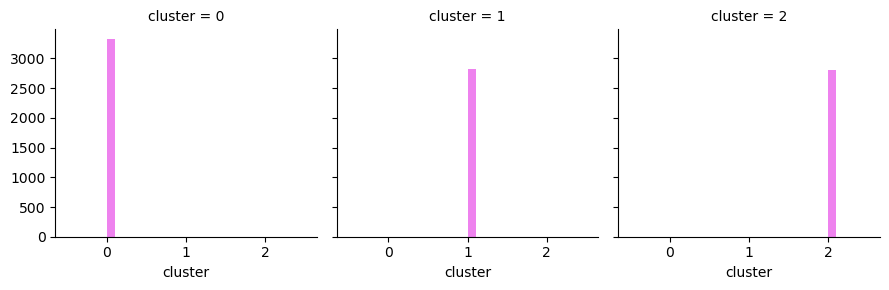

In [167]:
for c in cluster_kmeans:
    grid=sns.FacetGrid(cluster_kmeans,col='cluster')
    grid.map(plt.hist,c,color='violet')

[[-1.03944691 -0.68903687  0.19484044 -0.35153947  0.20093119 -0.80694752
   0.11923544 -0.4354495   0.19268289 -0.66628301 -0.7348112   0.00724912
  -0.35479678 -0.64822991 -0.78527242  0.37664427 -0.11101058]
 [ 0.55709725  0.20023439 -1.14135717 -0.59619757 -0.95547861  0.99571691
  -1.09694314 -0.56460418 -0.8879176   0.84910344  0.90992408 -1.09046584
  -0.04636723  0.086589    0.35479942 -0.41438459 -0.11321947]
 [ 0.4089802   0.4144515   0.80254356  0.80357825  0.63977439 -0.16005597
   0.82899012  0.84793708  0.58948365 -0.1550119  -0.14847674  0.91845033
   0.34014359  0.47621059  0.36499443  0.0319997   0.19012277]]


Text(31.67467503561253, 0.5, 'PURCHASES_TRX')

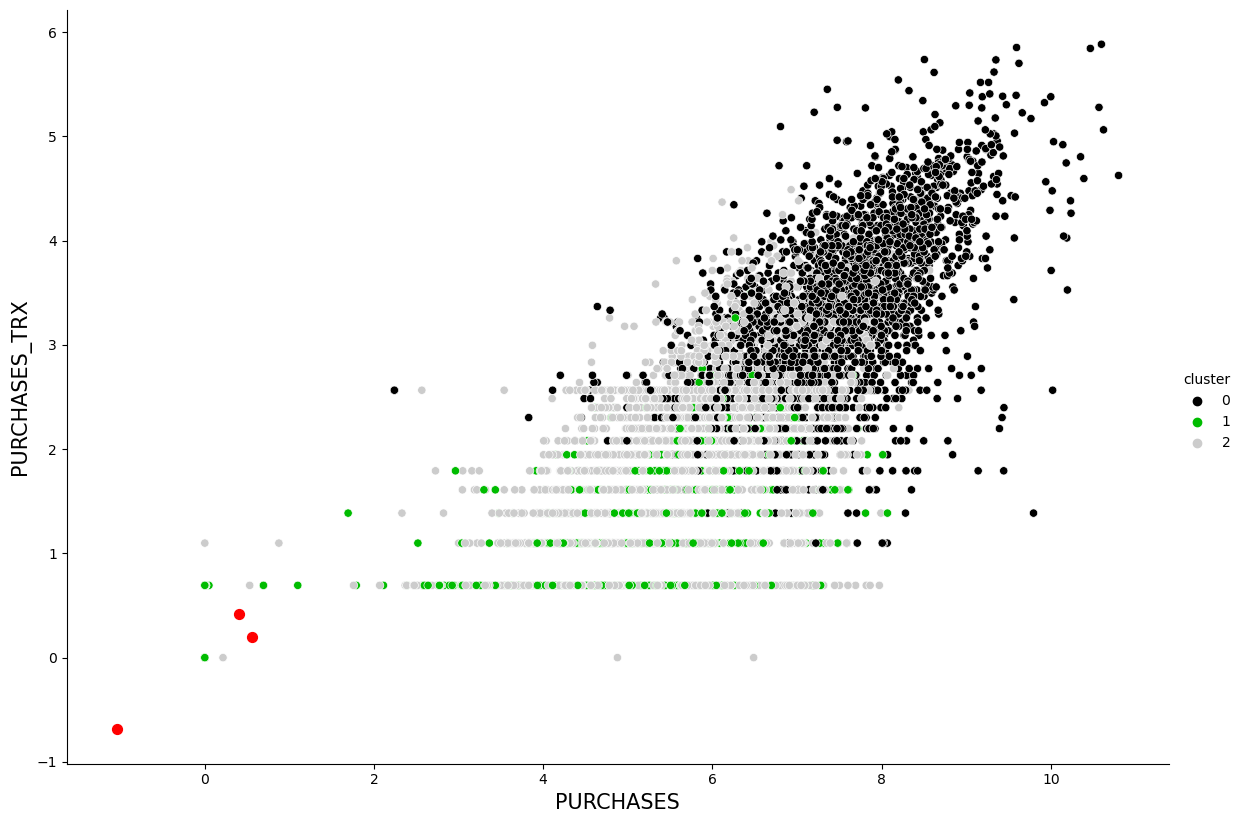

In [168]:
kmeans = KMeans(n_clusters=3).fit(Scaled_features)
centroids=kmeans.cluster_centers_
print(centroids)

sns.relplot(data = cluster_kmeans,x='PURCHASES' , y  ='PURCHASES_TRX', hue='cluster', palette='nipy_spectral',kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)

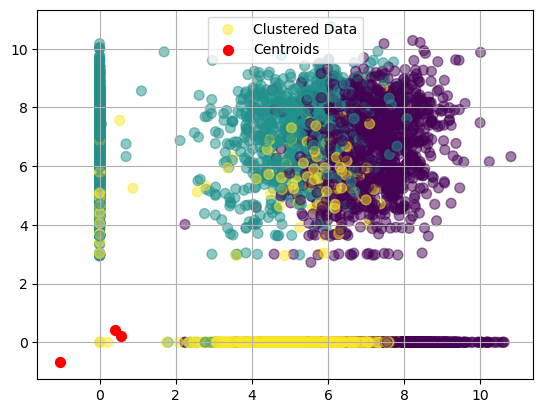

In [169]:
plt.scatter(Df['PURCHASES'], Df['CASH_ADVANCE'], c=Kmeans.labels_.astype('float'),  s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)
plt.legend(['Clustered Data', 'Centroids'])
plt.grid()
plt.show()


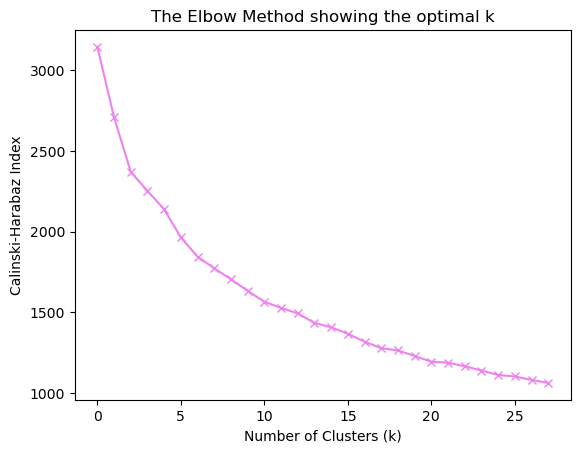

In [170]:
# calculationg the calinski_harabaz for the best K
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

calinski_harabaz = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(Scaled_features)
    score = calinski_harabasz_score(Scaled_features, labels)
    calinski_harabaz.append(score)

plt.plot(calinski_harabaz, 'bx-', color='violet')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabaz Index')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [171]:
KM3=KneeLocator(range (2,30),calinski_harabaz,curve="convex",direction="decreasing")
KM3.elbow


8

In [172]:
print(calinski_harabaz)
max(calinski_harabaz)


[3144.6727235307017, 2709.5088382813933, 2370.1290312915994, 2252.458065356659, 2138.261554850884, 1963.4325139722034, 1844.47004890697, 1771.9022310253167, 1703.886291066913, 1632.190791560872, 1564.8552689454195, 1525.976493719822, 1492.583441995387, 1433.3150193165757, 1406.377766727286, 1366.3656636533203, 1316.854784782669, 1276.8109753410574, 1262.6626956117334, 1228.527234927472, 1192.7376770468095, 1186.4945467066507, 1164.7501575828724, 1138.2556513629534, 1110.366414272929, 1101.3286859133277, 1080.0310933286871, 1061.257243916614]


3144.6727235307017

In [175]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Kmeans = KMeans(n_clusters=8)
labels = Kmeans.fit_predict(Scaled_features)
score = silhouette_score(Scaled_features, labels)

In [177]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate clustering metrics for KMeans
Kmeans = KMeans(n_clusters=8)
labels = Kmeans.fit_predict(Scaled_features)
silhouette = silhouette_score(Scaled_features, labels)
ch_index = calinski_harabasz_score(Scaled_features, labels)

# Print the metric scores for KMeans
print(f"Silhouette Score (KMeans): {silhouette:.2f}")
print(f"Calinski-Harabasz Index (KMeans): {ch_index:.2f}")

Silhouette Score (KMeans): 0.23
Calinski-Harabasz Index (KMeans): 1825.14


In [178]:
#calculating the metrics based on inertia annd =6


from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, **kmeans_set) 
kmeans.fit(Scaled_features) 

score = silhouette_score(Scaled_features, labels=Kmeans.labels_) 
score

0.22603204298281804

In [179]:
#calculating the metrics based on SS and =3

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, **kmeans_set) 
kmeans.fit(Scaled_features) 

score = silhouette_score(Scaled_features, labels=Kmeans.labels_) 
score

0.22603204298281804

In [180]:
#calculating the metrics based on SS and =8

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, **kmeans_set) 
kmeans.fit(Scaled_features) 

score = silhouette_score(Scaled_features, labels=Kmeans.labels_) 
score

0.22603204298281804

In [182]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, **kmeans_set) 
kmeans.fit(Scaled_features) 
score = silhouette_score(Scaled_features, kmeans.labels_) 

# Calculate clustering metrics by k= 3
silhouette = silhouette_score(Scaled_features,kmeans.labels_)
ch_index = calinski_harabasz_score(Scaled_features,kmeans.labels_)


# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

score

Silhouette Score: 0.23
Calinski-Harabasz Index: 2709.50


0.2329600008851751

In [183]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, **kmeans_set) 
kmeans.fit(Scaled_features) 
score = silhouette_score(Scaled_features, kmeans.labels_) 

# Calculate clustering metrics by k= 6
silhouette = silhouette_score(Scaled_features,kmeans.labels_)
ch_index = calinski_harabasz_score(Scaled_features,kmeans.labels_)


# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

score

Silhouette Score: 0.24
Calinski-Harabasz Index: 2138.26


0.23626125257499572

In [184]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=8, **kmeans_set) 
kmeans.fit(Scaled_features) 
score = silhouette_score(Scaled_features, kmeans.labels_) 

# Calculate clustering metrics by k= 8
silhouette = silhouette_score(Scaled_features,kmeans.labels_)
ch_index = calinski_harabasz_score(Scaled_features,kmeans.labels_)


# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

score

Silhouette Score: 0.23
Calinski-Harabasz Index: 1844.69


0.2283166058400219

In [185]:
import tkinter as tk

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [187]:
#####2 Guassian Mixture Model
# Fit multiple GMM models with different numbers of components
n_components = range(2, 30)
bics = []
aics = []
for n in n_components:
    gmm = GaussianMixture(n_components=n).fit(Scaled_features)
    bics.append(gmm.bic(Scaled_features))
    aics.append(gmm.aic(Scaled_features))

# Find the number of components that minimizes BIC and AIC
optimal_bic = np.argmin(bics) + 1
optimal_aic = np.argmin(aics) + 1

print(f'Optimal number of components based on BIC: {optimal_bic}')
print(f'Optimal number of components based on AIC: {optimal_aic}')

Optimal number of components based on BIC: 25
Optimal number of components based on AIC: 25


In [188]:
K3=KneeLocator(range (2,30),bics,curve="convex",direction="decreasing")
K3.elbow

7

In [189]:
K4=KneeLocator(range (2,30),aics,curve="convex",direction="decreasing")
K4.elbow

7

In [190]:
gmm = GaussianMixture(n_components=7, random_state=1 )
gmm.fit(Scaled_features)
labels = gmm.predict(Scaled_features)
cluster_means = pd.DataFrame(data = gmm.means_, columns = [Df.columns])
cluster_means


BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -1.012333         -1.862571 -0.342143        -0.234127   
1  0.025718          0.267543  0.826178         1.018552   
2  0.681608          0.369069  0.589972         0.340767   
3  0.471360          0.136655 -1.133775        -0.496435   
4 -0.900382         -0.281879  0.295383        -0.987090   
5 -0.408309         -0.397599  0.370196         0.854889   
6  0.146694          0.213247  0.671313         0.492028   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.421556    -0.068743           -0.510160   
1               0.933839    -0.930733            0.814982   
2               0.827869     1.095199            0.629726   
3              -1.087454     0.991875           -1.069849   
4               0.781364    -0.930733            0.583011   
5              -1.087454    -0.930733           -0.285665   
6               0.877321     0.094191            0.692000   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.262391                        -0.464906   
1                   0.919231                         0.756231   
2                   0.246159                         0.667024   
3                  -0.434330                        -0.958256   
4                  -0.732480                         0.822914   
5                   0.569341                        -0.958256   
6                   0.398028                         0.705932   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.252428        -0.191661     -0.501003    -0.107182   
1              -0.724360        -0.810069      0.977864     0.388251   
2               1.017129         1.144948      0.671263     0.253775   
3               0.786802         0.857357     -1.060795    -0.074215   
4              -0.724360        -0.810069      0.302541    -0.402080   
5              -0.724360        -0.810069     -0.149946    -0.035127   
6              -0.386694        -0.356044      0.706990     0.075191   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -4.161996        -3.578076        -0.556368 -0.416169  
1  0.401993         0.023775         0.359303  0.347262  
2  0.466145         0.600329        -0.338548 -0.069991  
3  0.126245         0.325516        -0.361124 -0.120584  
4 -0.321660        -0.354225         0.573991 -0.006435  
5 -0.104569        -0.239702        -0.050541  0.064460  
6  0.241863         0.137475         0.027667 -0.242830

In [191]:
cluster_=pd.concat([Df,pd.DataFrame({'cluster':labels})],axis=1)
cluster_

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3.735304           0.597837   4.568506          0.000000   
1     8.071989           0.646627   0.000000          0.000000   
2     7.822504           0.693147   6.651791          6.651791   
3     7.419183           0.492477   7.313220          7.313220   
4     6.707735           0.693147   2.833213          2.833213   
...        ...                ...        ...               ...   
8945  3.384170           0.693147   5.677165          0.000000   
8946  3.004851           0.693147   5.707110          0.000000   
8947  3.194529           0.606136   4.979489          0.000000   
8948  2.671218           0.606136   0.000000          0.000000   
8949  5.923475           0.510826   6.997824          6.997824   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   4.568506      0.000000             0.154151   
1                   0.000000      8.770896             0.000000   
2                   0.000000      0.000000             0.693147   
3                   0.000000      5.331694             0.080042   
4                   0.000000      0.000000             0.080042   
...                      ...           ...                  ...   
8945                5.677165      0.000000             0.693147   
8946                5.707110      0.000000             0.693147   
8947                4.979489      0.000000             0.606136   
8948                0.000000      3.625907             0.000000   
8949                0.000000      4.852343             0.510826   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.080042   
1                       0.000000                          0.000000   
2                       0.693147                          0.000000   
3                       0.080042                          0.000000   
4                       0.080042                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.606136   
8946                    0.000000                          0.606136   
8947                    0.000000                          0.510826   
8948                    0.000000                          0.000000   
8949                    0.510826                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000          0.000000       1.098612      6.908755   
1                   0.223144          1.609438       0.000000      8.853808   
2                   0.000000          0.000000       2.564949      8.922792   
3                   0.080042          0.693147       0.693147      8.922792   
4                   0.000000          0.000000       0.693147      7.090910   
...                      ...               ...            ...           ...   
8945                0.000000          0.000000       1.945910      6.908755   
8946                0.000000          0.000000       1.945910      6.908755   
8947                0.000000          0.000000       1.791759      6.908755   
8948                0.154151          1.098612       0.000000      6.216606   
8949                0.287682          1.098612       3.178054      7.090910   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  cluster  
0     5.312231          4.945277          0.000000  2.564949        4  
1     8.319725          6.978531          0.200671  2.564949        3  
2     6.434654          6.442994          0.000000  2.564949        5  
3     0.000000          0.000000          0.000000  2.564949        0  
4     6.521114          5.504483          0.000000  2.564949        5  
...        ...               ...               ...       ...      ...  
8945  5.788719          3.909748          0.405465  1.945910        4  
8946  5.623517          0.000000          0

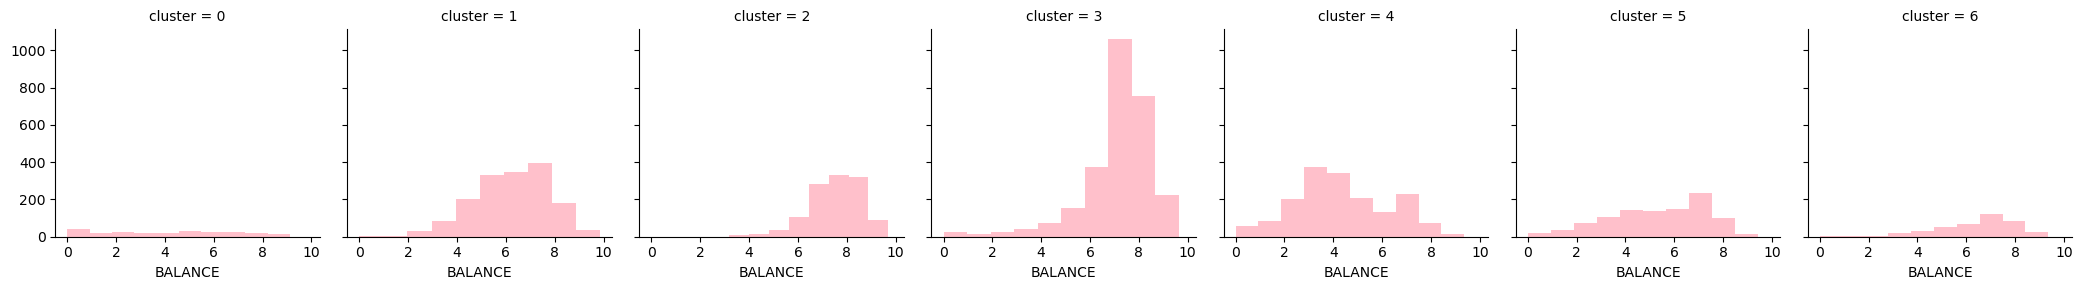

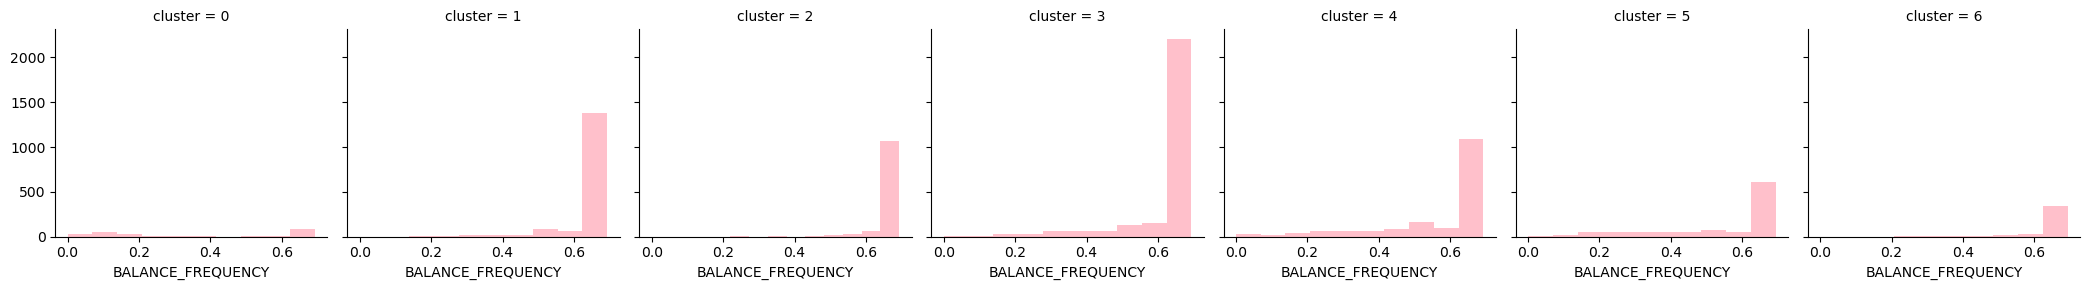

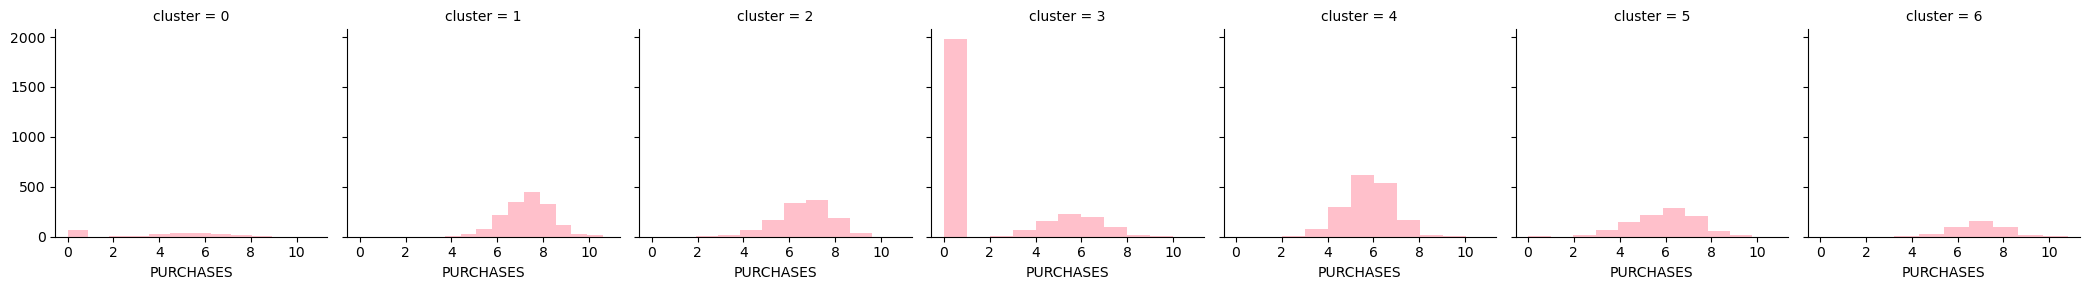

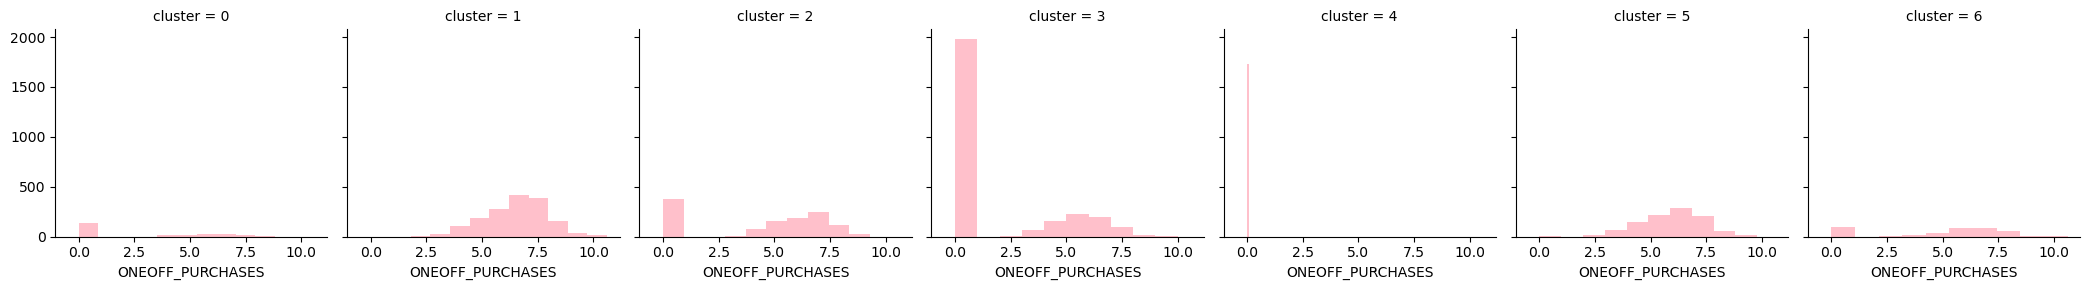

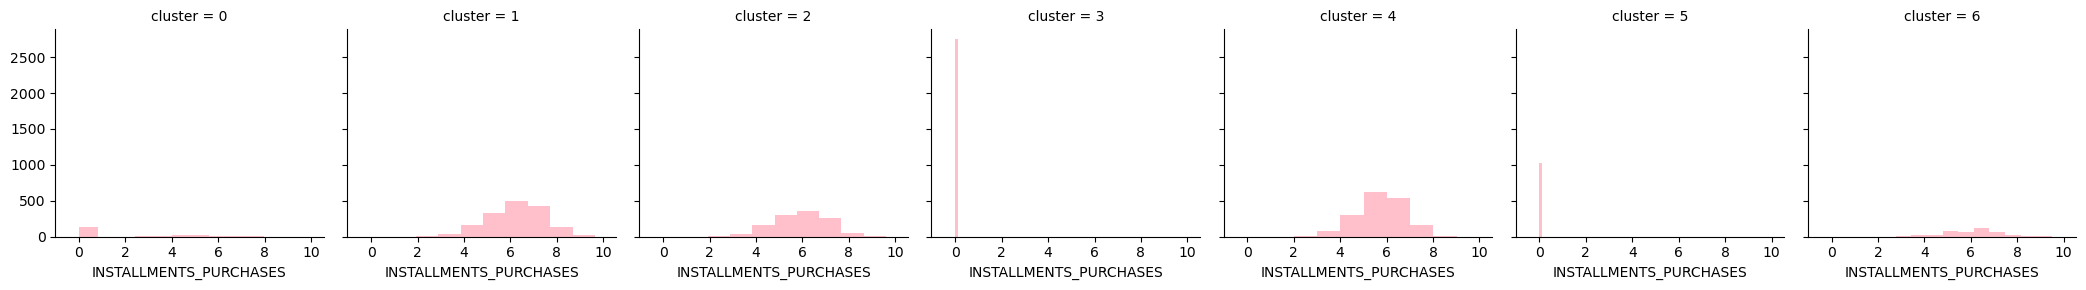

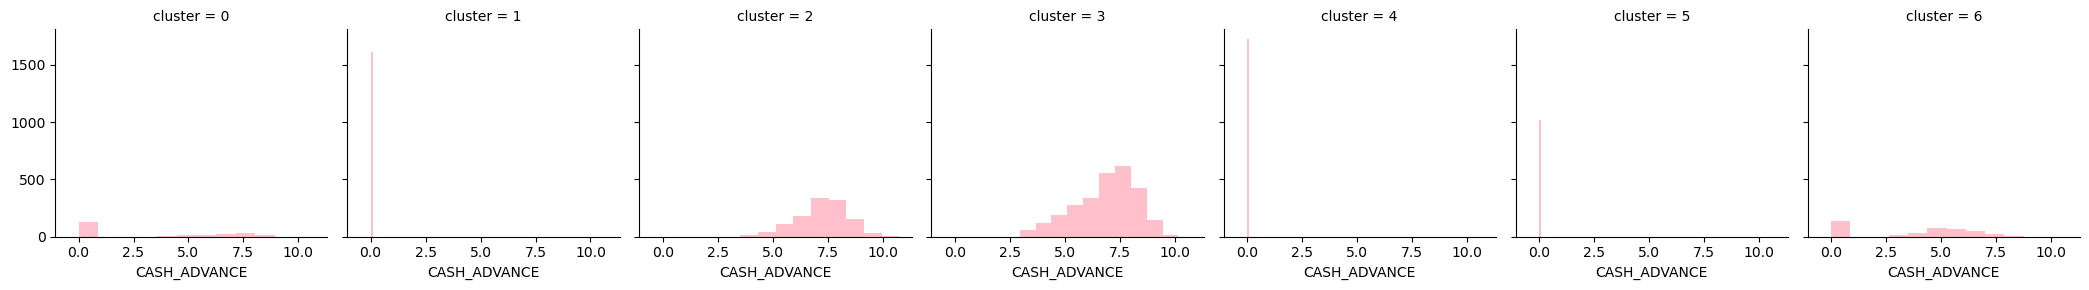

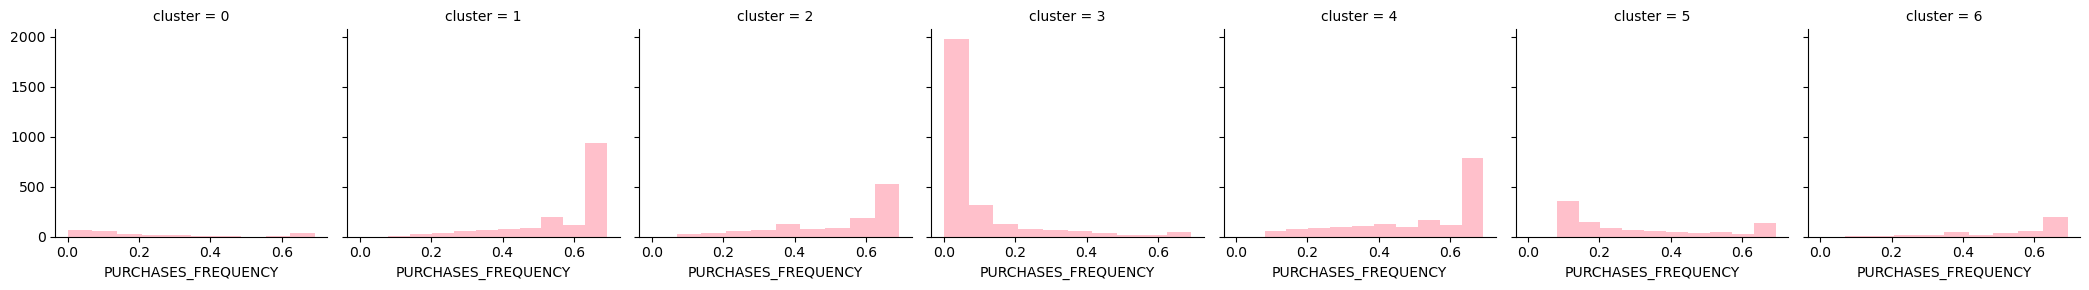

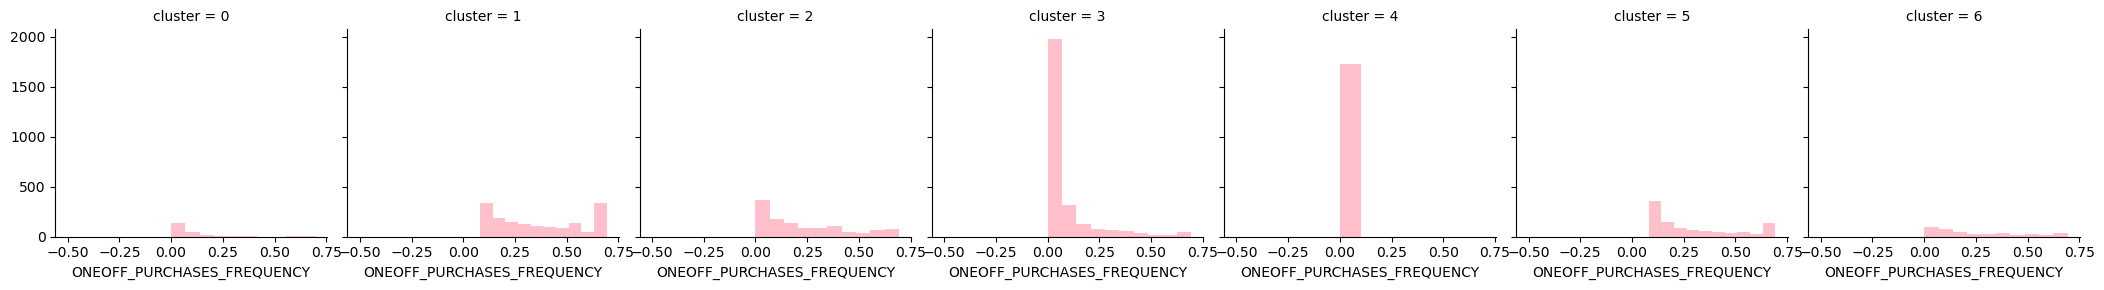

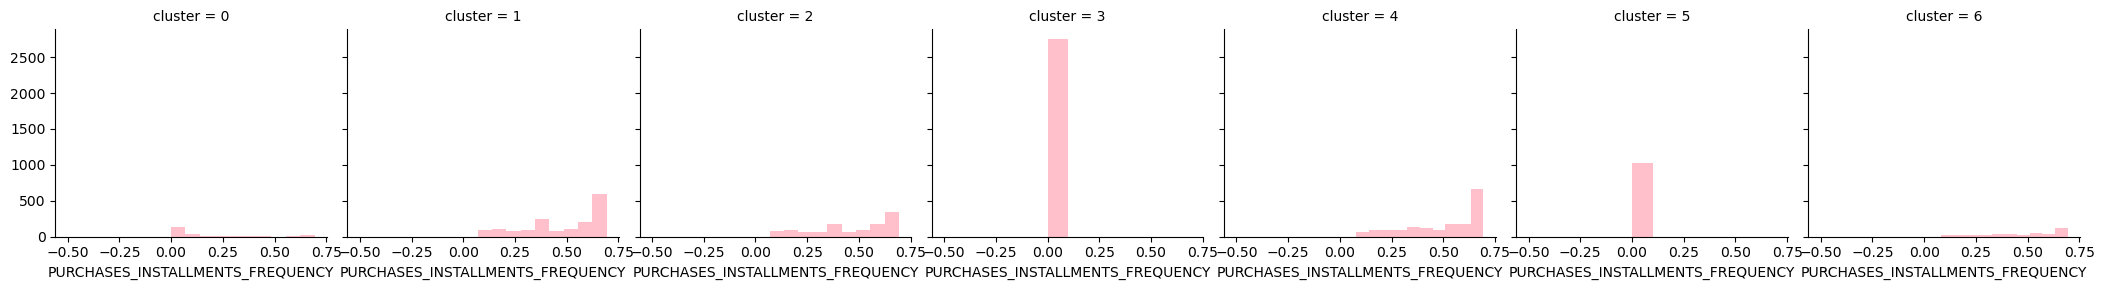

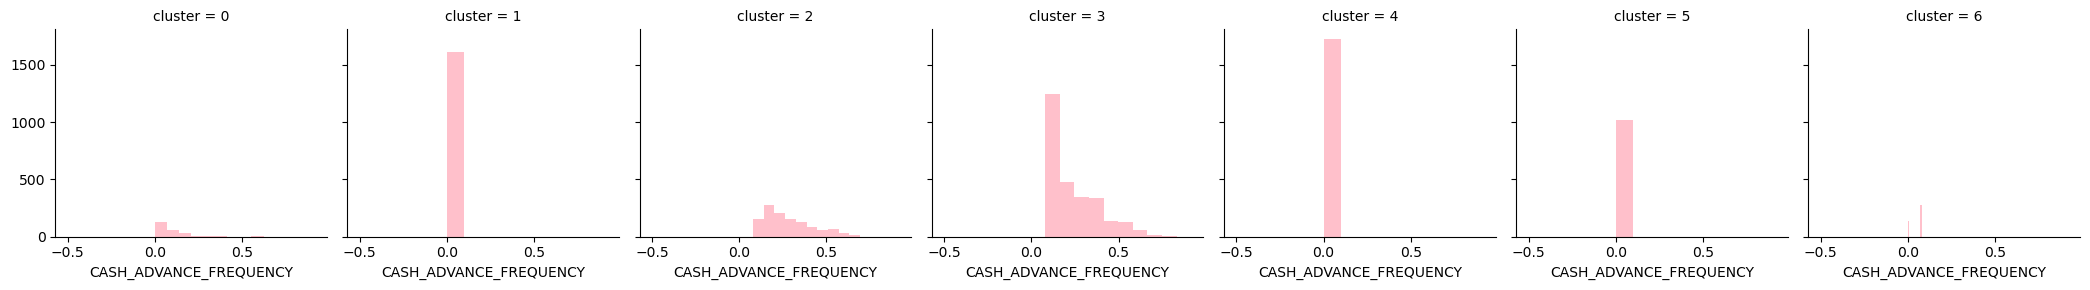

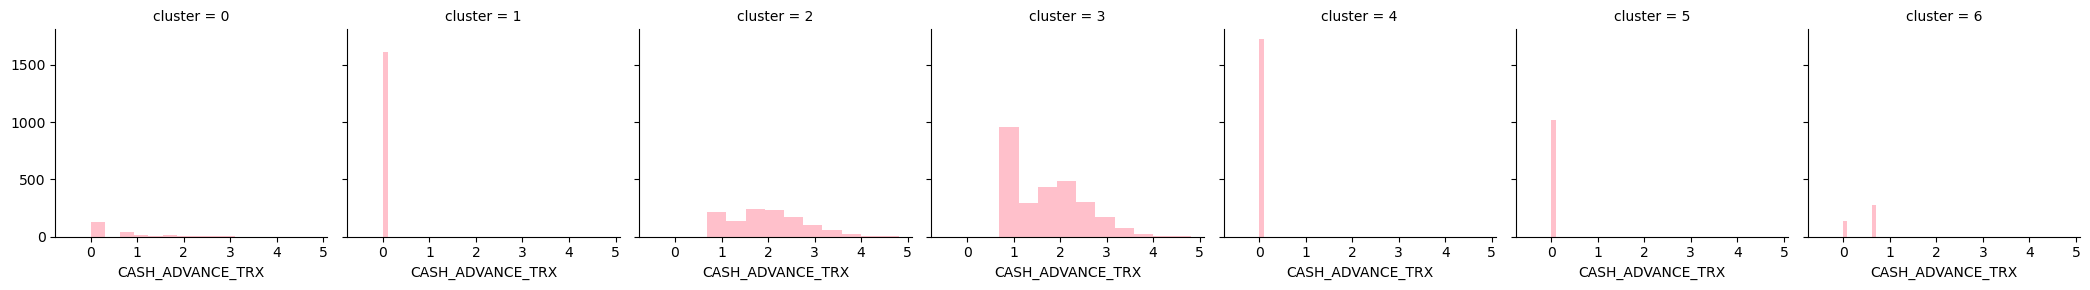

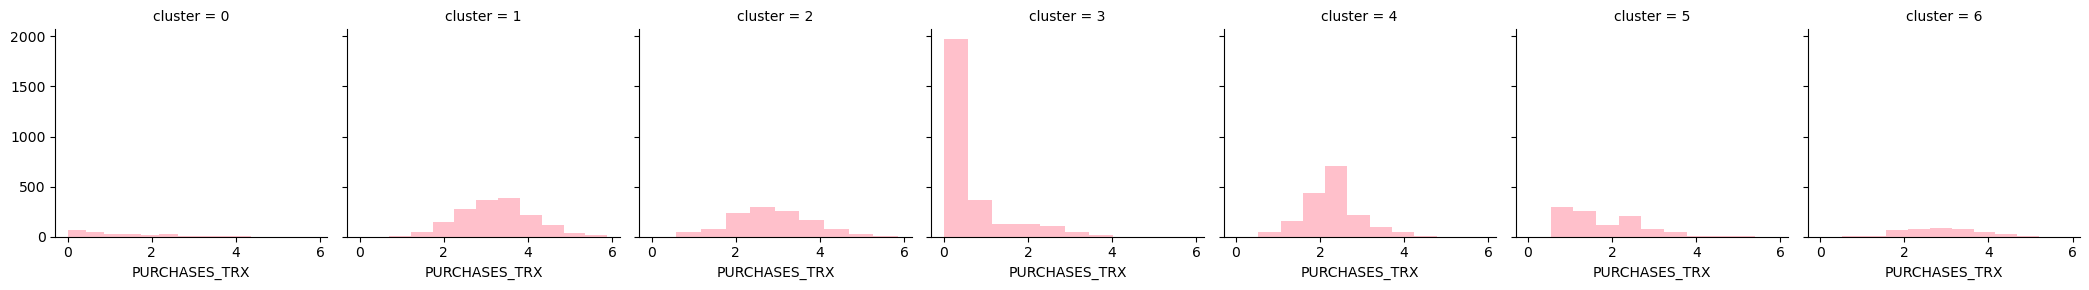

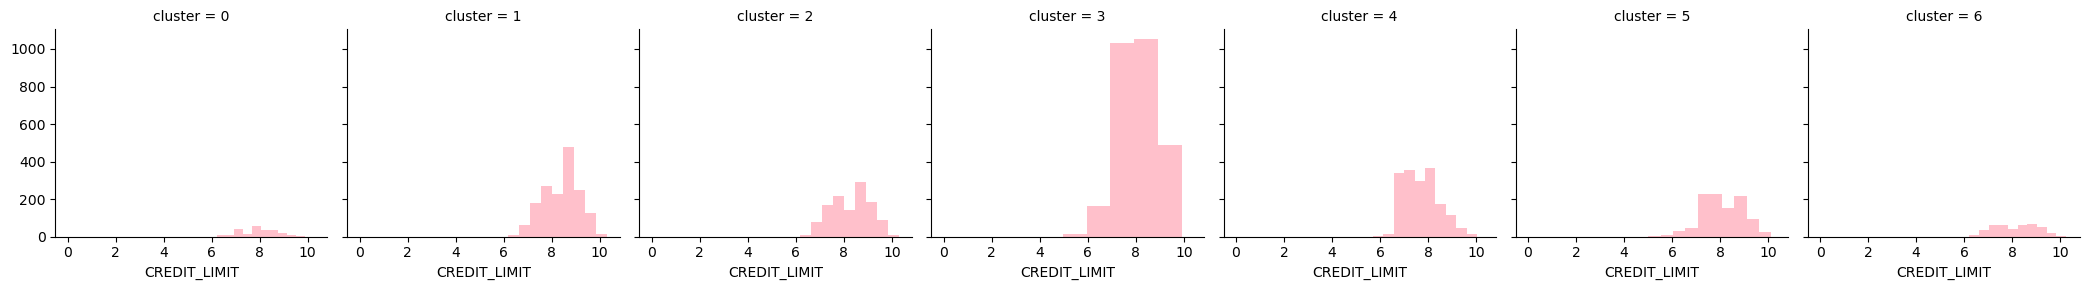

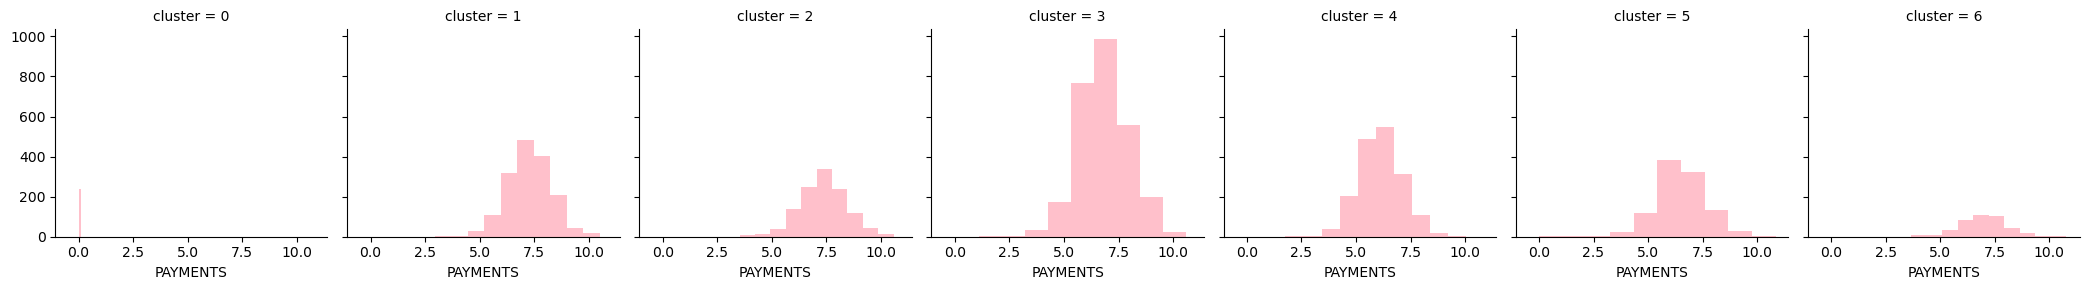

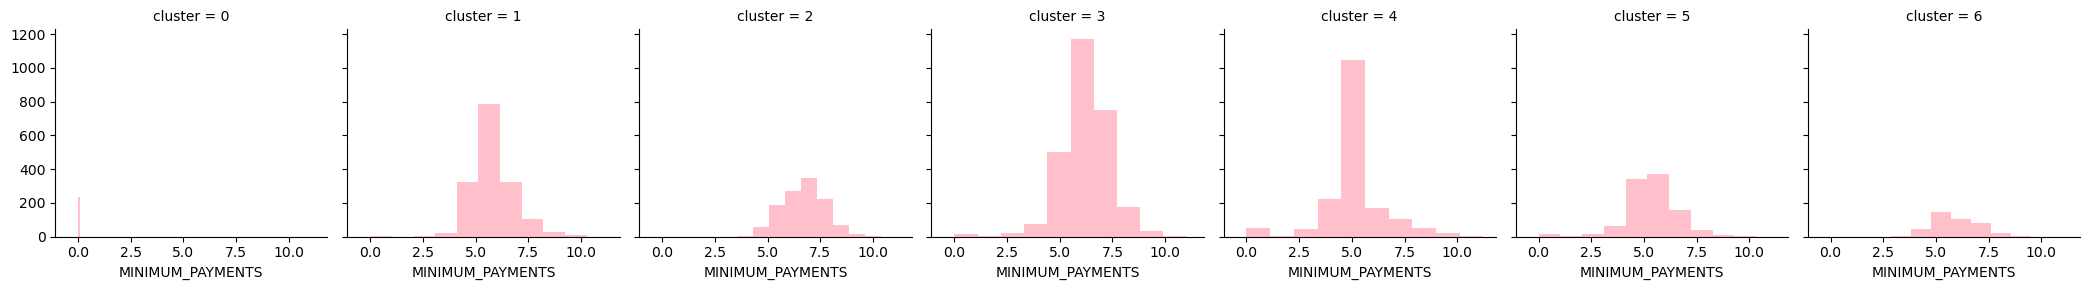

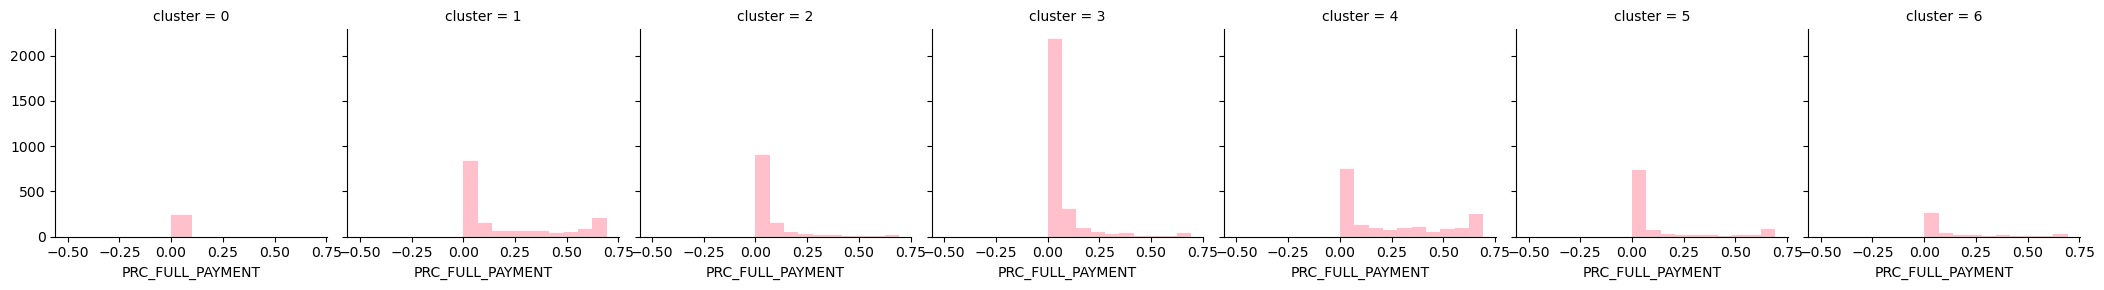

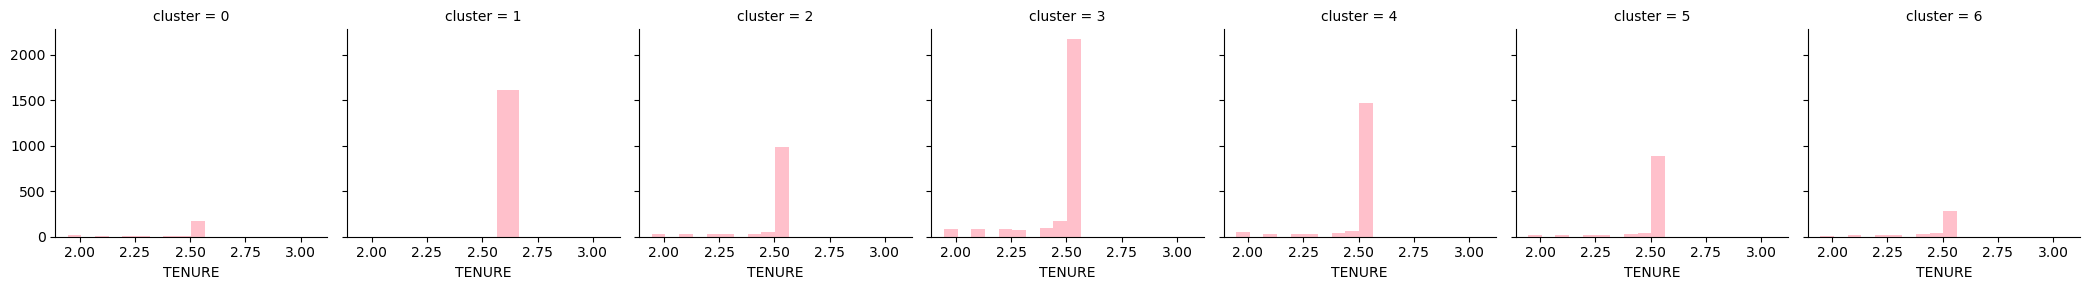

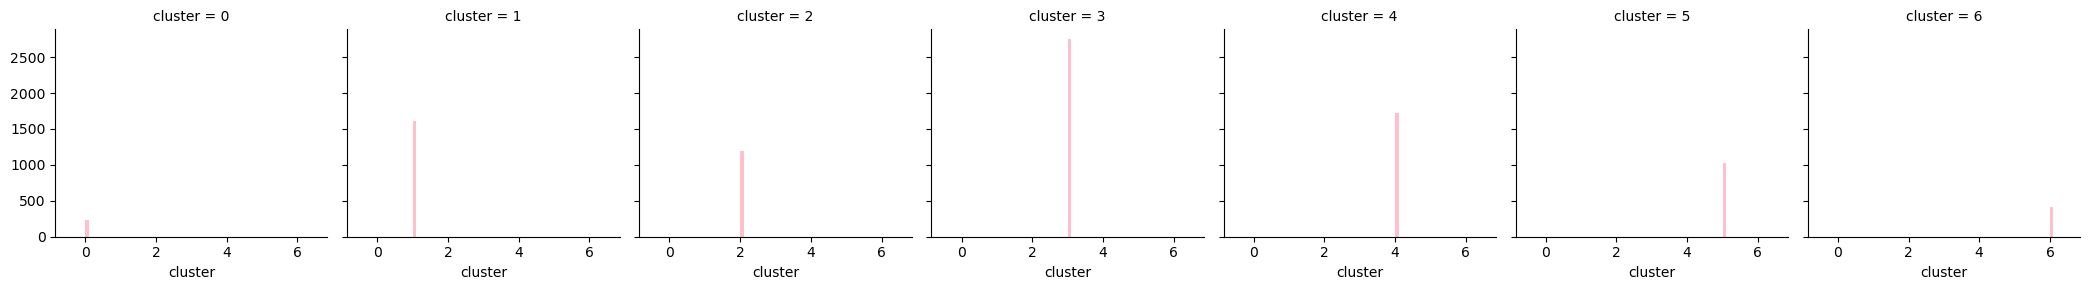

In [192]:
for c in cluster_:
    grid=sns.FacetGrid(cluster_,col='cluster')
    grid.map(plt.hist,c,color='pink')

cluster means:
 [[ 4.12361801e+00  3.43196432e-01  3.90171553e+00  2.44425575e+00
   2.05282941e+00  3.07394056e+00  2.19799698e-01  1.01849434e-01
   1.39044076e-01  7.39551644e-02  6.24134384e-01  1.20646228e+00
   8.00560850e+00  8.88178420e-16  1.77635684e-15  0.00000000e+00
   2.46542837e+00]
 [ 6.21341291e+00  6.59691582e-01  7.30936707e+00  6.51068080e+00
   6.23124449e+00 -1.33226763e-15  5.87262945e-01  3.57859349e-01
   4.83204840e-01 -5.55111512e-17 -6.66133815e-16  3.23809967e+00
   8.41386351e+00  7.26438242e+00  5.75305916e+00  1.93760535e-01
   2.56494936e+00]
 [ 7.53384344e+00  6.74776465e-01  6.62042335e+00  4.31046522e+00
   5.90456004e+00  7.22467250e+00  5.35891204e-01  2.12031646e-01
   4.58063287e-01  2.72903810e-01  1.97311978e+00  2.81689769e+00
   8.30305029e+00  7.36649056e+00  6.67395972e+00  4.60918918e-02
   2.51055616e+00]
 [ 7.11057392e+00  6.40243991e-01  1.59275395e+00  1.59275395e+00
  -7.10542736e-15  6.85621014e+00  6.45971296e-02  6.45971296e-02
   

Text(31.67467503561253, 0.5, 'PURCHASES_TRX')

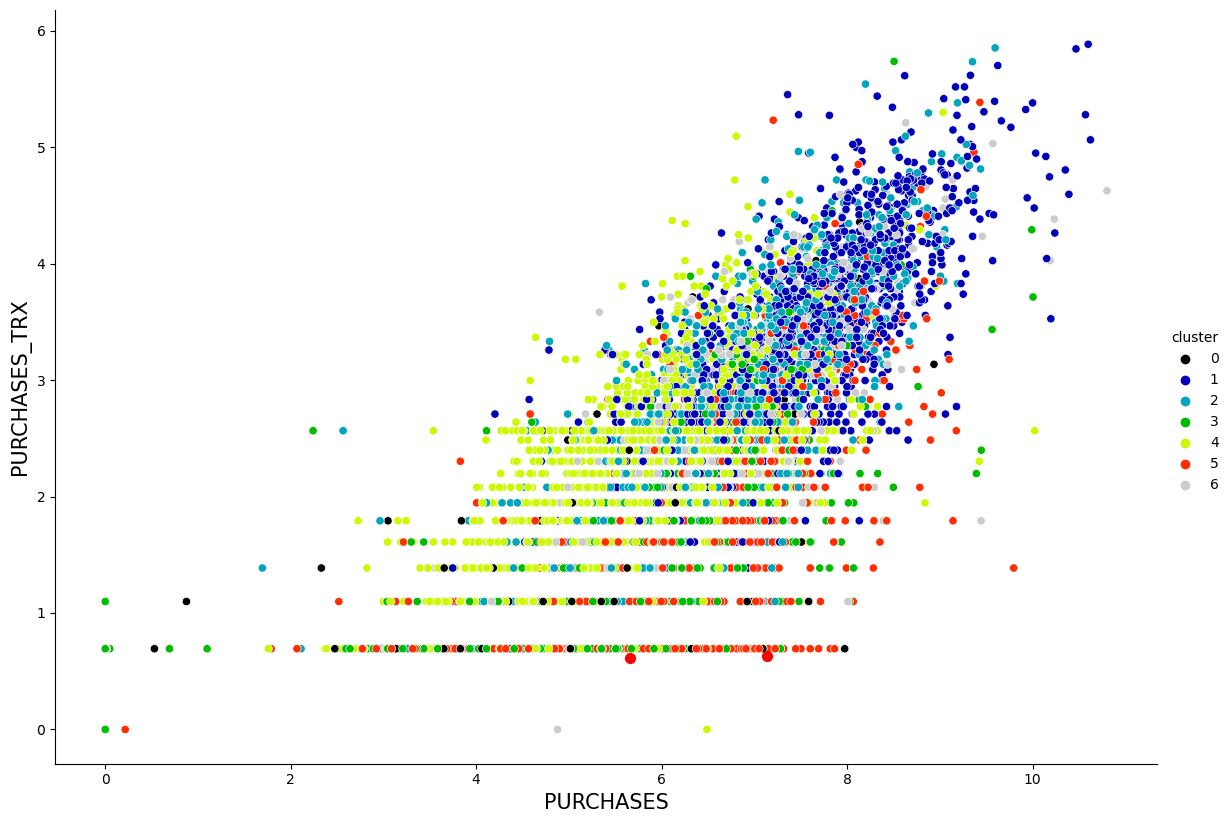

In [193]:
cluster_means = gmm.means_#for gaussian, we don't have centers,we have mean
cluster_means = Scaler.inverse_transform(cluster_means)
print("cluster means:\n",cluster_means)

sns.relplot(data =cluster_,x='PURCHASES' , y  ='PURCHASES_TRX', hue='cluster', palette='nipy_spectral',kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)

cluster means:
 [[ 4.09978675e+00  3.44256614e-01  3.89999489e+00  2.45193705e+00
   2.03958680e+00  3.03994535e+00  2.19322670e-01  1.02133291e-01
   1.38147116e-01  7.28849642e-02  6.17441142e-01  1.20591259e+00
   8.01553042e+00  8.88178420e-16 -8.88178420e-16 -5.55111512e-17
   2.46764443e+00]
 [ 6.36383263e+00  6.78840290e-01  7.36369690e+00  6.59150286e+00
   6.28942373e+00 -7.54951657e-15  6.02896613e-01  3.73713113e-01
   4.96768668e-01 -2.63677968e-16 -1.99840144e-15  3.30017987e+00
   8.43741661e+00  7.31045793e+00  5.81452203e+00  1.94568258e-01
   2.56494936e+00]
 [ 7.06665213e+00  6.34442929e-01  2.39808173e-14  1.46549439e-14
   1.50990331e-14  6.85841687e+00  1.49880108e-15  6.66133815e-16
   1.33226763e-15  2.32806680e-01  1.66245749e+00  9.54791801e-15
   7.98652270e+00  6.75763724e+00  6.19294288e+00  3.79124500e-02
   2.50372824e+00]
 [ 7.52186269e+00  6.89594449e-01  5.78305831e+00  3.10862447e-15
   5.78305831e+00  6.86094437e+00  4.76965895e-01  1.38777878e-16
   

Text(32.12126958689458, 0.5, 'PURCHASES_TRX')

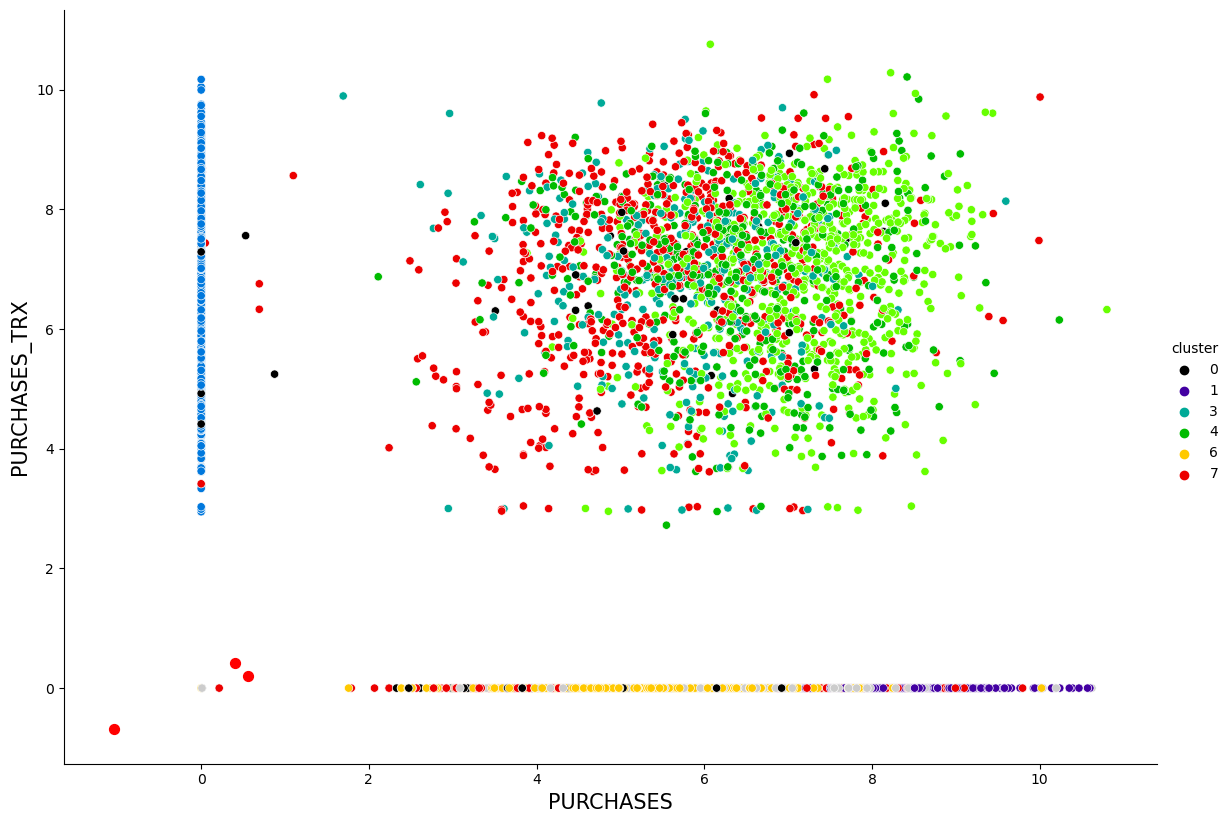

In [273]:
cluster_means = gmm.means_#for gaussian, we don't have centers,we have mean
cluster_means = Scaler.inverse_transform(cluster_means)
print("cluster means:\n",cluster_means)

sns.relplot(data =cluster_,x='PURCHASES' , y  ='CASH_ADVANCE', hue='cluster', palette='nipy_spectral',kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)

In [194]:
# Calculate clustering metrics

gmm = GaussianMixture(n_components=7, random_state=1 )
gmm.fit(Scaled_features)
silhouette = silhouette_score(Scaled_features, gmm.predict(Scaled_features))
ch_index = calinski_harabasz_score(Scaled_features,labels)


# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")


Silhouette Score: 0.18
Calinski-Harabasz Index: 1447.28


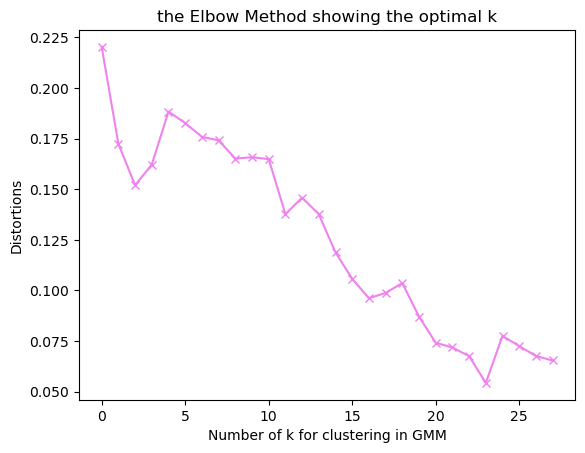

In [195]:
###GaussianMixture
sil_gmm = []
for k in range(2,30):#this range is optional
    gmm = GaussianMixture(n_components=k, random_state=1 )#each gaussian in your mixture is one component 
    gmm.fit(Scaled_features)
    score = silhouette_score(Scaled_features, gmm.predict(Scaled_features),metric='euclidean',random_state=5)
    sil_gmm.append(score)
plt.plot(sil_gmm,'bx-',color='violet')
plt.xlabel('Number of k for clustering in GMM')
plt.ylabel('Distortions')
plt.title('the Elbow Method showing the optimal k')
plt.show()

In [196]:
print (score)

0.0653536857687594


In [197]:
K5=KneeLocator(range (2,30),sil_gmm,curve="convex",direction="decreasing")
K5.elbow

4

In [198]:
print(sil_gmm)
max(sil_gmm)

[0.22034147274459662, 0.1724026520775398, 0.15195368660706524, 0.16219446680504143, 0.18838623766875948, 0.18270383209869026, 0.17588587030344494, 0.17417242863311094, 0.1651498804412232, 0.16582086404066532, 0.16488762336289603, 0.13769231417203895, 0.14585221032941395, 0.137622292676244, 0.11876404426024786, 0.10573202012483617, 0.09612655061639085, 0.09875578928260659, 0.10361250225047183, 0.08703474960875855, 0.07412113238308925, 0.07178660585505152, 0.06749457172208691, 0.05426641561630777, 0.07751332381148837, 0.07246091283867605, 0.06758560838726083, 0.0653536857687594]


0.22034147274459662

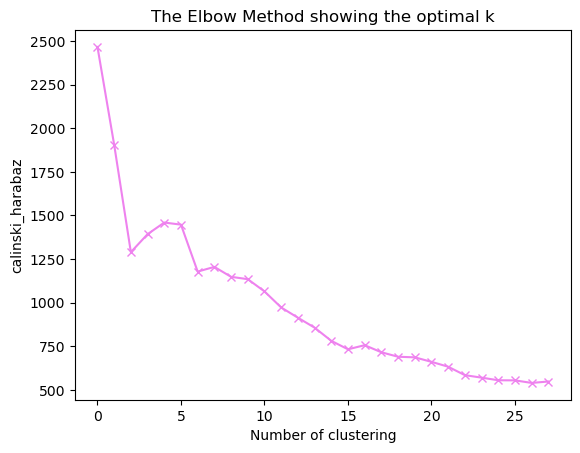

In [199]:
calinski_harabaz = []
for k in range (2,30):
    gmm = GaussianMixture(n_components=k, random_state=1 )#each gaussian in your mixture is one component
    gmm.fit(Scaled_features)
    metrics.calinski_harabasz_score(Scaled_features, gmm.predict(Scaled_features))
    calinski_harabaz.append(metrics.calinski_harabasz_score(Scaled_features, gmm.predict(Scaled_features)))
plt.plot(calinski_harabaz,'bx-',color='violet')
plt.xlabel('Number of clustering')
plt.ylabel('calinski_harabaz')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [206]:
K6=KneeLocator(range (2,30),calinski_harabaz,curve="convex",direction="decreasing")
K6.elbow

4

In [207]:
print (calinski_harabaz)
max(calinski_harabaz)

[2465.586253964898, 1905.118164606153, 1289.6283107006675, 1392.4942838715378, 1459.1558446952456, 1447.2835963461182, 1178.1343106788788, 1205.1082502180097, 1148.2016853171406, 1134.6261299480507, 1064.66397490353, 972.5828309945434, 913.9859134964321, 856.9237995144912, 781.3930471058461, 732.8389055467509, 756.3969142659397, 715.7872629951123, 690.1660060051022, 686.7796026074069, 660.9870406636907, 632.9993160663012, 584.6662567706508, 570.4503271614574, 555.4163382176221, 554.8203821329088, 540.1949352142551, 548.3157202336988]


2465.586253964898

In [208]:
gmm = GaussianMixture(n_components=4, random_state=1 )
gmm.fit(Scaled_features)
labels = gmm.predict(Scaled_features)
cluster_means = pd.DataFrame(data = gmm.means_, columns = [Df.columns])
cluster_means


BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.137075         -0.418060  0.482993         0.124608   
1 -0.446527         -0.018579  0.556019         0.009924   
2  0.768340          0.492710  0.621474         0.380165   
3  0.200546         -0.068996 -0.725282        -0.129403   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0               0.751968     0.663728            0.512025   
1               0.854828    -0.930733            0.694382   
2               0.851727     1.009008            0.649523   
3              -1.087454     0.466286           -0.859544   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.092758                         0.540253   
1                   0.083194                         0.781880   
2                   0.288325                         0.712732   
3                  -0.165162                        -0.958256   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.509647         0.564802      0.440000    -0.075318   
1              -0.724360        -0.810069      0.628107    -0.022512   
2               0.792654         0.926922      0.739904     0.335753   
3               0.361696         0.393902     -0.816910    -0.063856   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.622380        -0.586584        -0.086079 -0.779583  
1  0.026031        -0.176234         0.469381  0.101617  
2  0.508567         0.687444        -0.431206  0.347262  
3 -0.088077         0.037696        -0.287042 -0.091333

In [209]:
cluster_=pd.concat([Df,pd.DataFrame({'cluster':labels})],axis=1)
cluster_

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3.735304           0.597837   4.568506          0.000000   
1     8.071989           0.646627   0.000000          0.000000   
2     7.822504           0.693147   6.651791          6.651791   
3     7.419183           0.492477   7.313220          7.313220   
4     6.707735           0.693147   2.833213          2.833213   
...        ...                ...        ...               ...   
8945  3.384170           0.693147   5.677165          0.000000   
8946  3.004851           0.693147   5.707110          0.000000   
8947  3.194529           0.606136   4.979489          0.000000   
8948  2.671218           0.606136   0.000000          0.000000   
8949  5.923475           0.510826   6.997824          6.997824   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   4.568506      0.000000             0.154151   
1                   0.000000      8.770896             0.000000   
2                   0.000000      0.000000             0.693147   
3                   0.000000      5.331694             0.080042   
4                   0.000000      0.000000             0.080042   
...                      ...           ...                  ...   
8945                5.677165      0.000000             0.693147   
8946                5.707110      0.000000             0.693147   
8947                4.979489      0.000000             0.606136   
8948                0.000000      3.625907             0.000000   
8949                0.000000      4.852343             0.510826   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.080042   
1                       0.000000                          0.000000   
2                       0.693147                          0.000000   
3                       0.080042                          0.000000   
4                       0.080042                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.606136   
8946                    0.000000                          0.606136   
8947                    0.000000                          0.510826   
8948                    0.000000                          0.000000   
8949                    0.510826                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000          0.000000       1.098612      6.908755   
1                   0.223144          1.609438       0.000000      8.853808   
2                   0.000000          0.000000       2.564949      8.922792   
3                   0.080042          0.693147       0.693147      8.922792   
4                   0.000000          0.000000       0.693147      7.090910   
...                      ...               ...            ...           ...   
8945                0.000000          0.000000       1.945910      6.908755   
8946                0.000000          0.000000       1.945910      6.908755   
8947                0.000000          0.000000       1.791759      6.908755   
8948                0.154151          1.098612       0.000000      6.216606   
8949                0.287682          1.098612       3.178054      7.090910   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  cluster  
0     5.312231          4.945277          0.000000  2.564949        1  
1     8.319725          6.978531          0.200671  2.564949        3  
2     6.434654          6.442994          0.000000  2.564949        3  
3     0.000000          0.000000          0.000000  2.564949        3  
4     6.521114          5.504483          0.000000  2.564949        3  
...        ...               ...               ...       ...      ...  
8945  5.788719          3.909748          0.405465  1.945910        1  
8946  5.623517          0.000000          0

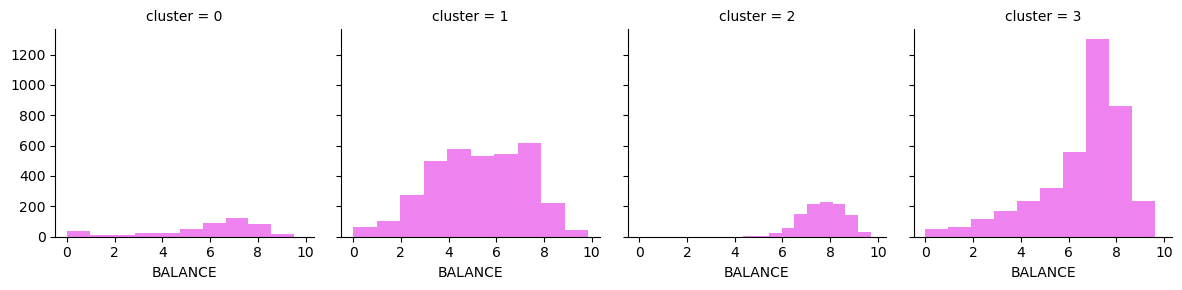

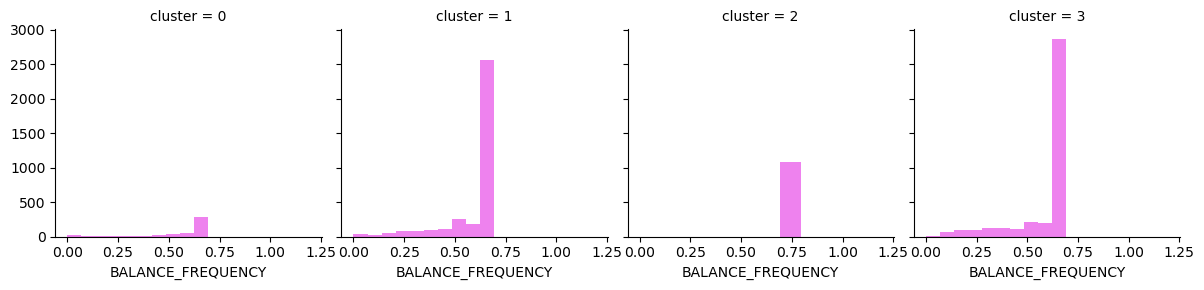

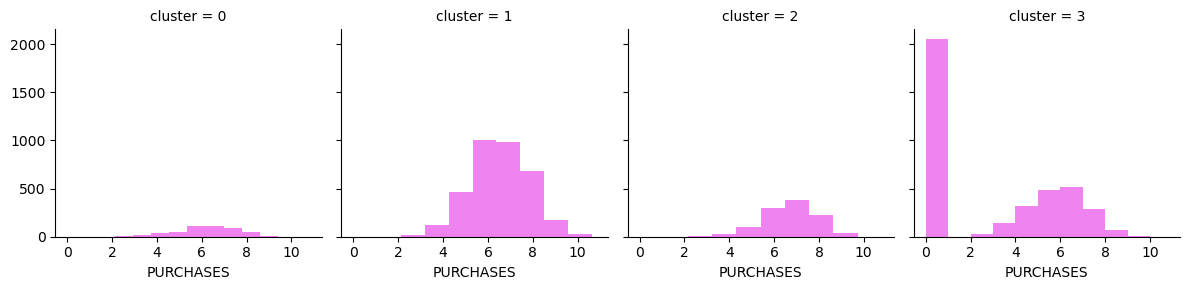

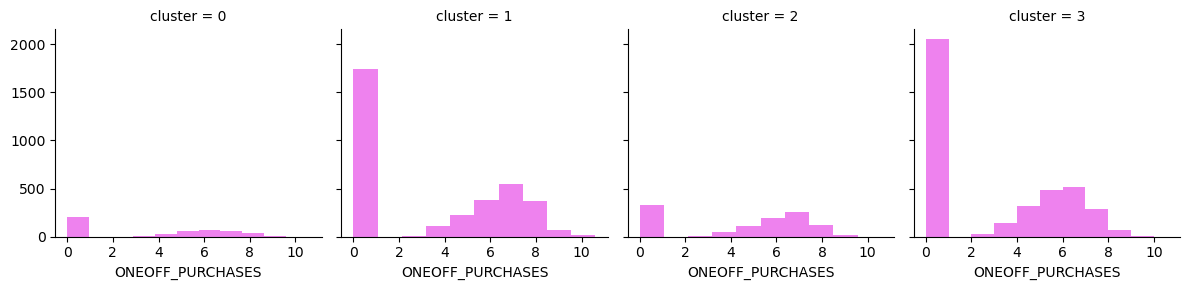

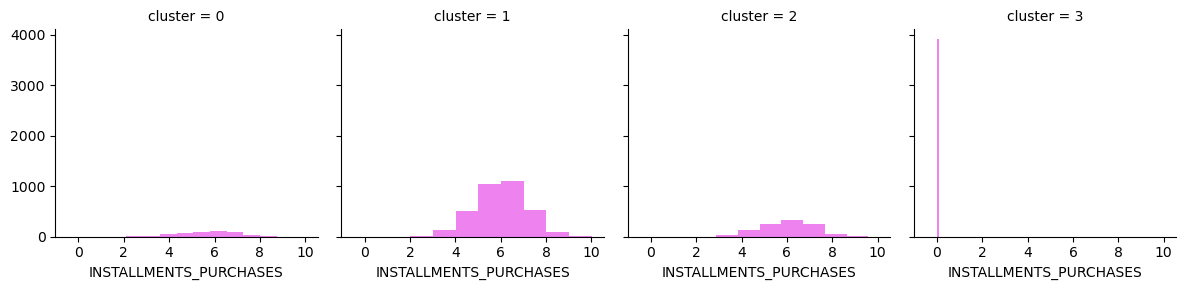

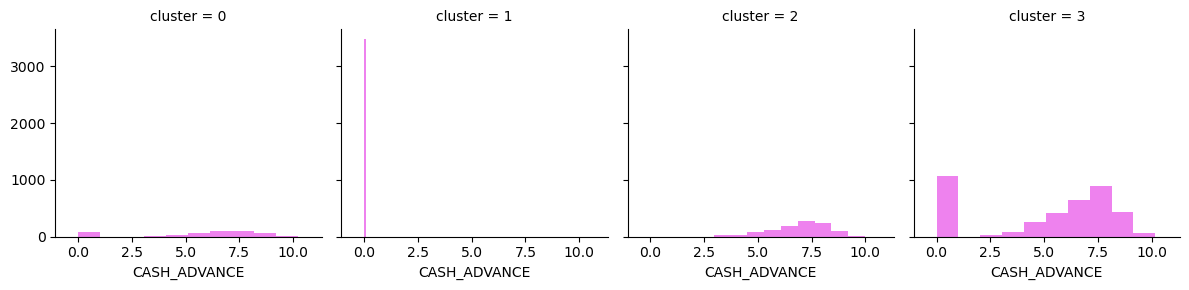

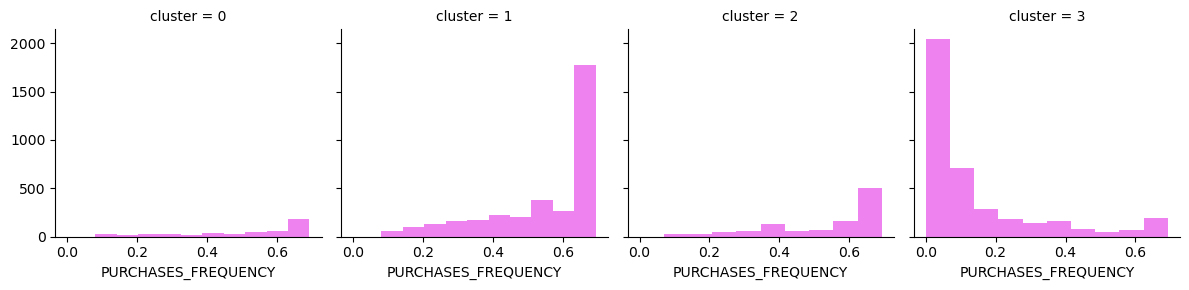

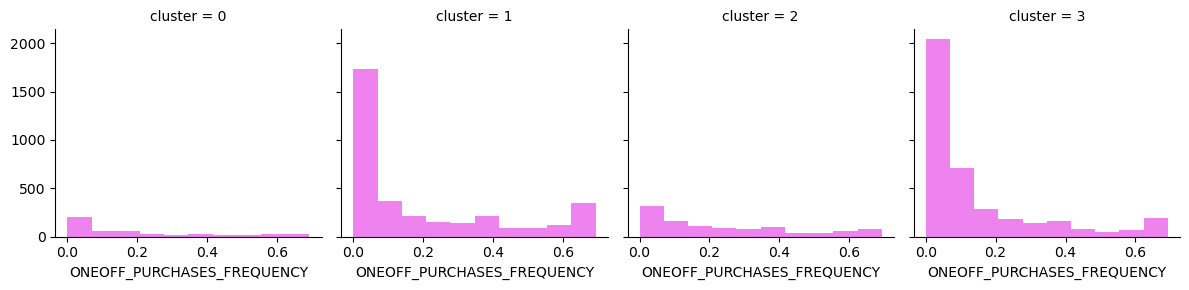

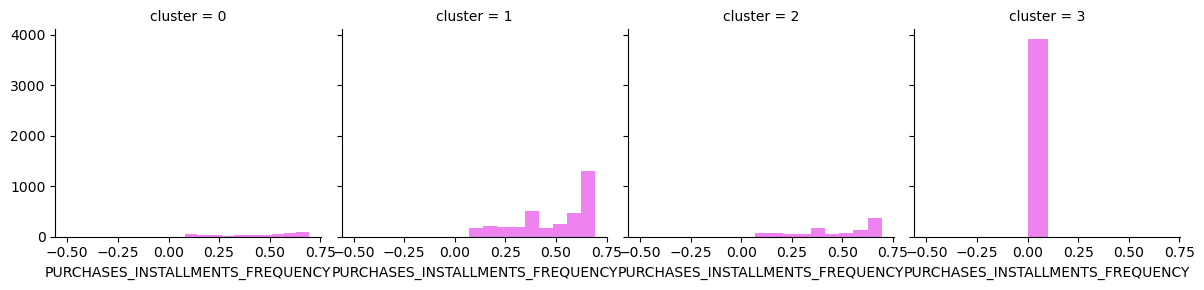

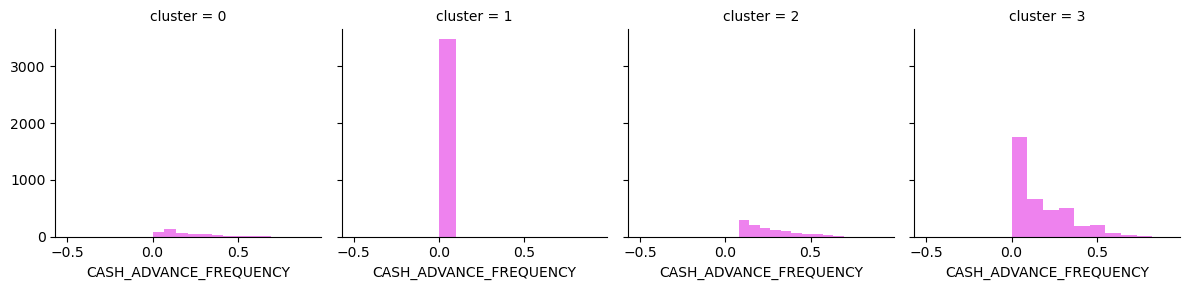

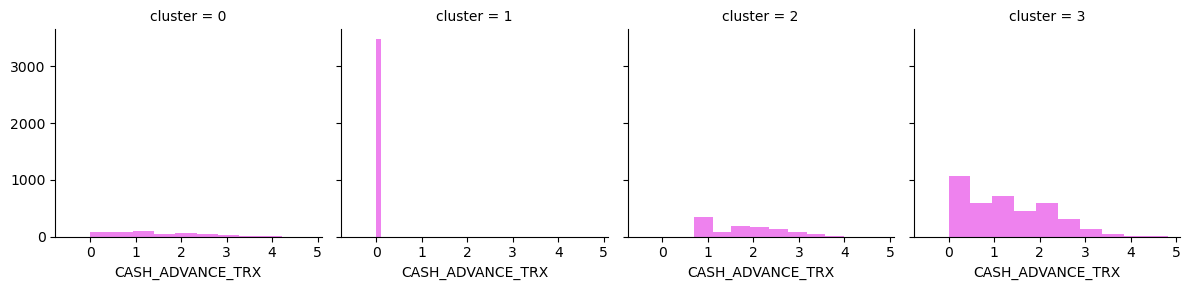

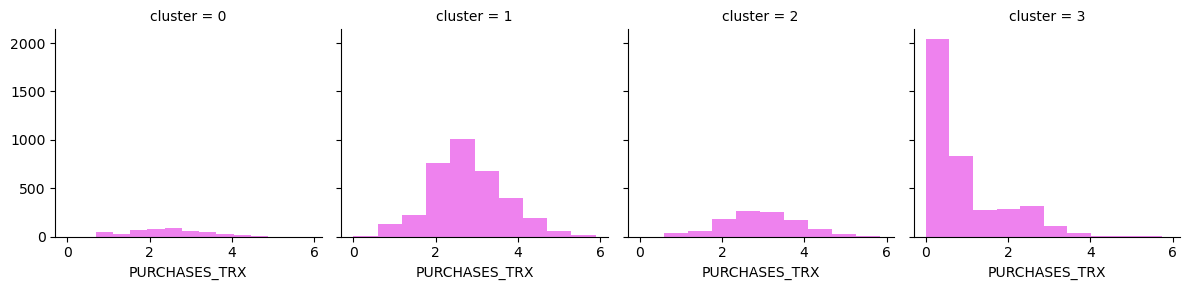

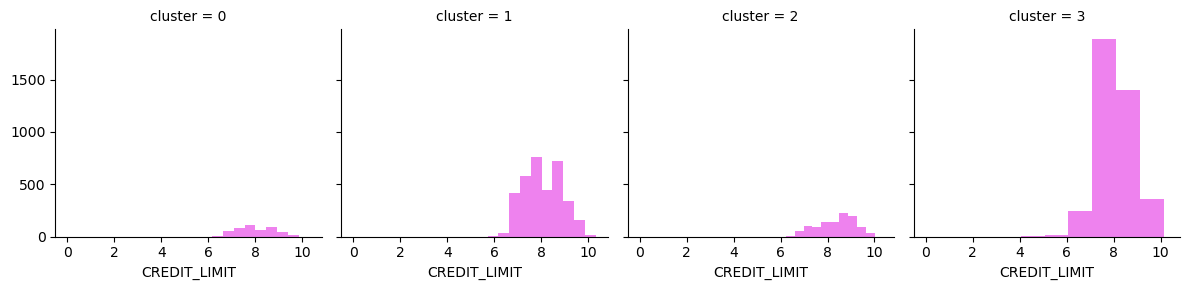

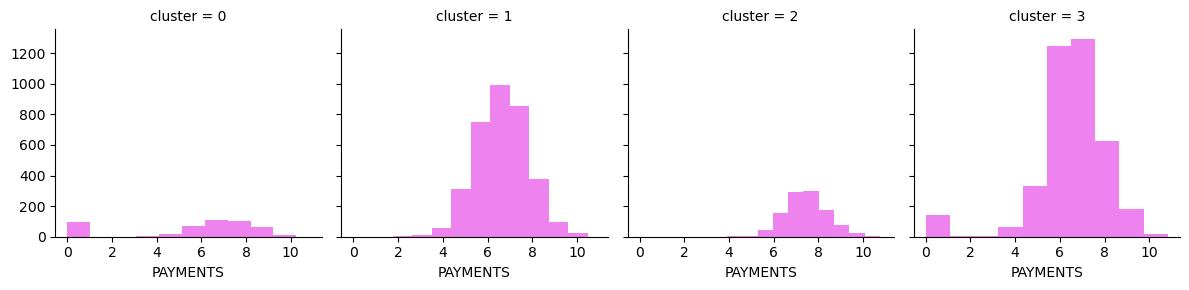

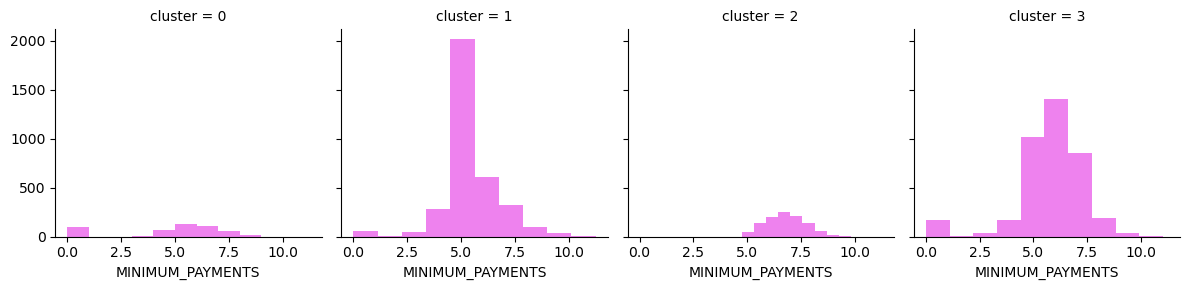

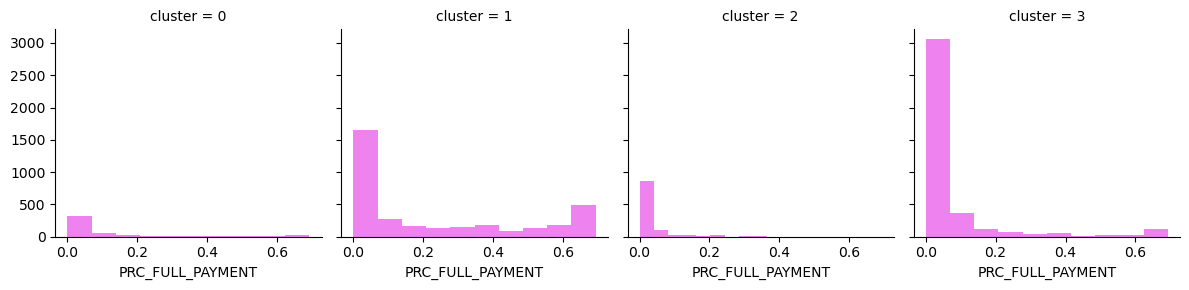

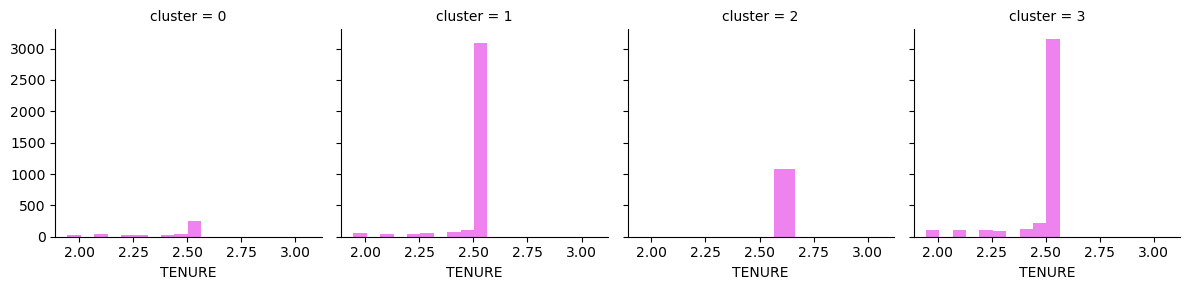

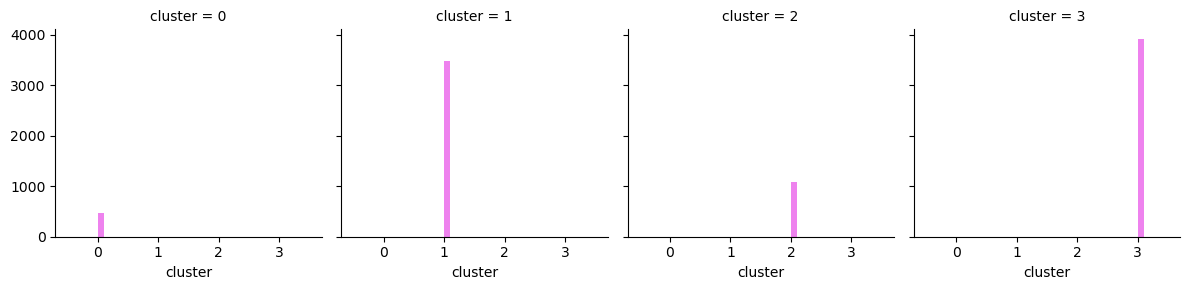

In [210]:
for c in cluster_:
    grid=sns.FacetGrid(cluster_,col='cluster')
    grid.map(plt.hist,c,color='violet')

cluster means:
 [[5.88567951e+00 5.57823716e-01 6.30839664e+00 3.60877429e+00
  5.67057125e+00 5.68600516e+00 5.03252643e-01 1.78795996e-01
  4.22334538e-01 1.93377709e-01 1.38760176e+00 2.49919334e+00
  8.03186575e+00 5.63391455e+00 4.77816269e+00 9.95154112e-02
  2.41805379e+00]
 [5.26269438e+00 6.17179190e-01 6.52139277e+00 3.23648983e+00
  5.98766712e+00 9.32587341e-15 5.53820521e-01 1.76723750e-01
  4.90433662e-01 4.16333634e-16 2.22044605e-15 2.75761152e+00
  8.07537938e+00 6.66597357e+00 5.43359387e+00 2.17053715e-01
  2.53292702e+00]
 [7.70845246e+00 6.93147181e-01 6.71230502e+00 4.43836096e+00
  5.97810866e+00 6.91730697e+00 5.41380908e-01 2.21167477e-01
  4.70945440e-01 2.37727062e-01 1.75307534e+00 2.91119630e+00
  8.37060305e+00 7.43401343e+00 6.81310356e+00 2.64848812e-02
  2.56494936e+00]
 [6.56537545e+00 6.09688137e-01 2.78420917e+00 2.78420917e+00
  7.99360578e-15 4.98190723e+00 1.22914981e-01 1.22914981e-01
  9.43689571e-16 1.70192736e-01 1.21511952e+00 7.72476264e-01


Text(31.67467503561253, 0.5, 'PURCHASES_TRX')

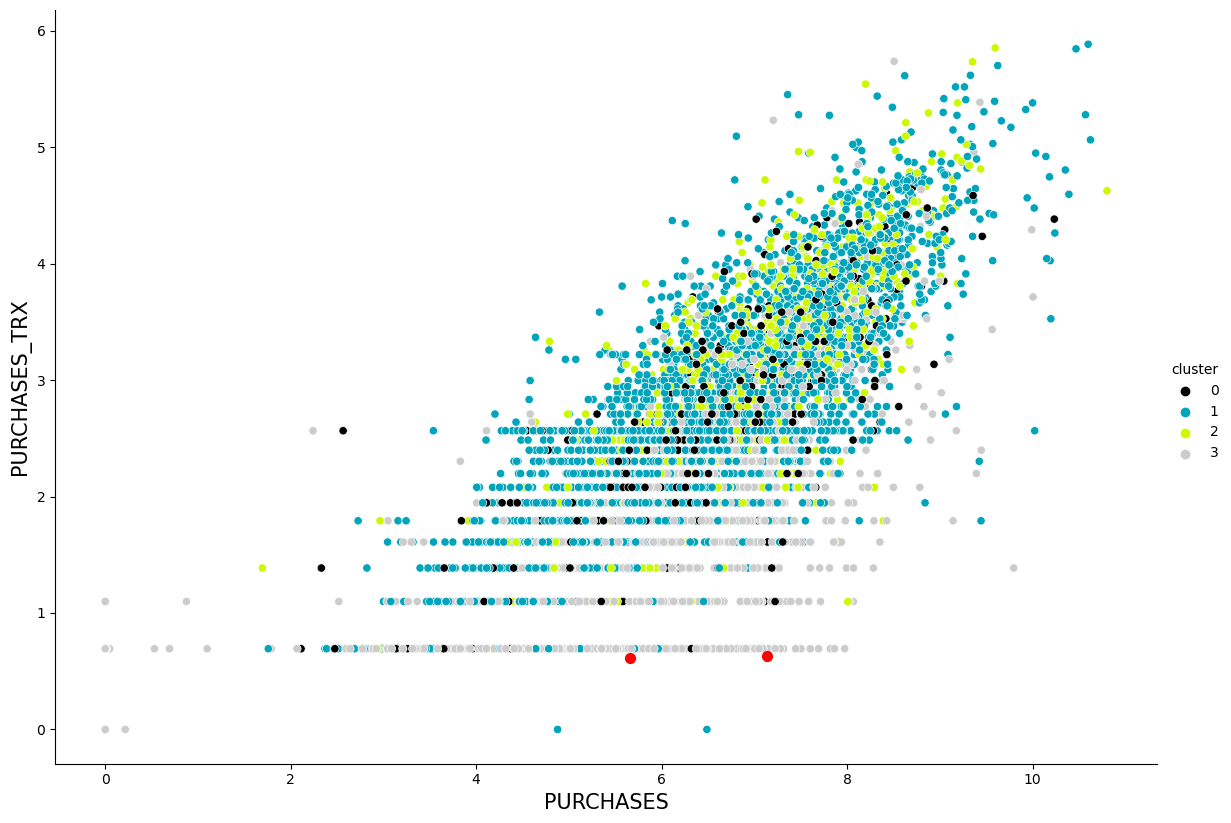

In [205]:
cluster_means = gmm.means_#for gaussian, we don't have centers,we have mean
cluster_means = Scaler.inverse_transform(cluster_means)
print("cluster means:\n",cluster_means)

sns.relplot(data =cluster_,x='PURCHASES' , y  ='PURCHASES_TRX', hue='cluster', palette='nipy_spectral',kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)

cluster means:
 [[5.88567951e+00 5.57823716e-01 6.30839664e+00 3.60877429e+00
  5.67057125e+00 5.68600516e+00 5.03252643e-01 1.78795996e-01
  4.22334538e-01 1.93377709e-01 1.38760176e+00 2.49919334e+00
  8.03186575e+00 5.63391455e+00 4.77816269e+00 9.95154112e-02
  2.41805379e+00]
 [5.26269438e+00 6.17179190e-01 6.52139277e+00 3.23648983e+00
  5.98766712e+00 9.32587341e-15 5.53820521e-01 1.76723750e-01
  4.90433662e-01 4.16333634e-16 2.22044605e-15 2.75761152e+00
  8.07537938e+00 6.66597357e+00 5.43359387e+00 2.17053715e-01
  2.53292702e+00]
 [7.70845246e+00 6.93147181e-01 6.71230502e+00 4.43836096e+00
  5.97810866e+00 6.91730697e+00 5.41380908e-01 2.21167477e-01
  4.70945440e-01 2.37727062e-01 1.75307534e+00 2.91119630e+00
  8.37060305e+00 7.43401343e+00 6.81310356e+00 2.64848812e-02
  2.56494936e+00]
 [6.56537545e+00 6.09688137e-01 2.78420917e+00 2.78420917e+00
  7.99360578e-15 4.98190723e+00 1.22914981e-01 1.22914981e-01
  9.43689571e-16 1.70192736e-01 1.21511952e+00 7.72476264e-01


Text(32.12126958689458, 0.5, 'PURCHASES_TRX')

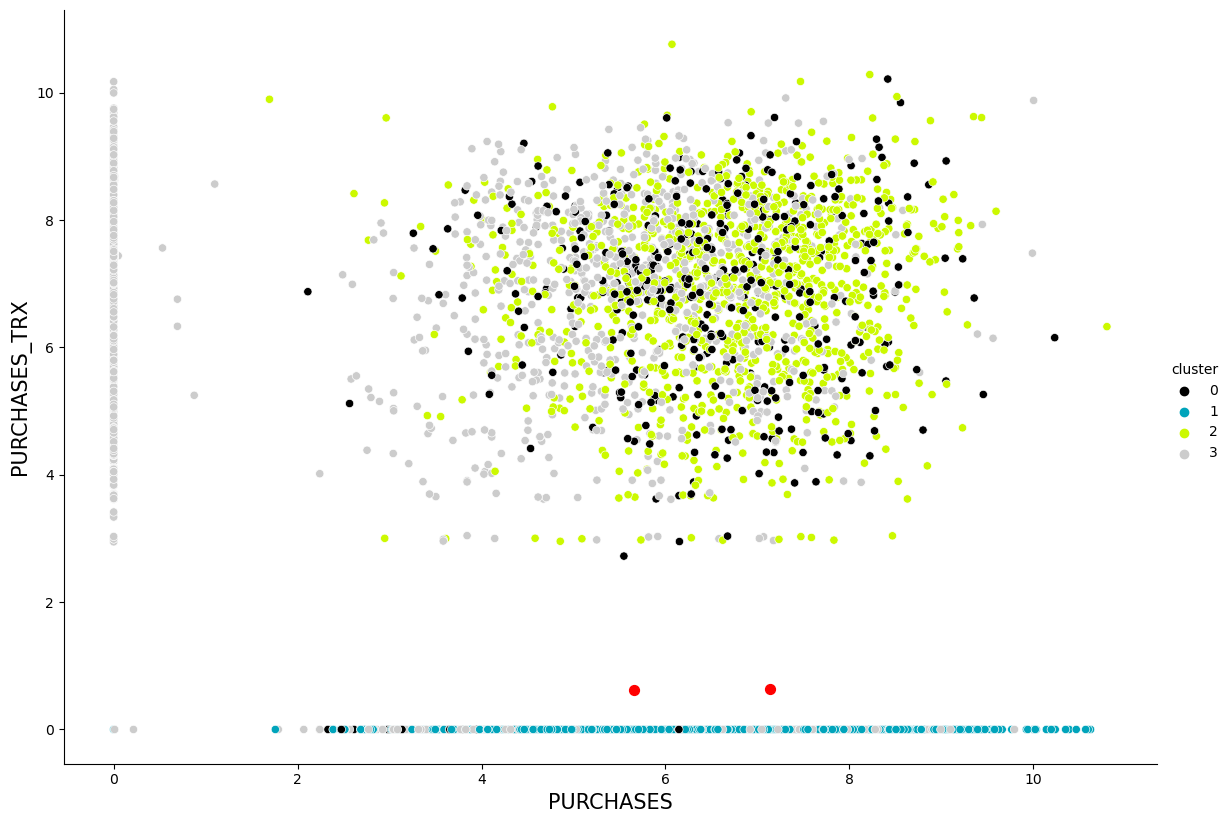

In [211]:
cluster_means = gmm.means_#for gaussian, we don't have centers,we have mean
cluster_means = Scaler.inverse_transform(cluster_means)
print("cluster means:\n",cluster_means)

sns.relplot(data =cluster_,x='PURCHASES' , y  ='CASH_ADVANCE', hue='cluster', palette='nipy_spectral',kind='scatter', height=8.27, aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("PURCHASES",fontsize=15)
plt.ylabel("PURCHASES_TRX",fontsize=15)

In [212]:
# Calculate clustering metrics
gmm = GaussianMixture(n_components=7, random_state=1 )
gmm.fit(Scaled_features)
silhouette = silhouette_score(Scaled_features,gmm.predict(Scaled_features))
ch_index = calinski_harabasz_score(Scaled_features,gmm.predict(Scaled_features))


# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")


Silhouette Score: 0.18
Calinski-Harabasz Index: 1447.28


In [213]:
# Calculate clustering metrics
gmm = GaussianMixture(n_components=4, random_state=1 )
gmm.fit(Scaled_features)
silhouette = silhouette_score(Scaled_features,gmm.predict(Scaled_features))
ch_index = calinski_harabasz_score(Scaled_features,gmm.predict(Scaled_features))


# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")


Silhouette Score: 0.15
Calinski-Harabasz Index: 1289.63


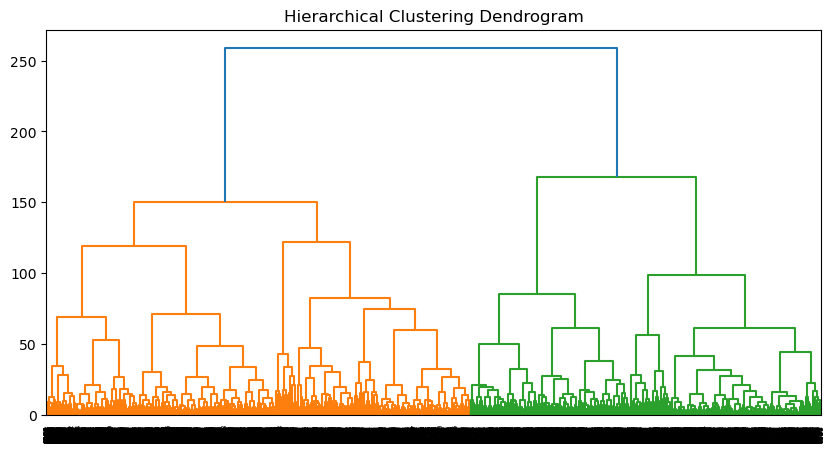

In [214]:
#####hierarichical model
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Generate some sample data

# Perform hierarchical clustering
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(Scaled_features)

# Plot the dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model)
plt.show()

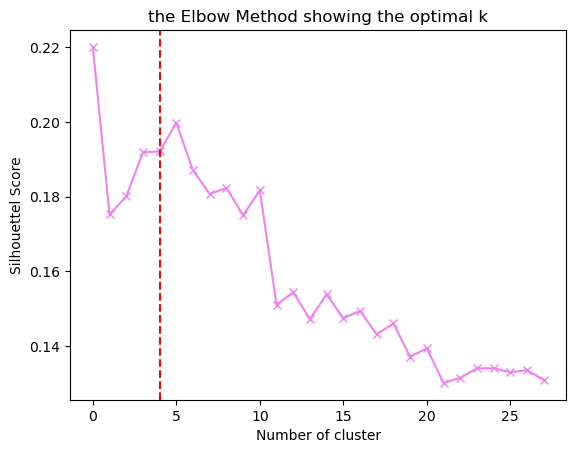

In [215]:
sil_Hierarch = []
for k in range(2,30):#this range is optional
    Hierarch = AgglomerativeClustering(n_clusters = k,linkage='ward')
    score = silhouette_score(Scaled_features, Hierarch.fit_predict(Scaled_features),metric='euclidean')
    sil_Hierarch.append(score)
K7=KneeLocator(range (2,30),sil_Hierarch,curve="convex",direction="decreasing")
K7.elbow
plt.plot(sil_Hierarch,'bx-',color='violet')
plt.xlabel('Number of cluster')
plt.ylabel('Silhouettel Score')
plt.title('the Elbow Method showing the optimal k')
plt.axvline(x=K5.elbow, color='r', label='axvline - full height', ls='--')
plt.show()

In [216]:
K7=KneeLocator(range (2,30),sil_Hierarch,curve="convex",direction="decreasing")
K7.elbow

3

In [217]:
Hierarch = AgglomerativeClustering(n_clusters =3,linkage='ward')
Hierarch.fit(Scaled_features)
score = silhouette_score(Scaled_features, Hierarch.fit_predict(Scaled_features))
print("silhouette_score",score)

silhouette_score 0.17522366045055526


In [218]:
# Calculate clustering metrics
Hierarch = AgglomerativeClustering(n_clusters =3,linkage='ward')
Hierarch.fit(Scaled_features)
silhouette = silhouette_score(Scaled_features,Hierarch.fit_predict(Scaled_features))
ch_index = calinski_harabasz_score(Scaled_features,Hierarch.fit_predict(Scaled_features))


# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")


Silhouette Score: 0.18
Calinski-Harabasz Index: 2038.43


In [219]:
cluster = pd.concat([Df, pd.DataFrame({'cluster': labels})], axis = 1)
cluster_

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3.735304           0.597837   4.568506          0.000000   
1     8.071989           0.646627   0.000000          0.000000   
2     7.822504           0.693147   6.651791          6.651791   
3     7.419183           0.492477   7.313220          7.313220   
4     6.707735           0.693147   2.833213          2.833213   
...        ...                ...        ...               ...   
8945  3.384170           0.693147   5.677165          0.000000   
8946  3.004851           0.693147   5.707110          0.000000   
8947  3.194529           0.606136   4.979489          0.000000   
8948  2.671218           0.606136   0.000000          0.000000   
8949  5.923475           0.510826   6.997824          6.997824   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   4.568506      0.000000             0.154151   
1                   0.000000      8.770896             0.000000   
2                   0.000000      0.000000             0.693147   
3                   0.000000      5.331694             0.080042   
4                   0.000000      0.000000             0.080042   
...                      ...           ...                  ...   
8945                5.677165      0.000000             0.693147   
8946                5.707110      0.000000             0.693147   
8947                4.979489      0.000000             0.606136   
8948                0.000000      3.625907             0.000000   
8949                0.000000      4.852343             0.510826   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.080042   
1                       0.000000                          0.000000   
2                       0.693147                          0.000000   
3                       0.080042                          0.000000   
4                       0.080042                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.606136   
8946                    0.000000                          0.606136   
8947                    0.000000                          0.510826   
8948                    0.000000                          0.000000   
8949                    0.510826                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000          0.000000       1.098612      6.908755   
1                   0.223144          1.609438       0.000000      8.853808   
2                   0.000000          0.000000       2.564949      8.922792   
3                   0.080042          0.693147       0.693147      8.922792   
4                   0.000000          0.000000       0.693147      7.090910   
...                      ...               ...            ...           ...   
8945                0.000000          0.000000       1.945910      6.908755   
8946                0.000000          0.000000       1.945910      6.908755   
8947                0.000000          0.000000       1.791759      6.908755   
8948                0.154151          1.098612       0.000000      6.216606   
8949                0.287682          1.098612       3.178054      7.090910   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  cluster  
0     5.312231          4.945277          0.000000  2.564949        1  
1     8.319725          6.978531          0.200671  2.564949        3  
2     6.434654          6.442994          0.000000  2.564949        3  
3     0.000000          0.000000          0.000000  2.564949        3  
4     6.521114          5.504483          0.000000  2.564949        3  
...        ...               ...               ...       ...      ...  
8945  5.788719          3.909748          0.405465  1.945910        1  
8946  5.623517          0.000000          0

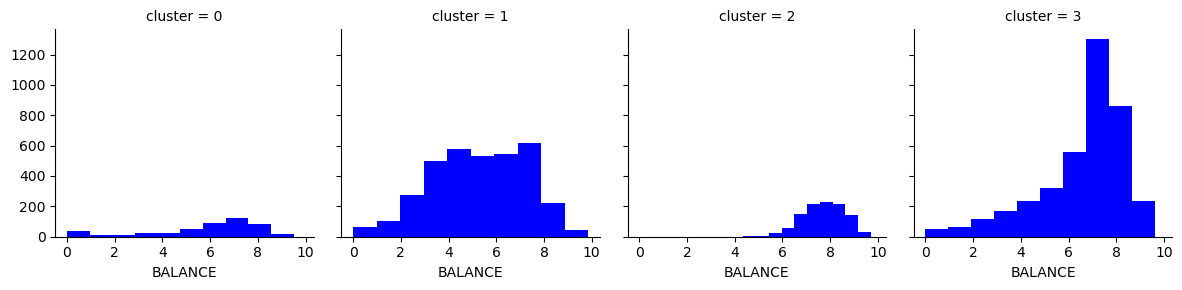

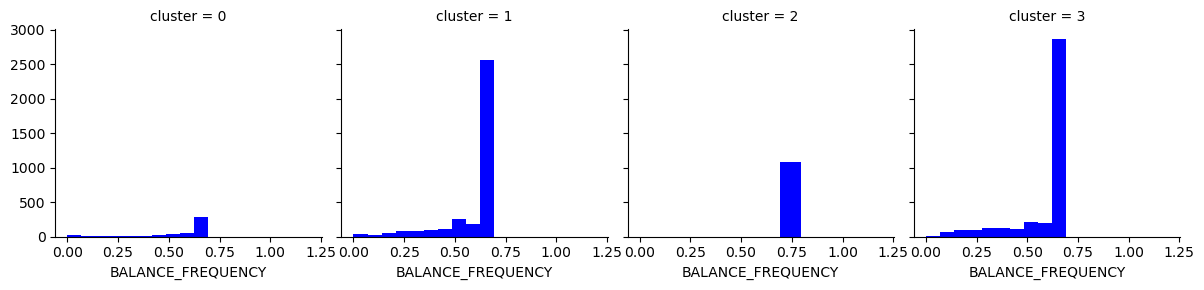

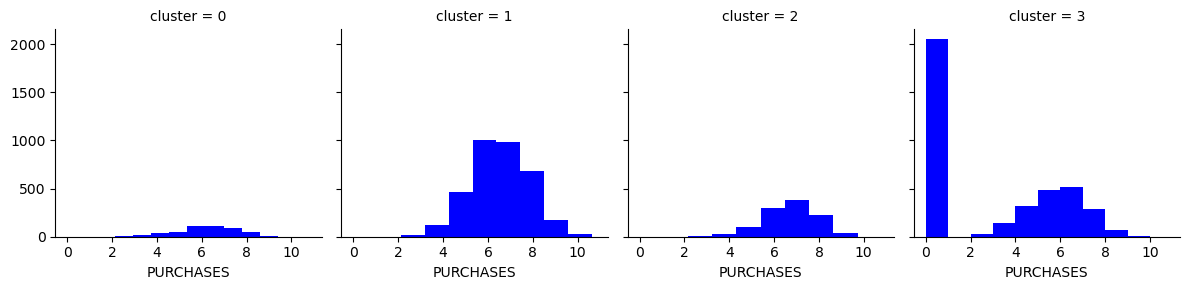

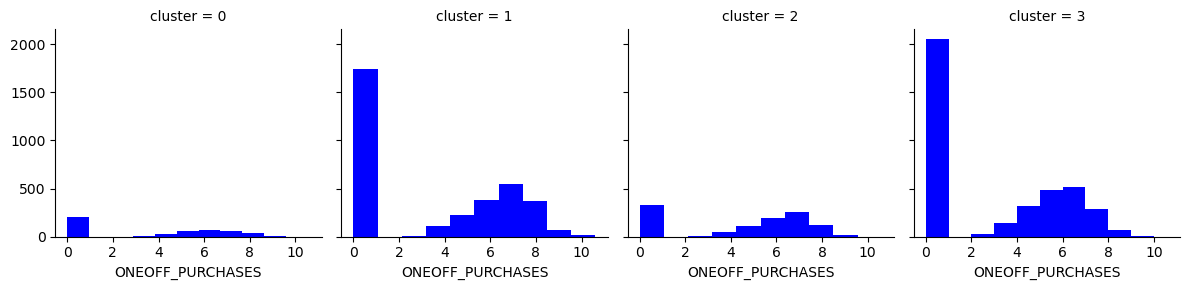

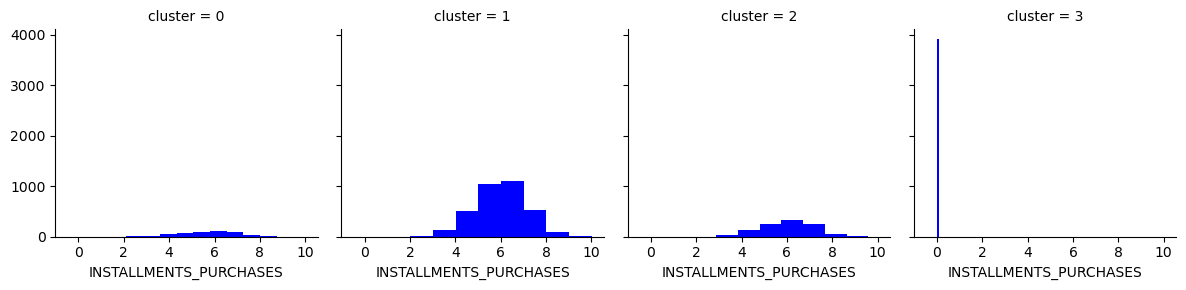

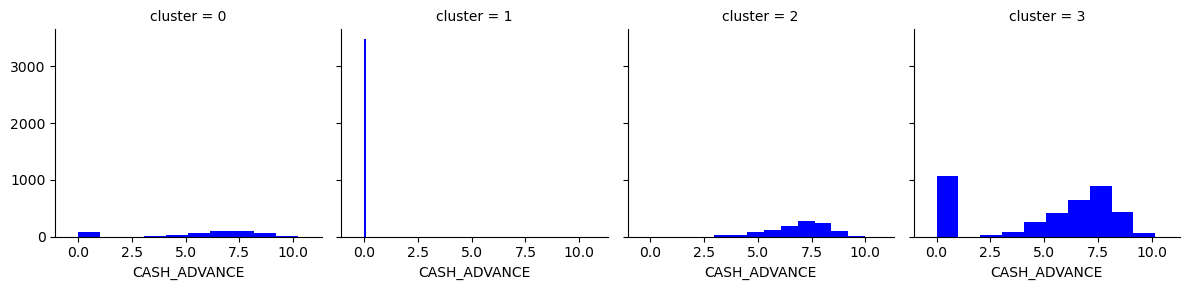

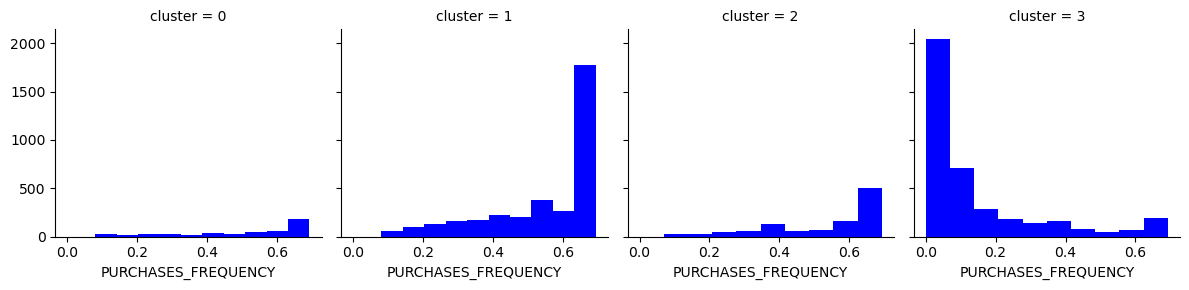

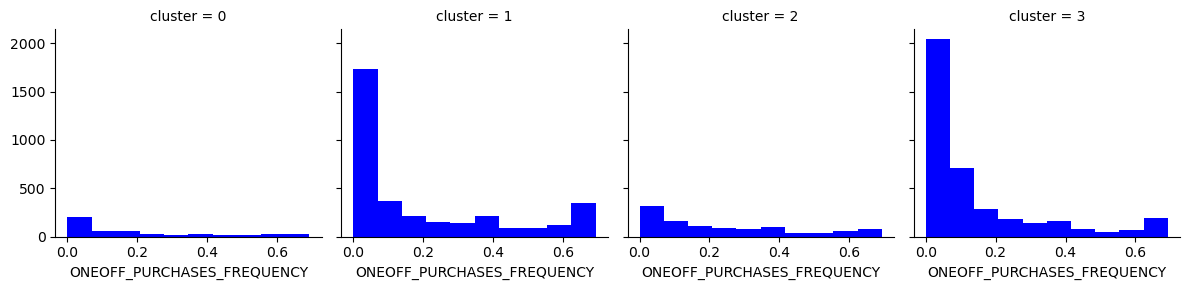

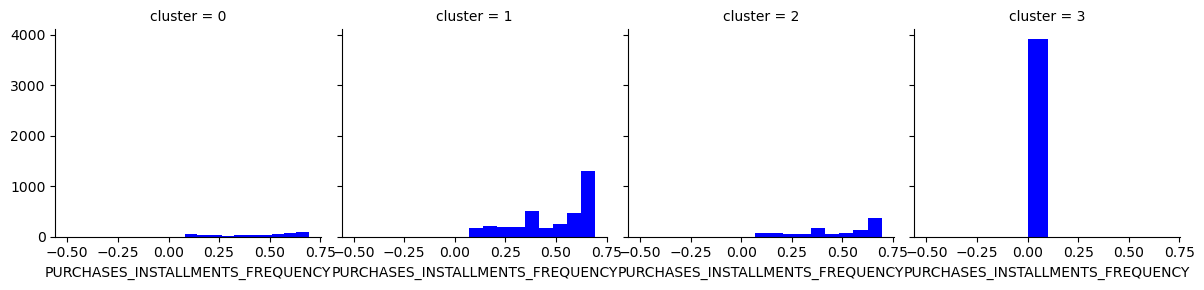

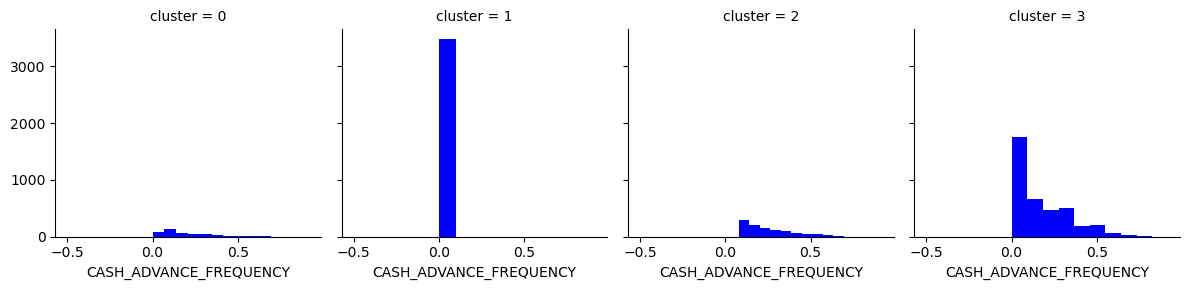

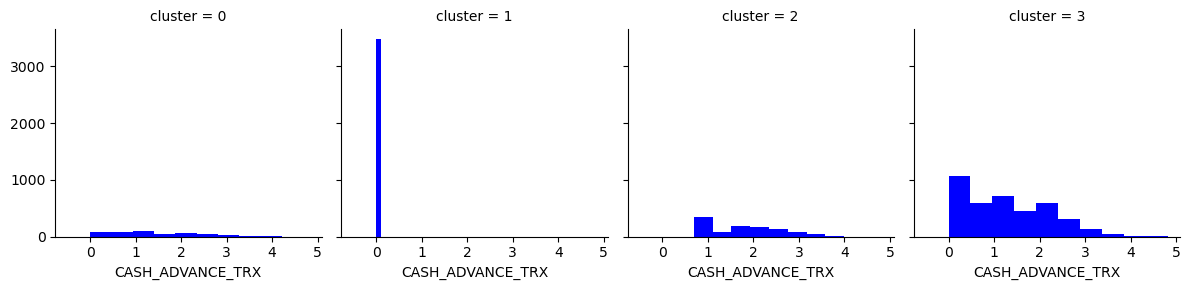

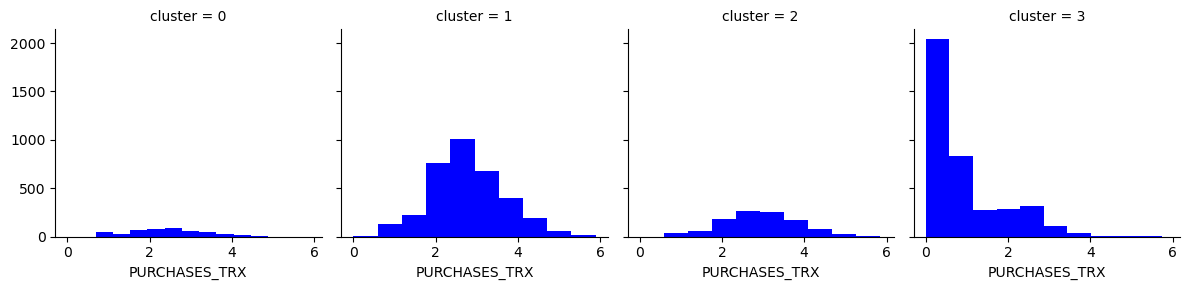

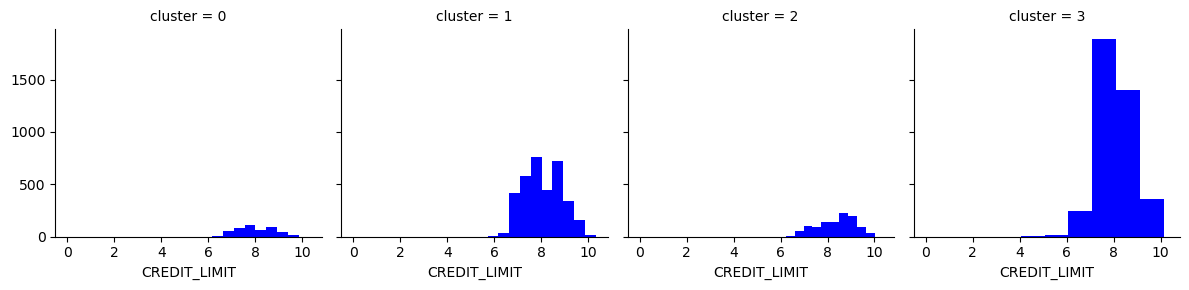

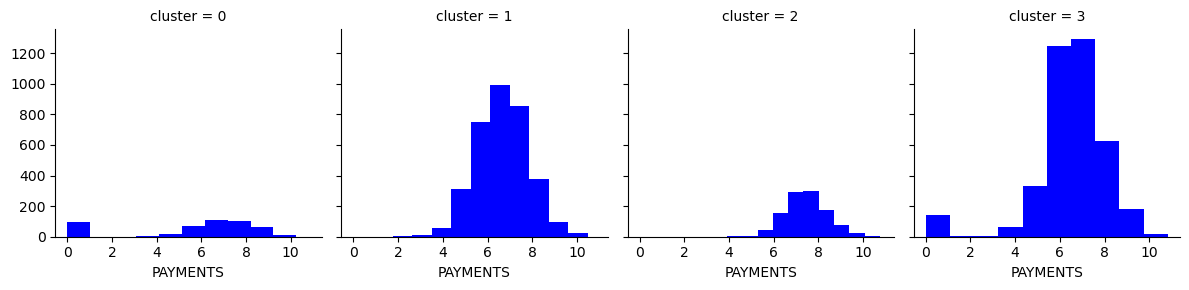

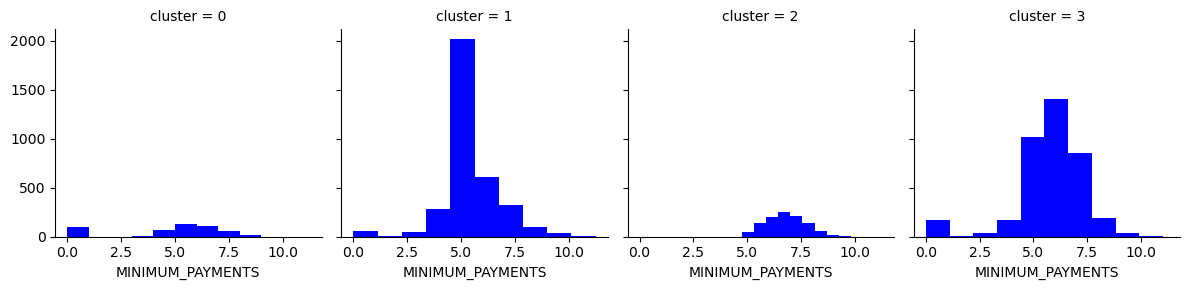

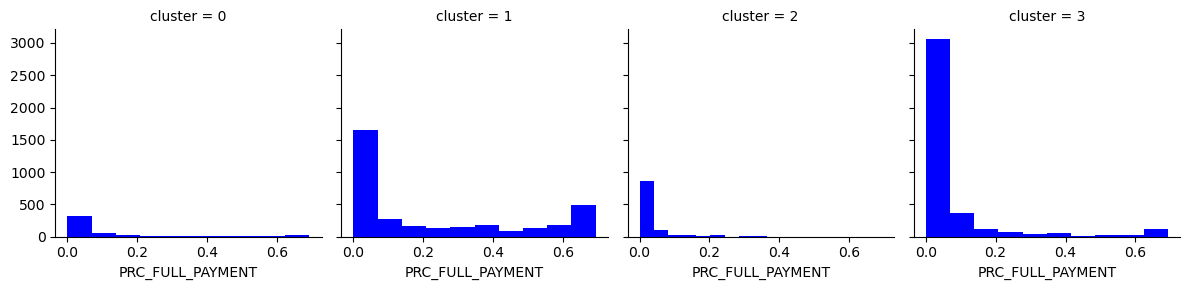

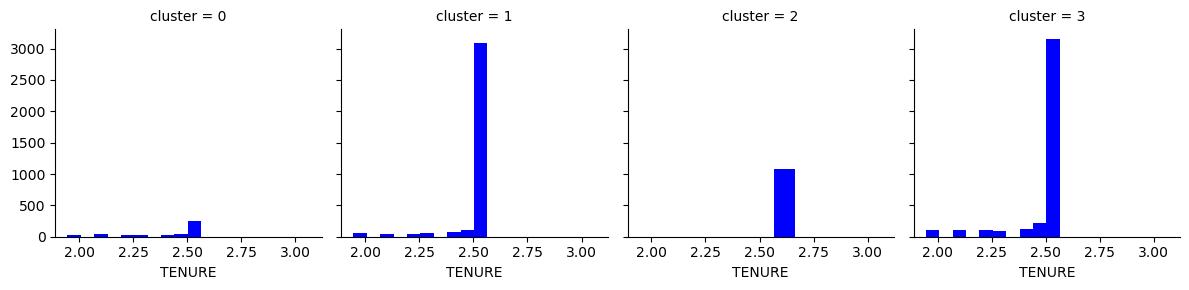

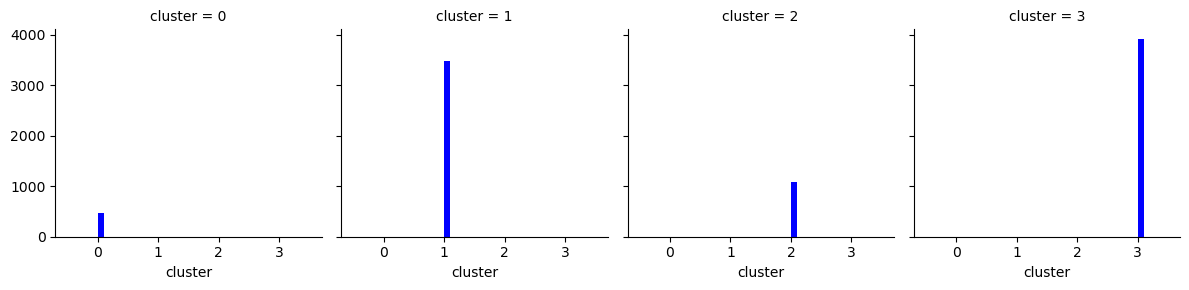

In [220]:
for c in cluster_:
    grid=sns.FacetGrid(cluster_,col='cluster')
    grid.map(plt.hist,c,color='blue')

In [221]:
print(sil_Hierarch)
max(sil_Hierarch)

[0.2201047597758597, 0.17522366045055526, 0.18004425391846512, 0.19184025626550502, 0.19210153235893243, 0.19974300253934005, 0.18702080585183145, 0.18070804991609757, 0.18235591716638097, 0.17499324289096924, 0.1816883049742681, 0.15105098940842576, 0.15434814177859266, 0.14719963729847318, 0.15381435319331163, 0.1474215953468543, 0.14940046586481695, 0.1430953572620528, 0.14601049758046608, 0.13711228218436342, 0.13935741263768772, 0.13008567632850787, 0.13143130418549673, 0.13399579771719208, 0.13397612928415786, 0.13295009845052108, 0.1334884282716613, 0.1308897828530196]


0.2201047597758597

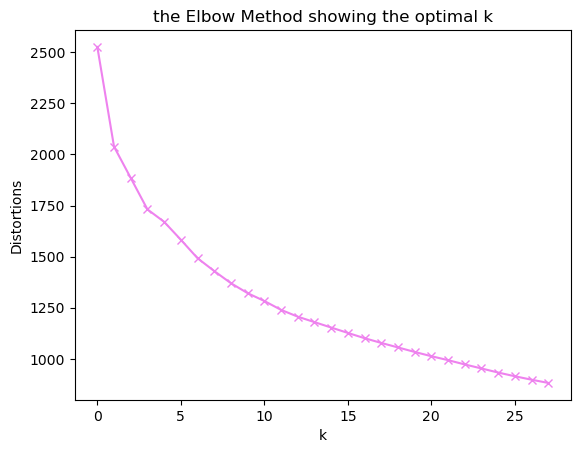

In [223]:
calinski_harabaz = []
for k in range (2,30):
    Hierarch = AgglomerativeClustering(n_clusters = k, linkage='ward')
    score = metrics.calinski_harabasz_score(Scaled_features, Hierarch.fit_predict(Scaled_features))
    calinski_harabaz.append(score)
plt.plot(calinski_harabaz,'bx-',color='violet')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('the Elbow Method showing the optimal k')
plt.show()

In [224]:

K8=KneeLocator(range (2,30),calinski_harabaz,curve="convex",direction="decreasing")
K8.elbow

9

In [225]:

print(calinski_harabaz)
max(calinski_harabaz)

[2526.4996251664284, 2038.430946947435, 1885.1563764016253, 1731.3909061454733, 1670.4636529079453, 1582.7428437003484, 1492.3139996844527, 1429.4743522088904, 1370.073070389929, 1321.275002444828, 1282.909987977705, 1239.5224303124648, 1206.2127846214441, 1179.5360205719985, 1153.0731113343056, 1126.6609337141886, 1100.8965198531669, 1077.6575500801396, 1055.703717051954, 1033.5559793335265, 1012.7522448553408, 993.3702888536096, 972.3812672935913, 952.7830782962585, 932.6892580849552, 914.5657845761251, 897.6341884954561, 881.9079197811321]


2526.4996251664284

In [226]:

Hierarch = AgglomerativeClustering(n_clusters =9,linkage='ward')
Hierarch.fit(Scaled_features)
score = silhouette_score(Scaled_features, Hierarch.fit_predict(Scaled_features))
print("silhouette_score",score)

silhouette_score 0.18070804991609757


In [227]:

# Calculate clustering metrics
Hierarch = AgglomerativeClustering(n_clusters =9,linkage='ward')
Hierarch.fit(Scaled_features)
silhouette = silhouette_score(Scaled_features,Hierarch.fit_predict(Scaled_features))
ch_index = calinski_harabasz_score(Scaled_features,Hierarch.fit_predict(Scaled_features))


# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.18
Calinski-Harabasz Index: 1429.47


In [228]:
cluster = pd.concat([Df, pd.DataFrame({'cluster': labels})], axis = 1)
cluster_

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3.735304           0.597837   4.568506          0.000000   
1     8.071989           0.646627   0.000000          0.000000   
2     7.822504           0.693147   6.651791          6.651791   
3     7.419183           0.492477   7.313220          7.313220   
4     6.707735           0.693147   2.833213          2.833213   
...        ...                ...        ...               ...   
8945  3.384170           0.693147   5.677165          0.000000   
8946  3.004851           0.693147   5.707110          0.000000   
8947  3.194529           0.606136   4.979489          0.000000   
8948  2.671218           0.606136   0.000000          0.000000   
8949  5.923475           0.510826   6.997824          6.997824   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   4.568506      0.000000             0.154151   
1                   0.000000      8.770896             0.000000   
2                   0.000000      0.000000             0.693147   
3                   0.000000      5.331694             0.080042   
4                   0.000000      0.000000             0.080042   
...                      ...           ...                  ...   
8945                5.677165      0.000000             0.693147   
8946                5.707110      0.000000             0.693147   
8947                4.979489      0.000000             0.606136   
8948                0.000000      3.625907             0.000000   
8949                0.000000      4.852343             0.510826   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.080042   
1                       0.000000                          0.000000   
2                       0.693147                          0.000000   
3                       0.080042                          0.000000   
4                       0.080042                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.606136   
8946                    0.000000                          0.606136   
8947                    0.000000                          0.510826   
8948                    0.000000                          0.000000   
8949                    0.510826                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000          0.000000       1.098612      6.908755   
1                   0.223144          1.609438       0.000000      8.853808   
2                   0.000000          0.000000       2.564949      8.922792   
3                   0.080042          0.693147       0.693147      8.922792   
4                   0.000000          0.000000       0.693147      7.090910   
...                      ...               ...            ...           ...   
8945                0.000000          0.000000       1.945910      6.908755   
8946                0.000000          0.000000       1.945910      6.908755   
8947                0.000000          0.000000       1.791759      6.908755   
8948                0.154151          1.098612       0.000000      6.216606   
8949                0.287682          1.098612       3.178054      7.090910   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  cluster  
0     5.312231          4.945277          0.000000  2.564949        1  
1     8.319725          6.978531          0.200671  2.564949        3  
2     6.434654          6.442994          0.000000  2.564949        3  
3     0.000000          0.000000          0.000000  2.564949        3  
4     6.521114          5.504483          0.000000  2.564949        3  
...        ...               ...               ...       ...      ...  
8945  5.788719          3.909748          0.405465  1.945910        1  
8946  5.623517          0.000000          0

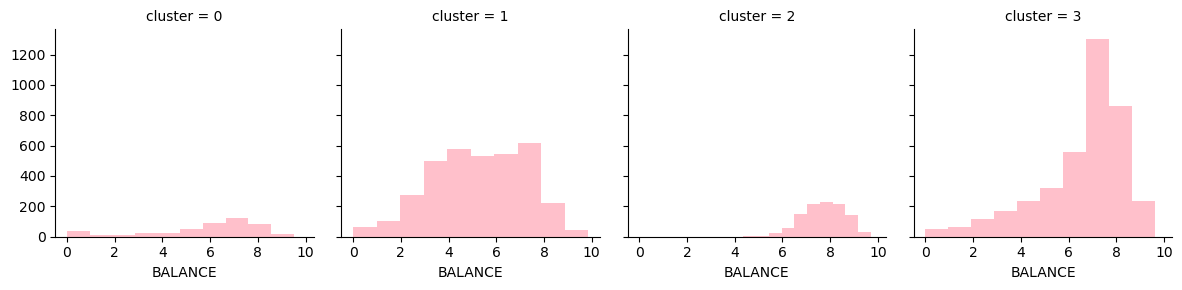

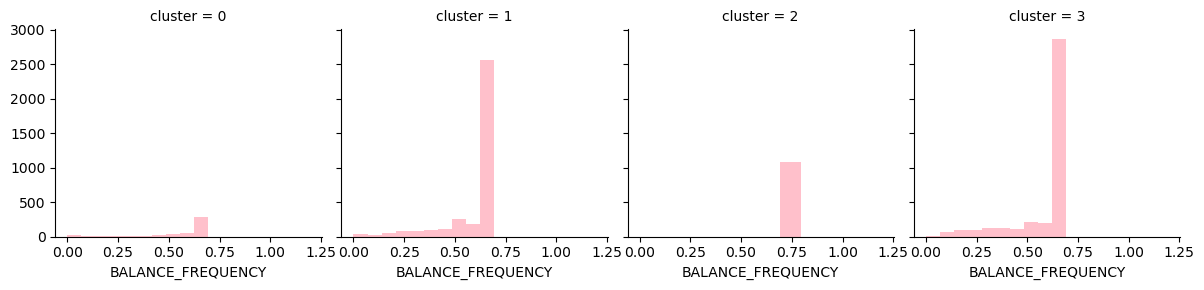

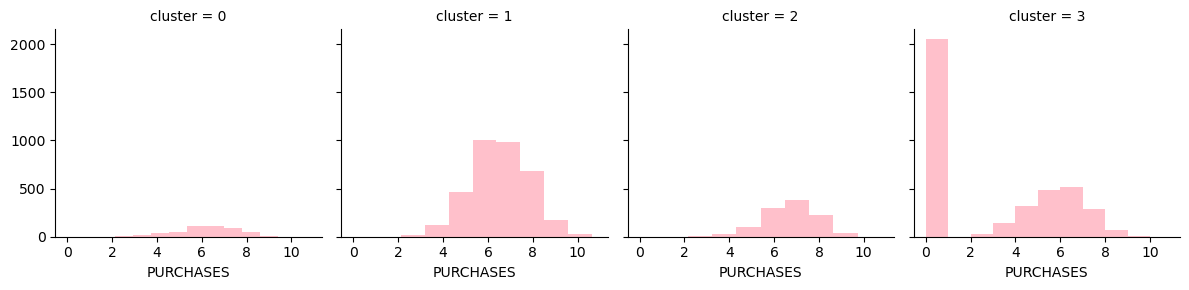

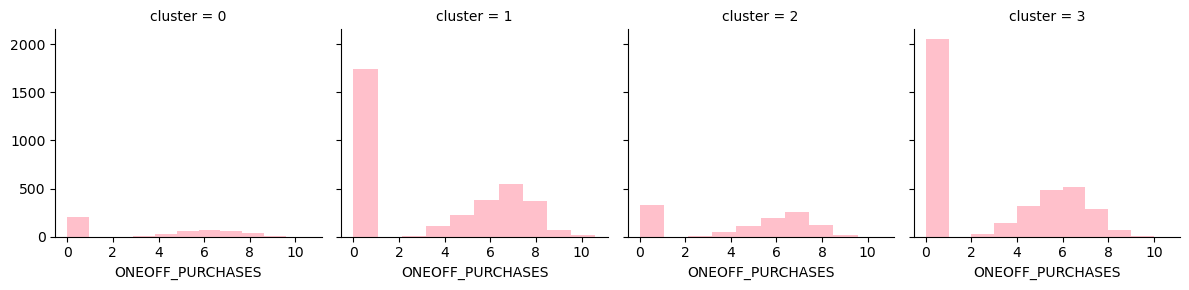

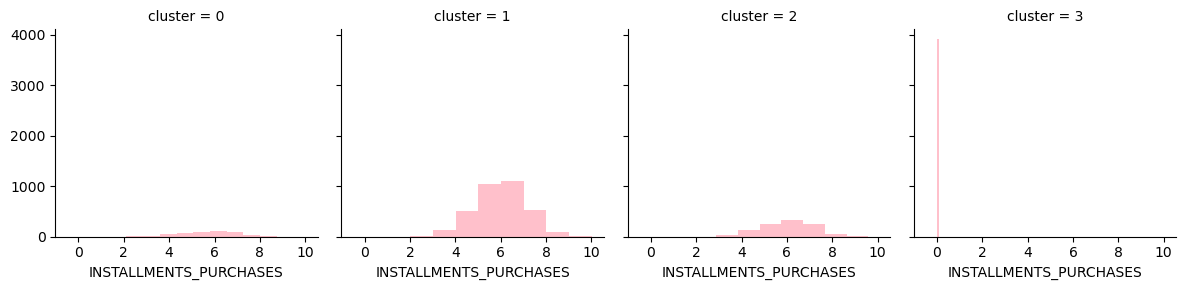

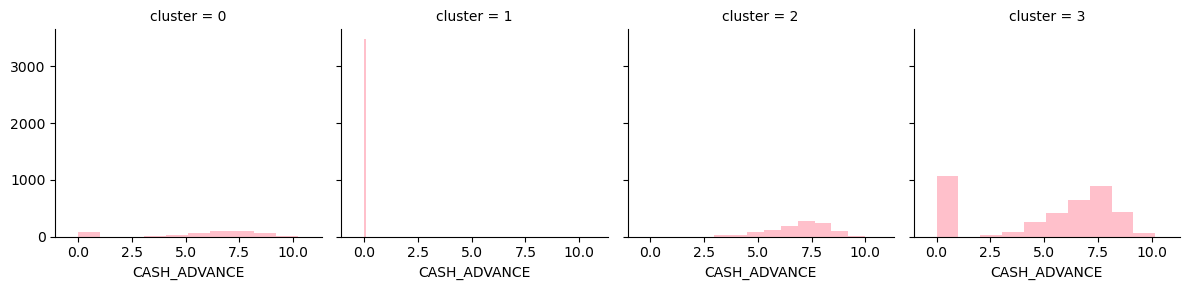

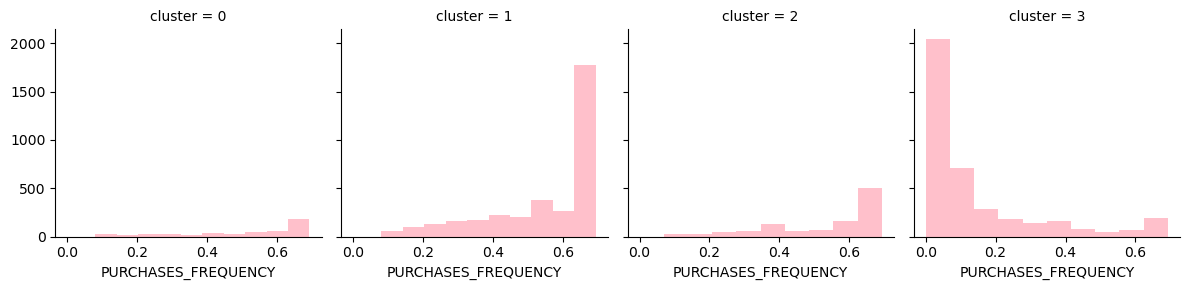

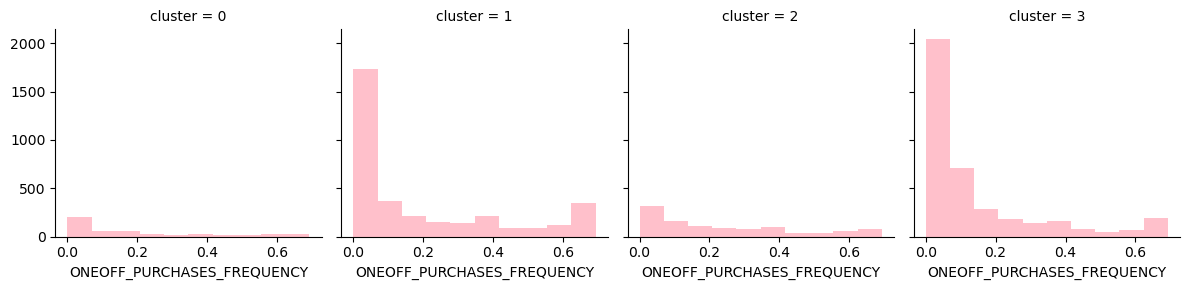

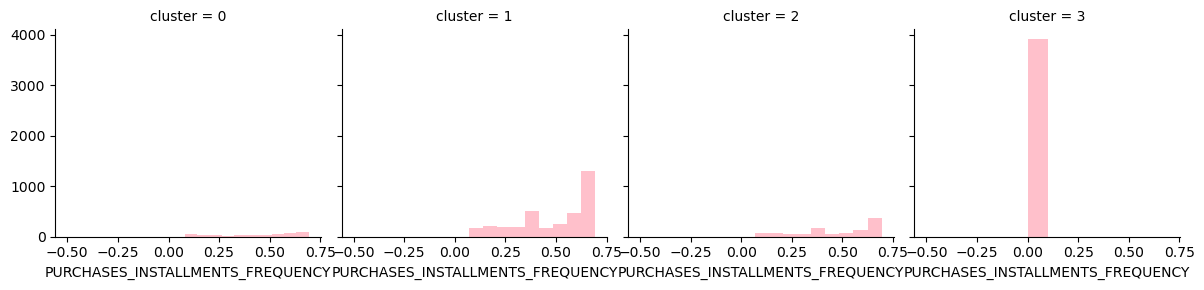

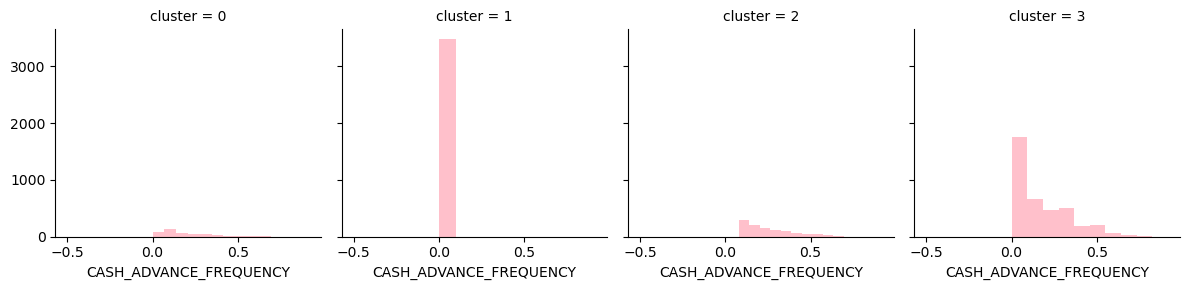

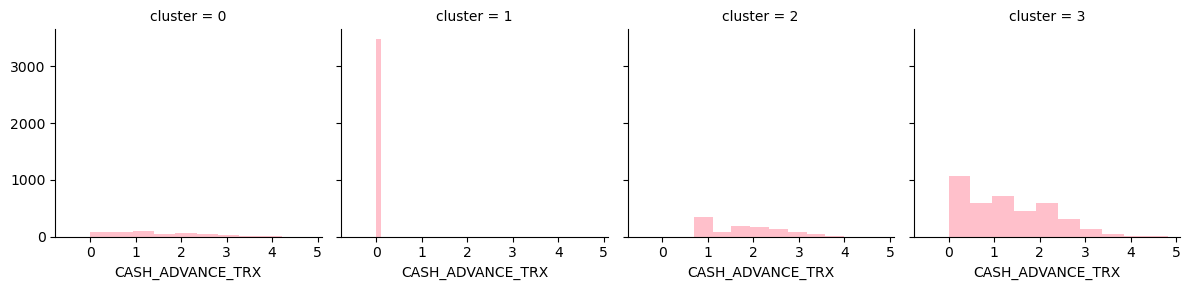

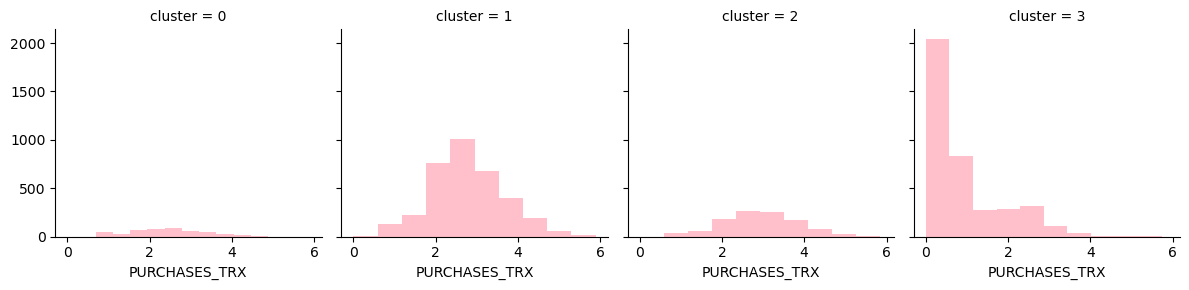

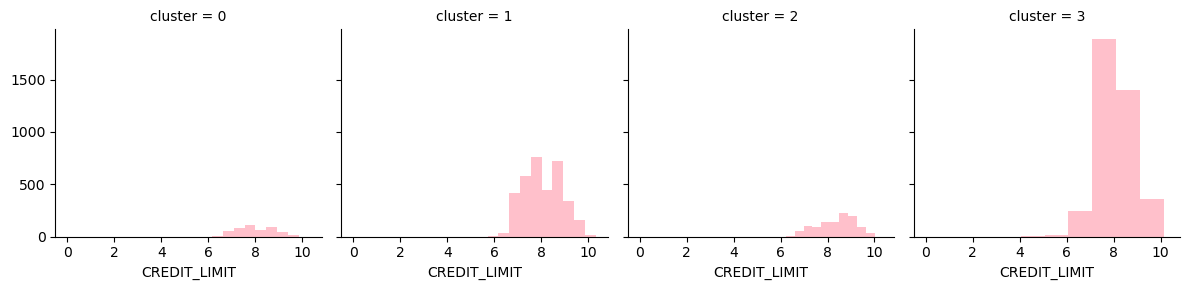

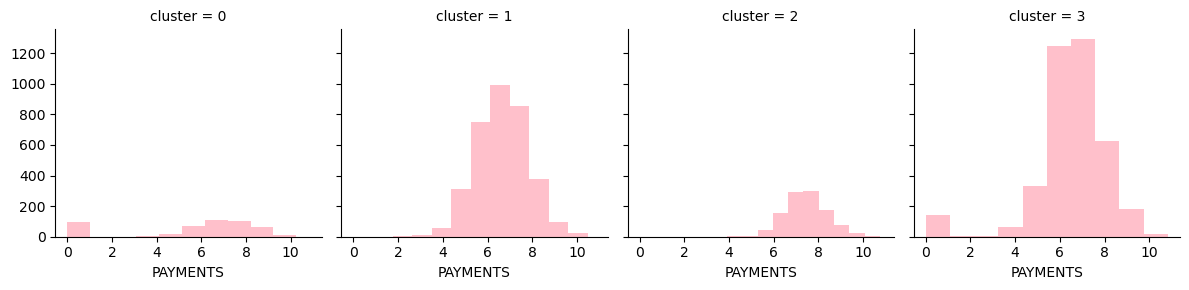

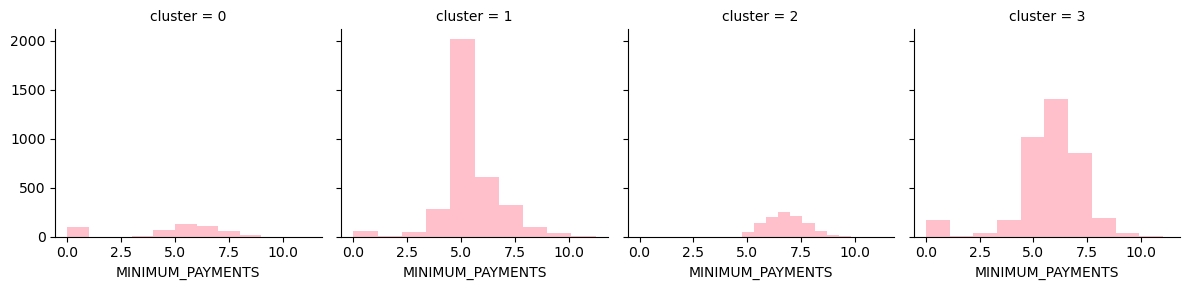

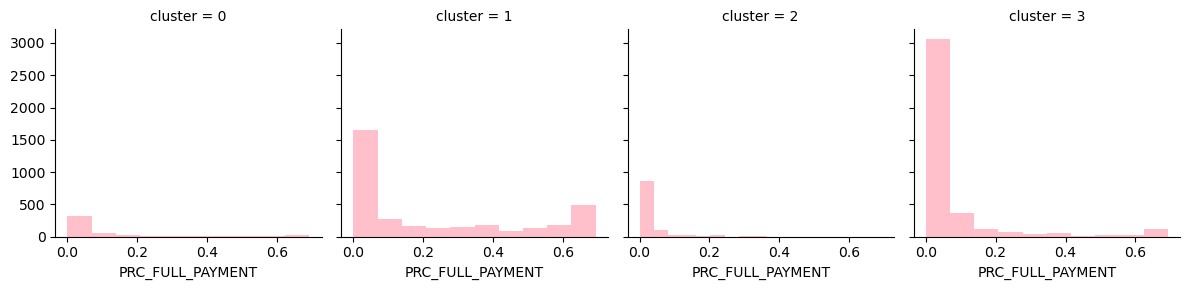

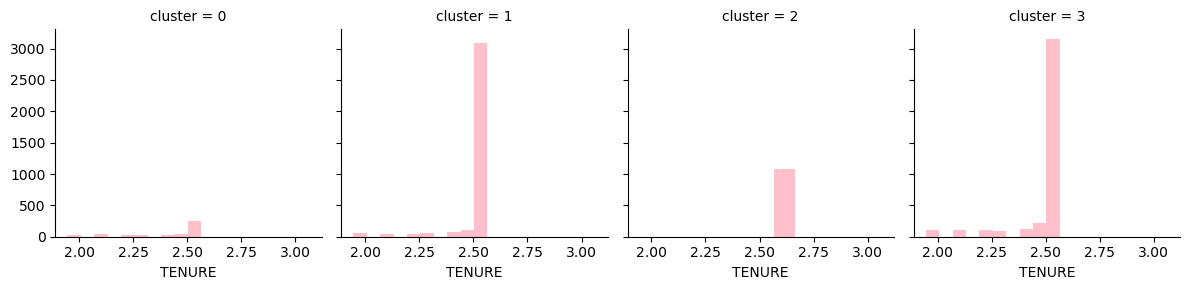

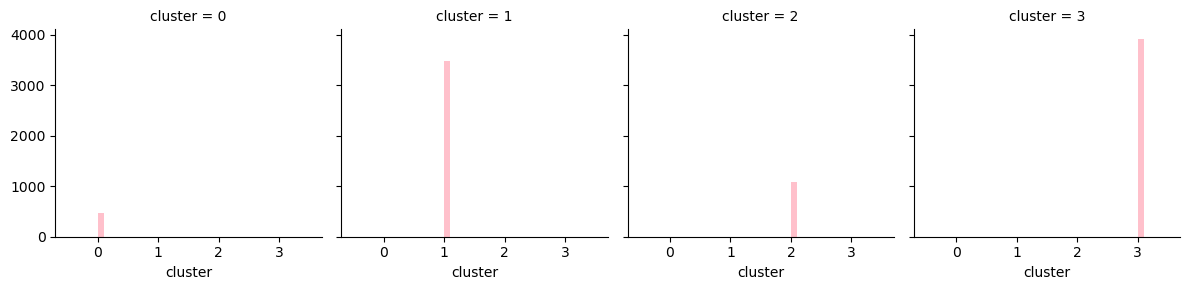

In [229]:
for c in cluster_:
    grid=sns.FacetGrid(cluster_,col='cluster')
    grid.map(plt.hist,c,color='pink')

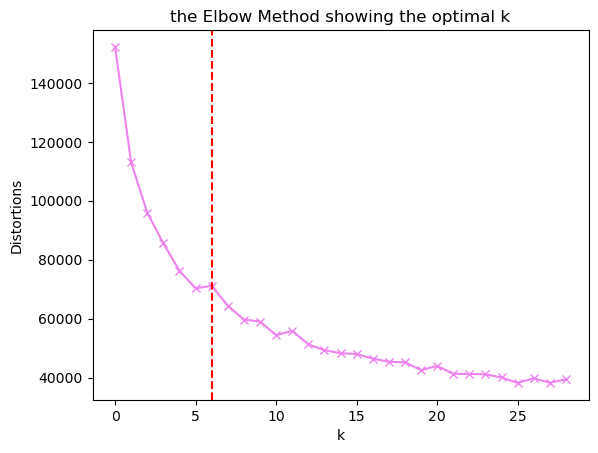

In [230]:

##########MiniBatchKMeans
cost = []
for k in range(1,30):#this range is optional
    minibatch = MiniBatchKMeans(n_clusters=k , random_state =42, batch_size=50) 
    minibatch.fit(Scaled_features)
    cost.append(minibatch.inertia_)
K9=KneeLocator(range (1,30),cost,curve="convex",direction="decreasing")
K9.elbow    
plt.plot(cost,'bx-',color='violet')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('the Elbow Method showing the optimal k')
plt.axvline(x=K9.elbow, color='r', label='axvline - full height', ls='--')
plt.show()

In [231]:
K9=KneeLocator(range (1,30),cost,curve="convex",direction="decreasing")
K9.elbow  

6

In [232]:
print(cost)
max(cost)

[152169.432851063, 112983.83756042767, 95937.37606996848, 85547.32067582606, 76249.44093092465, 70308.87048155801, 71166.43740789797, 64447.89737044789, 59702.31176752123, 59064.33991374668, 54413.43885131672, 55916.400977804515, 51329.94440013465, 49354.970628531846, 48320.567223160404, 48041.916962385665, 46474.45572644845, 45423.15700340236, 45226.031118528095, 42585.41867692269, 44018.21968868187, 41328.065677558865, 41271.53095888942, 41160.40152028278, 40084.49255889031, 38245.19126840285, 39802.678922204446, 38326.01591292112, 39472.30961852126]


152169.432851063

In [233]:
minibatch = MiniBatchKMeans(n_clusters=6 , random_state =42, batch_size=50) 
minibatch.fit(Scaled_features)
cost.append(minibatch.inertia_)
print("Inertia",score)

Inertia 0.18070804991609757


In [234]:
# Calculate clustering metrics
minibatch = MiniBatchKMeans(n_clusters=6 , random_state =42, batch_size=50) 
minibatch.fit(Scaled_features)
silhouette = silhouette_score(Scaled_features,minibatch.predict(Scaled_features))
ch_index = calinski_harabasz_score(Scaled_features,minibatch.predict(Scaled_features))

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")


Silhouette Score: 0.23
Calinski-Harabasz Index: 2101.55


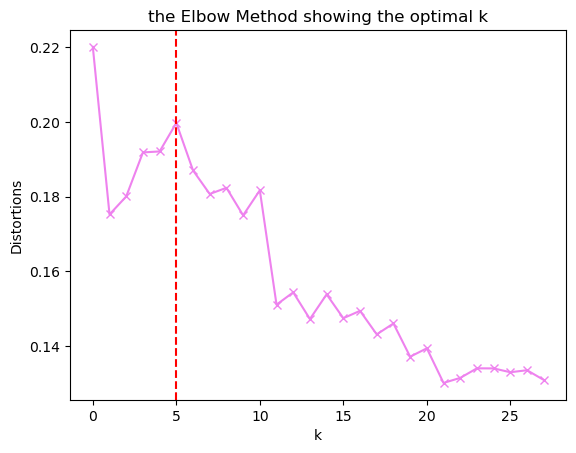

In [235]:
silhouette_coefficients = []
for k in range (2,30):
    minibatch = MiniBatchKMeans(n_clusters=k, random_state =42, batch_size=50) 
    minibatch.fit(Scaled_features)
    score = silhouette_score(Scaled_features, minibatch.predict(Scaled_features))
    silhouette_coefficients.append(score)
k10 = KneeLocator(range(2,30), silhouette_coefficients, curve='convex', direction='decreasing')
k10.elbow
plt.plot(sil_Hierarch,'bx-',color='violet')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('the Elbow Method showing the optimal k')
plt.axvline(x=k10.elbow, color='r', label='axvline - full height', ls='--')
plt.show()  

In [236]:
k10 = KneeLocator(range(2,30), silhouette_coefficients, curve='convex', direction='decreasing')
k10.elbow

5

In [237]:
print(sil_Hierarch)
max(sil_Hierarch)

[0.2201047597758597, 0.17522366045055526, 0.18004425391846512, 0.19184025626550502, 0.19210153235893243, 0.19974300253934005, 0.18702080585183145, 0.18070804991609757, 0.18235591716638097, 0.17499324289096924, 0.1816883049742681, 0.15105098940842576, 0.15434814177859266, 0.14719963729847318, 0.15381435319331163, 0.1474215953468543, 0.14940046586481695, 0.1430953572620528, 0.14601049758046608, 0.13711228218436342, 0.13935741263768772, 0.13008567632850787, 0.13143130418549673, 0.13399579771719208, 0.13397612928415786, 0.13295009845052108, 0.1334884282716613, 0.1308897828530196]


0.2201047597758597

In [238]:
minibatch = MiniBatchKMeans(n_clusters=5, random_state =42, batch_size=50) 
minibatch.fit(Scaled_features)
score = silhouette_score(Scaled_features, minibatch.predict(Scaled_features))
score

0.22940882885268427

In [239]:
# Calculate clustering metrics
minibatch = MiniBatchKMeans(n_clusters=5, random_state =42, batch_size=50) 
minibatch.fit(Scaled_features)
silhouette = silhouette_score(Scaled_features,minibatch.predict(Scaled_features))
ch_index = calinski_harabasz_score(Scaled_features,minibatch.predict(Scaled_features))

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.23
Calinski-Harabasz Index: 2235.22


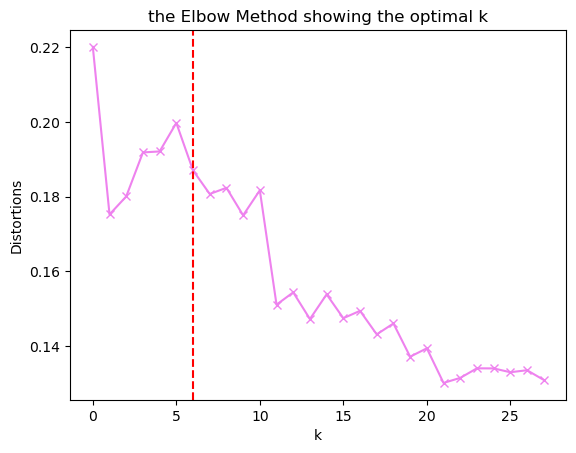

In [240]:
calinski_harabaz = []
for k in range (2,30):
    minibatch = MiniBatchKMeans(n_clusters=k, init='random' , random_state =42, batch_size=50)
    minibatch.fit(Scaled_features)
    score = metrics.calinski_harabasz_score(Scaled_features, minibatch.labels_)
    calinski_harabaz.append(score)
K11=KneeLocator(range (2,30),calinski_harabaz,curve="convex",direction="decreasing")
K11.elbow
plt.plot(sil_Hierarch,'bx-',color='violet')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('the Elbow Method showing the optimal k')
plt.axvline(x=K11.elbow, color='r', label='axvline - full height', ls='--')
plt.show()    

In [241]:
K11=KneeLocator(range (2,30),calinski_harabaz,curve="convex",direction="decreasing")
K11.elbow

6

In [242]:
print(calinski_harabaz)
max(calinski_harabaz)

[3084.7434936907184, 2631.836985520423, 2232.515336923653, 1969.3504178862177, 1758.978212452412, 1849.5916307462617, 1738.7724491247711, 1659.7483090779424, 1594.7284268997216, 1538.2694013752937, 1484.78721412446, 1414.364438681352, 1356.4729957937864, 1378.789769180678, 1324.3205238346834, 1288.3846174185912, 1239.139512413076, 1207.864219155845, 1155.455284386031, 1112.9490596108901, 1110.3380023332495, 1060.4420634450264, 1016.3464929710502, 1008.3870454552851, 996.0687134140003, 976.8413854257566, 990.358330192919, 964.1701774909268]


3084.7434936907184

In [243]:
minibatch = MiniBatchKMeans(n_clusters=6, random_state =42, batch_size=50) 
minibatch.fit(Scaled_features)
score = silhouette_score(Scaled_features, minibatch.predict(Scaled_features))
score

0.23219492986733642

In [244]:
# Calculate clustering metrics

minibatch = MiniBatchKMeans(n_clusters=6, random_state =42, batch_size=50) 
minibatch.fit(Scaled_features)
silhouette = silhouette_score(Scaled_features,minibatch.predict(Scaled_features))
ch_index = calinski_harabasz_score(Scaled_features,minibatch.predict(Scaled_features))

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.23
Calinski-Harabasz Index: 2101.55


In [245]:
minibatch = MiniBatchKMeans(n_clusters=6, random_state =42, batch_size=50)
minibatch.fit(Scaled_features)
labels = minibatch.labels_
cluster_centers = pd.DataFrame(data = minibatch.cluster_centers_, columns = [Df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0  0.521859          0.195866 -1.567013        -0.911773   
1 -0.050951          0.021571  0.433971         0.859651   
2 -0.679954          0.048337  0.391472        -0.724951   
3 -1.860226         -2.584377 -0.310660        -0.391337   
4  0.400375          0.419994  0.960722         1.114512   
5  0.849729          0.387663  0.370026         0.439596   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -1.058638     0.975857           -1.272137   
1              -0.722859    -0.646117           -0.180315   
2               0.849301    -0.779304            0.722509   
3              -0.359389    -0.499014           -0.623026   
4               1.022534    -0.354757            1.026949   
5              -0.004912     1.242684            0.052761   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.707007                        -0.948761   
1                   0.558378                        -0.798645   
2                  -0.613793                         0.937156   
3                  -0.505334                        -0.480039   
4                   1.215812                         0.971168   
5                   0.170546                        -0.126036   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.724383         0.810960     -1.329126    -0.138737   
1              -0.597148        -0.640925     -0.023381    -0.101755   
2              -0.655512        -0.717871      0.428409    -0.431043   
3              -0.534182        -0.550237     -0.584776    -0.289998   
4              -0.403150        -0.395901      1.231175     0.616670   
5               1.561079         1.520526      0.171425     0.481141   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0  0.046662         0.342611        -0.411546 -0.072585  
1 -0.051819        -0.075381        -0.109209  0.036027  
2 -0.255515        -0.243550         0.611616  0.010462  
3 -1.714288        -2.087767        -0.161777 -0.162751  
4  0.635441         0.293075         0.178802  0.251159  
5  0.510673         0.691962        -0.412535 -0.110355

In [246]:
cluster_centers = Scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [Df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0  7.212238          0.649042  0.329127         0.244493   
1  6.059063          0.623145  6.165416         5.994858   
2  4.792760          0.627122  6.041458         0.850951   
3  2.416649          0.235949  3.993543         1.933921   
4  6.967669          0.682343  7.701794         6.822186   
5  7.872303          0.677539  5.978906         4.631283   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0               0.088833     6.799089            0.008503   
1               1.123973     1.014968            0.311266   
2               5.970629     0.540012            0.561620   
3               2.244478     1.539553            0.188502   
4               6.504671     2.053986            0.646042   
5               3.337261     7.750620            0.375898   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.005519                         0.002676   
1                   0.279677                         0.044984   
2                   0.025715                         0.534196   
3                   0.049213                         0.134779   
4                   0.422117                         0.543782   
5                   0.195650                         0.234550   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.227028         1.636039      0.068805     7.979606   
1               0.019935         0.170710      1.862610     8.010081   
2               0.010789         0.093052      2.483270     7.738735   
3               0.029802         0.262237      1.091377     7.854961   
4               0.050336         0.418003      3.586094     8.602089   
5               0.358145         2.352176      2.130231     8.490408   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0  6.698810         6.262320         0.030645  2.510218  
1  6.542061         5.594681         0.094621  2.524377  
2  6.217843         5.326074         0.247151  2.521044  
3  3.895953         2.380397         0.083497  2.498464  
4  7.635954         6.183197         0.155566  2.552421  
5  7.437365         6.820321         0.030436  2.505294

In [247]:
cluster_ = pd.concat([Df, pd.DataFrame({'cluster': labels})], axis = 1)
cluster_

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3.735304           0.597837   4.568506          0.000000   
1     8.071989           0.646627   0.000000          0.000000   
2     7.822504           0.693147   6.651791          6.651791   
3     7.419183           0.492477   7.313220          7.313220   
4     6.707735           0.693147   2.833213          2.833213   
...        ...                ...        ...               ...   
8945  3.384170           0.693147   5.677165          0.000000   
8946  3.004851           0.693147   5.707110          0.000000   
8947  3.194529           0.606136   4.979489          0.000000   
8948  2.671218           0.606136   0.000000          0.000000   
8949  5.923475           0.510826   6.997824          6.997824   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   4.568506      0.000000             0.154151   
1                   0.000000      8.770896             0.000000   
2                   0.000000      0.000000             0.693147   
3                   0.000000      5.331694             0.080042   
4                   0.000000      0.000000             0.080042   
...                      ...           ...                  ...   
8945                5.677165      0.000000             0.693147   
8946                5.707110      0.000000             0.693147   
8947                4.979489      0.000000             0.606136   
8948                0.000000      3.625907             0.000000   
8949                0.000000      4.852343             0.510826   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.080042   
1                       0.000000                          0.000000   
2                       0.693147                          0.000000   
3                       0.080042                          0.000000   
4                       0.080042                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.606136   
8946                    0.000000                          0.606136   
8947                    0.000000                          0.510826   
8948                    0.000000                          0.000000   
8949                    0.510826                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000          0.000000       1.098612      6.908755   
1                   0.223144          1.609438       0.000000      8.853808   
2                   0.000000          0.000000       2.564949      8.922792   
3                   0.080042          0.693147       0.693147      8.922792   
4                   0.000000          0.000000       0.693147      7.090910   
...                      ...               ...            ...           ...   
8945                0.000000          0.000000       1.945910      6.908755   
8946                0.000000          0.000000       1.945910      6.908755   
8947                0.000000          0.000000       1.791759      6.908755   
8948                0.154151          1.098612       0.000000      6.216606   
8949                0.287682          1.098612       3.178054      7.090910   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  cluster  
0     5.312231          4.945277          0.000000  2.564949        2  
1     8.319725          6.978531          0.200671  2.564949        0  
2     6.434654          6.442994          0.000000  2.564949        1  
3     0.000000          0.000000          0.000000  2.564949        3  
4     6.521114          5.504483          0.000000  2.564949        1  
...        ...               ...               ...       ...      ...  
8945  5.788719          3.909748          0.405465  1.945910        2  
8946  5.623517          0.000000          0

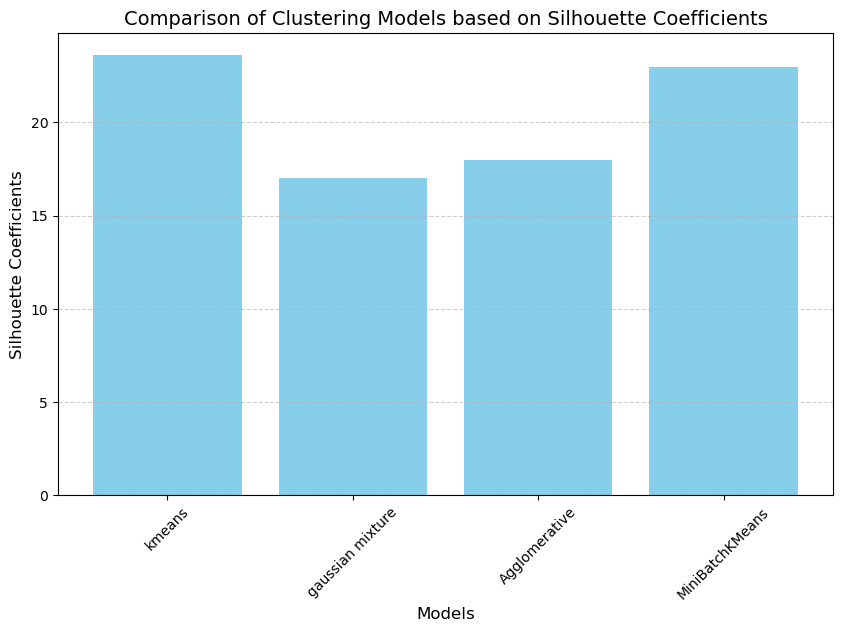

In [248]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'models': ['kmeans', 'gaussian mixture', 'Agglomerative', 'MiniBatchKMeans'],
        'silhouette_coefficients': [23.62, 17, 18, 23]}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.bar(df['models'], df['silhouette_coefficients'], color='skyblue')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Silhouette Coefficients', fontsize=12)
plt.title('Comparison of Clustering Models based on Silhouette Coefficients', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

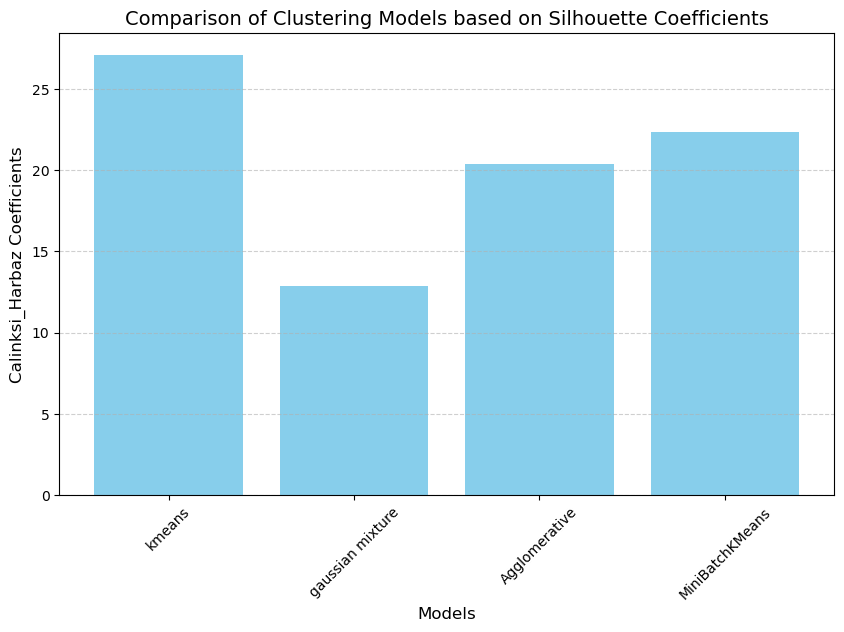

In [249]:
import pandas as pd
import matplotlib.pyplot as plt

data = {'models': ['kmeans', 'gaussian mixture', 'Agglomerative', 'MiniBatchKMeans'],
        'Calinksi_Harbaz': [27.09, 12.89, 20.38, 22.35]}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
plt.bar(df['models'], df['Calinksi_Harbaz'], color='skyblue')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Calinksi_Harbaz Coefficients', fontsize=12)
plt.title('Comparison of Clustering Models based on Silhouette Coefficients', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [250]:
####best model is Kmeans with Number of cluster = 6 based on SS and CH metrics

In [251]:
Kmeans = KMeans(n_clusters=6).fit(Scaled_features)
centroids = Kmeans.cluster_centers_
labels=Kmeans.labels_
labels
cluster_kmeans = pd.DataFrame(data = Kmeans.cluster_centers_, columns = [Df.columns])
cluster_kmeans
cluster_kmeans=pd.concat([Df,pd.DataFrame({'cluster':labels})],axis=1)
cluster_kmeans

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3.735304           0.597837   4.568506          0.000000   
1     8.071989           0.646627   0.000000          0.000000   
2     7.822504           0.693147   6.651791          6.651791   
3     7.419183           0.492477   7.313220          7.313220   
4     6.707735           0.693147   2.833213          2.833213   
...        ...                ...        ...               ...   
8945  3.384170           0.693147   5.677165          0.000000   
8946  3.004851           0.693147   5.707110          0.000000   
8947  3.194529           0.606136   4.979489          0.000000   
8948  2.671218           0.606136   0.000000          0.000000   
8949  5.923475           0.510826   6.997824          6.997824   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   4.568506      0.000000             0.154151   
1                   0.000000      8.770896             0.000000   
2                   0.000000      0.000000             0.693147   
3                   0.000000      5.331694             0.080042   
4                   0.000000      0.000000             0.080042   
...                      ...           ...                  ...   
8945                5.677165      0.000000             0.693147   
8946                5.707110      0.000000             0.693147   
8947                4.979489      0.000000             0.606136   
8948                0.000000      3.625907             0.000000   
8949                0.000000      4.852343             0.510826   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.080042   
1                       0.000000                          0.000000   
2                       0.693147                          0.000000   
3                       0.080042                          0.000000   
4                       0.080042                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.606136   
8946                    0.000000                          0.606136   
8947                    0.000000                          0.510826   
8948                    0.000000                          0.000000   
8949                    0.510826                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000          0.000000       1.098612      6.908755   
1                   0.223144          1.609438       0.000000      8.853808   
2                   0.000000          0.000000       2.564949      8.922792   
3                   0.080042          0.693147       0.693147      8.922792   
4                   0.000000          0.000000       0.693147      7.090910   
...                      ...               ...            ...           ...   
8945                0.000000          0.000000       1.945910      6.908755   
8946                0.000000          0.000000       1.945910      6.908755   
8947                0.000000          0.000000       1.791759      6.908755   
8948                0.154151          1.098612       0.000000      6.216606   
8949                0.287682          1.098612       3.178054      7.090910   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  cluster  
0     5.312231          4.945277          0.000000  2.564949        0  
1     8.319725          6.978531          0.200671  2.564949        1  
2     6.434654          6.442994          0.000000  2.564949        2  
3     0.000000          0.000000          0.000000  2.564949        5  
4     6.521114          5.504483          0.000000  2.564949        2  
...        ...               ...               ...       ...      ...  
8945  5.788719          3.909748          0.405465  1.945910        0  
8946  5.623517          0.000000          0

In [252]:
cluster_kmeans.head(10)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  3.735304           0.597837   4.568506          0.000000   
1  8.071989           0.646627   0.000000          0.000000   
2  7.822504           0.693147   6.651791          6.651791   
3  7.419183           0.492477   7.313220          7.313220   
4  6.707735           0.693147   2.833213          2.833213   
5  7.501540           0.693147   7.196147          0.000000   
6  6.442955           0.693147   8.866724          8.764620   
7  7.509145           0.693147   6.080391          0.000000   
8  6.923556           0.693147   6.759824          6.496005   
9  5.031914           0.435318   7.156645          7.156645   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                4.568506      0.000000             0.154151   
1                0.000000      8.770896             0.000000   
2                0.000000      0.000000             0.693147   
3                0.000000      5.331694             0.080042   
4                0.000000      0.000000             0.080042   
5                7.196147      0.000000             0.510826   
6                6.535793      0.000000             0.693147   
7                6.080391      0.000000             0.693147   
8                5.303305      0.000000             0.287682   
9                0.000000      0.000000             0.154151   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.080042   
1                    0.000000                          0.000000   
2                    0.693147                          0.000000   
3                    0.080042                          0.000000   
4                    0.080042                          0.000000   
5                    0.000000                          0.459532   
6                    0.693147                          0.693147   
7                    0.000000                          0.693147   
8                    0.080042                          0.223144   
9                    0.154151                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000          0.000000       1.098612      6.908755   
1                0.223144          1.609438       0.000000      8.853808   
2                0.000000          0.000000       2.564949      8.922792   
3                0.080042          0.693147       0.693147      8.922792   
4                0.000000          0.000000       0.693147      7.090910   
5                0.000000          0.000000       2.197225      7.496097   
6                0.000000          0.000000       4.174387      9.510519   
7                0.000000          0.000000       2.564949      7.741099   
8                0.000000          0.000000       1.791759      8.853808   
9                0.000000          0.000000       1.386294      9.305741   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  cluster  
0  5.312231          4.945277          0.000000  2.564949        0  
1  8.319725          6.978531          0.200671  2.564949        1  
2  6.434654          6.442994          0.000000  2.564949        2  
3  0.000000          0.000000          0.000000  2.564949        5  
4  6.521114          5.504483          0.000000  2.564949        2  
5  7.244983          7.786654          0.000000  2.564949        0  
6  8.757047          5.293636          0.693147  2.564949        4  
7  6.522189          6.278585          0.000000  2.564949        0  
8  6.535645          5.746086          0.000000  2.564949        2  
9  7.061138          4.618109          0.000000  2.564949        2

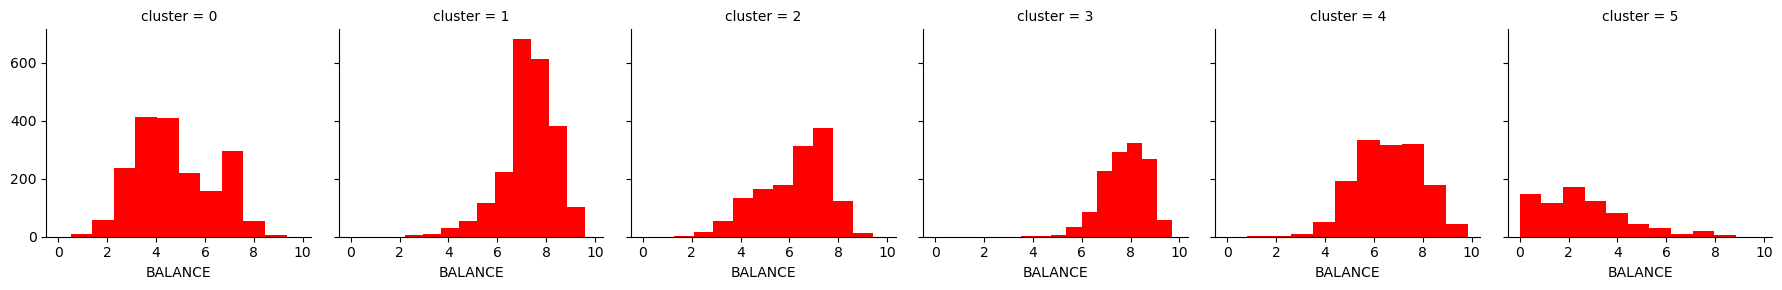

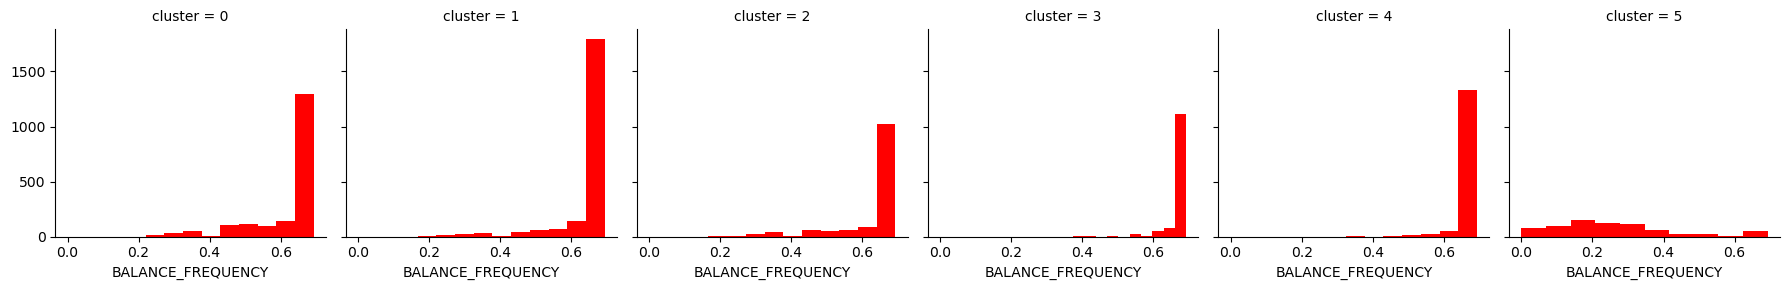

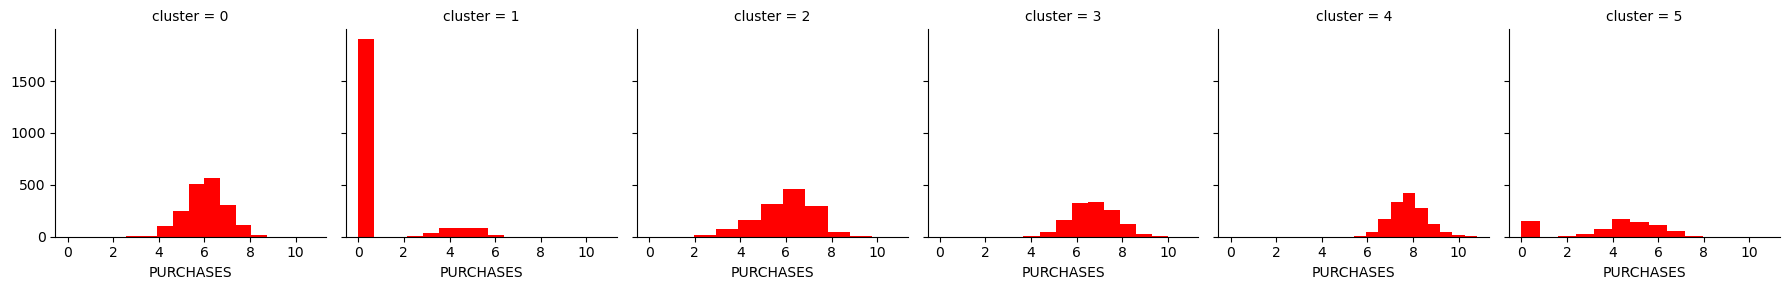

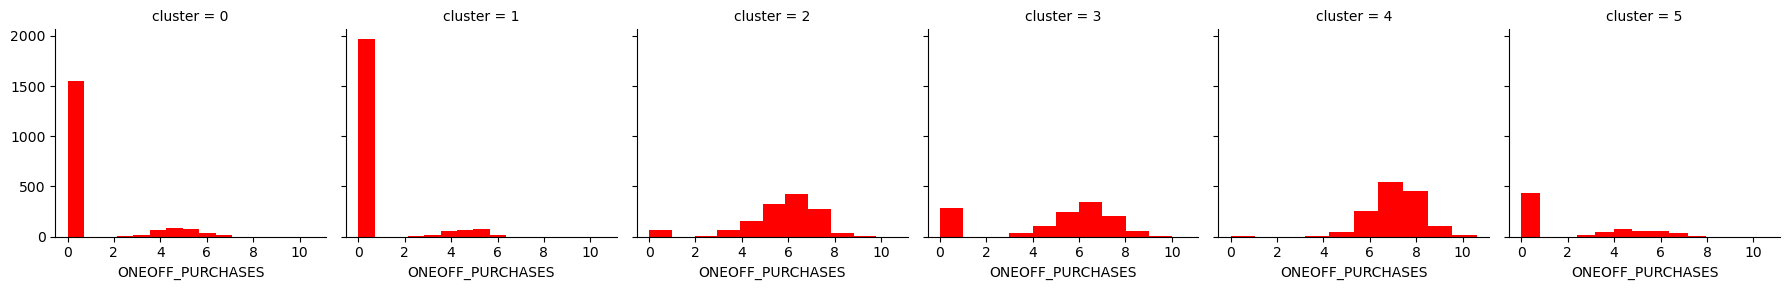

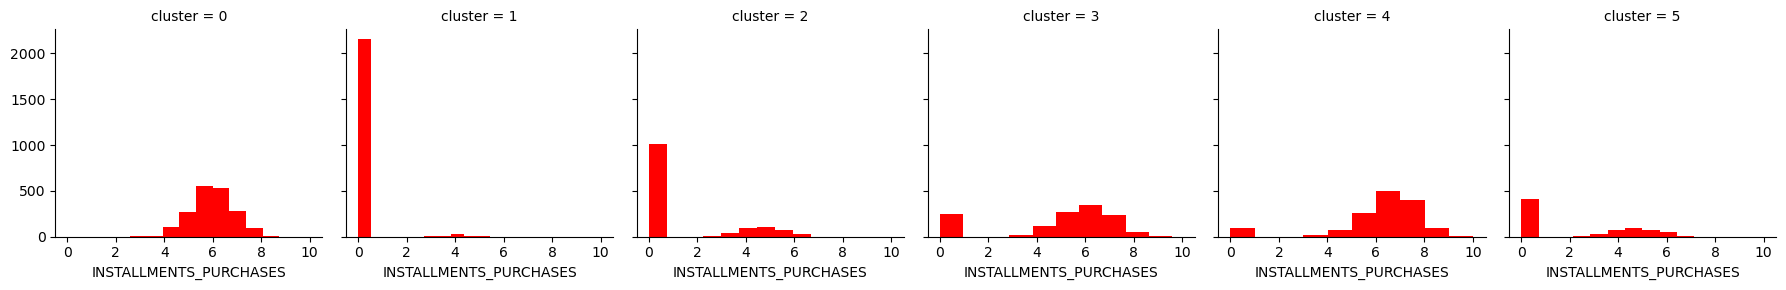

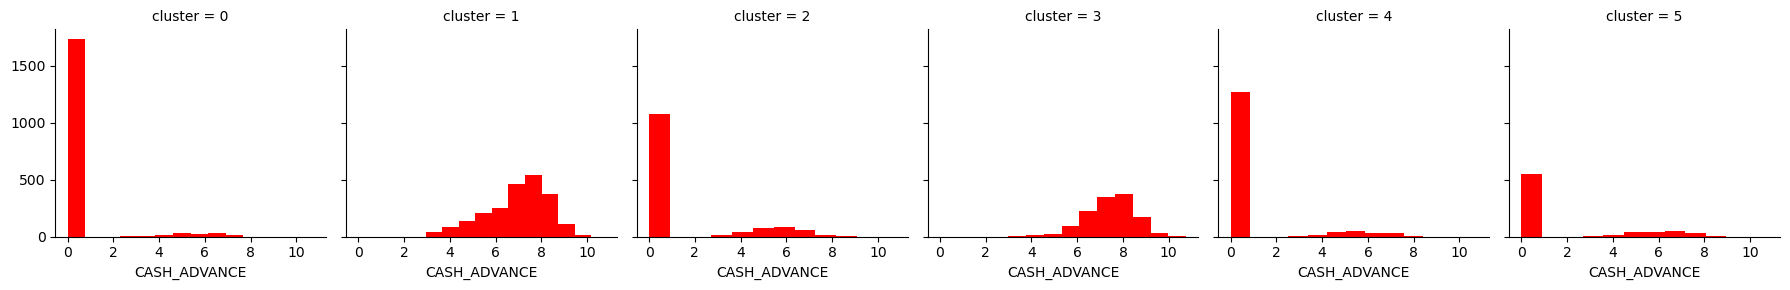

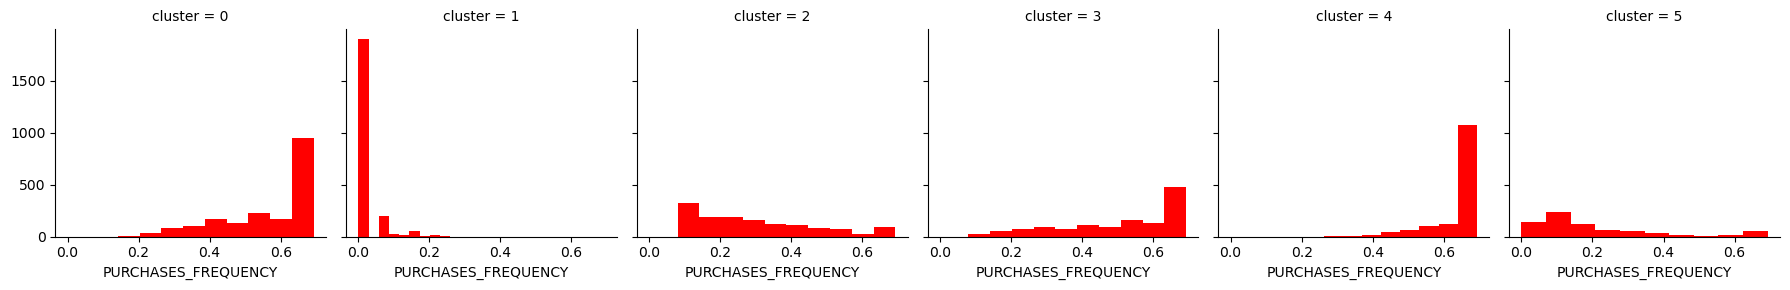

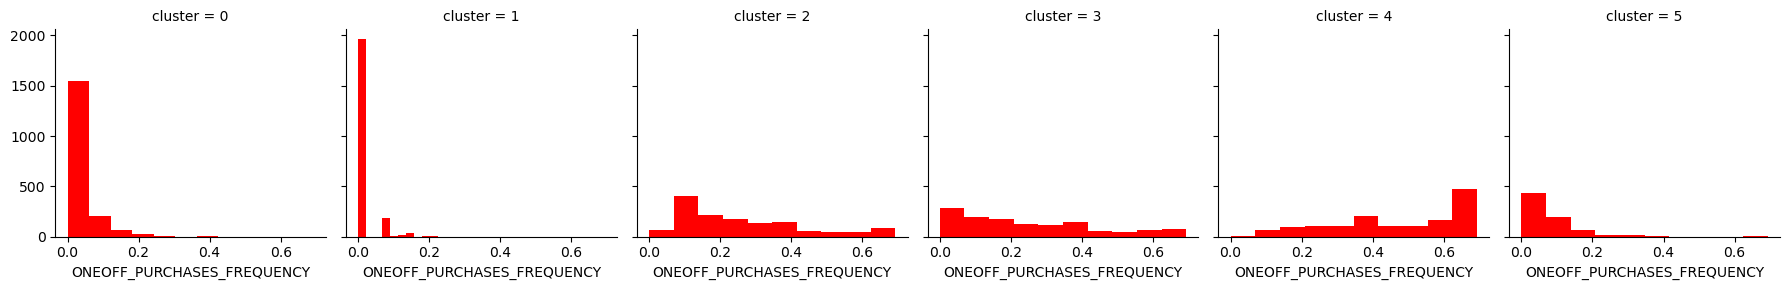

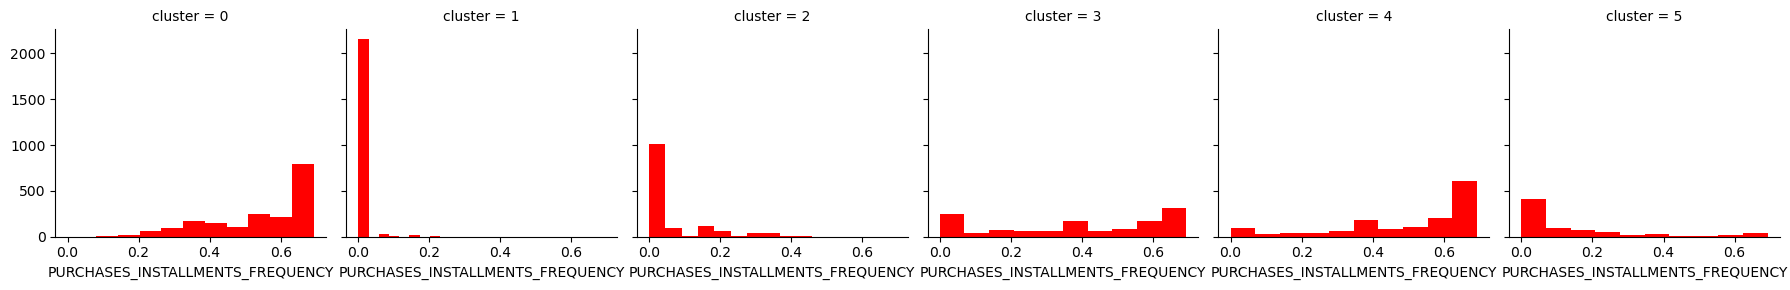

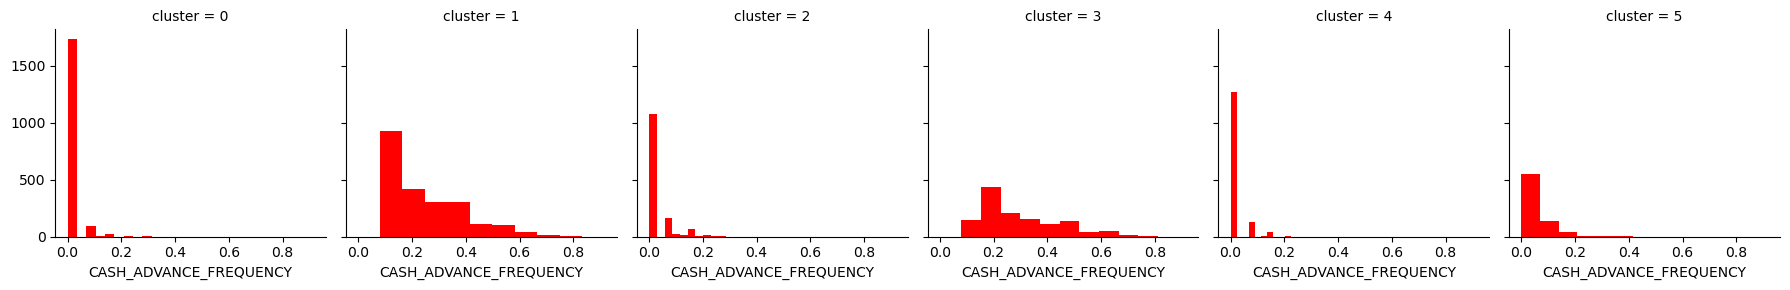

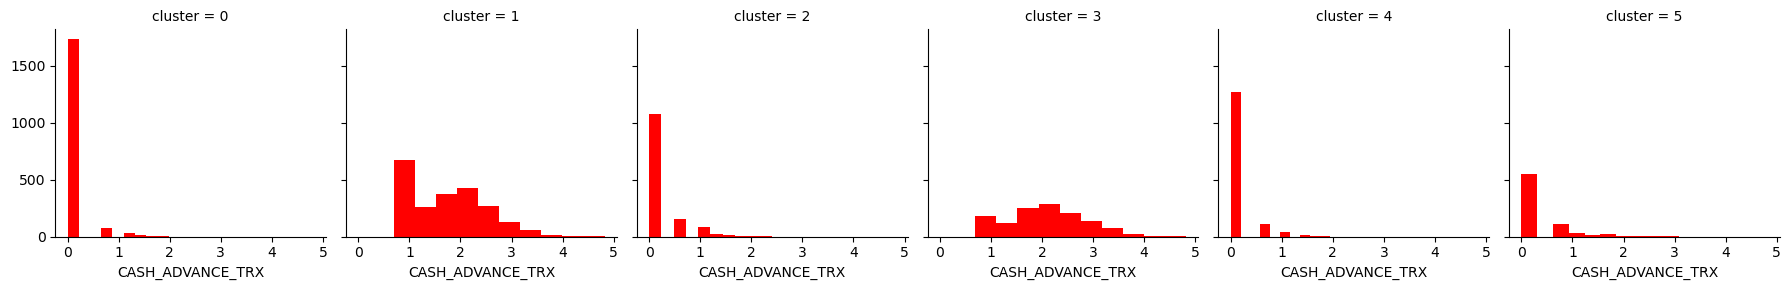

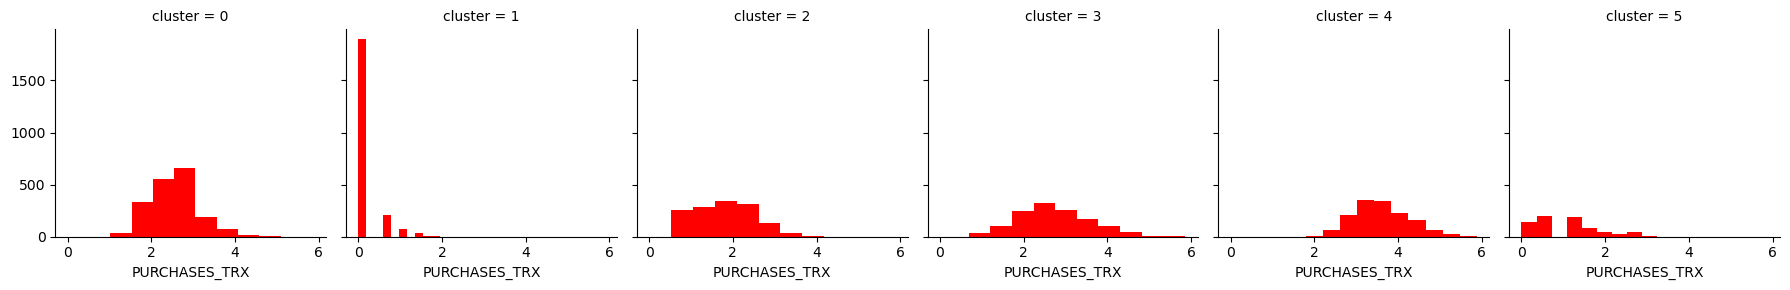

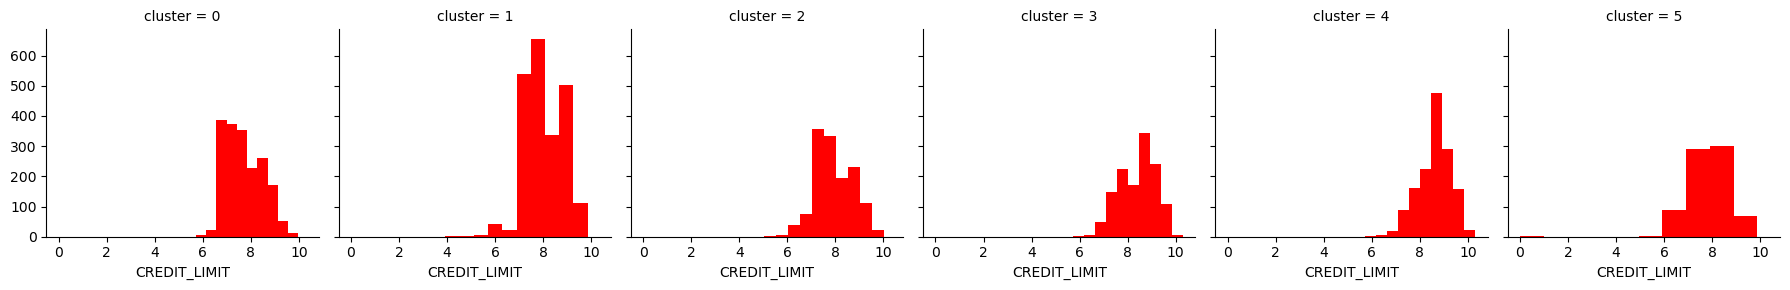

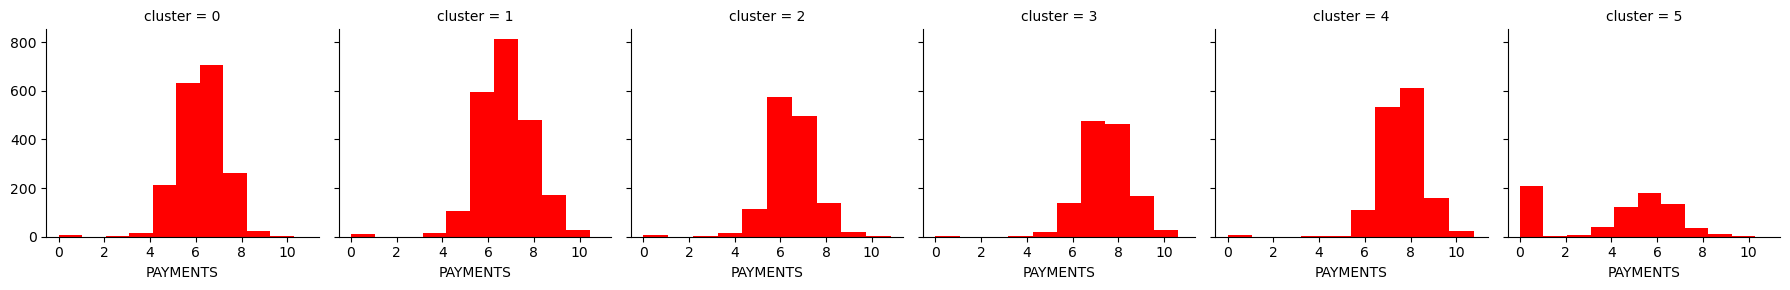

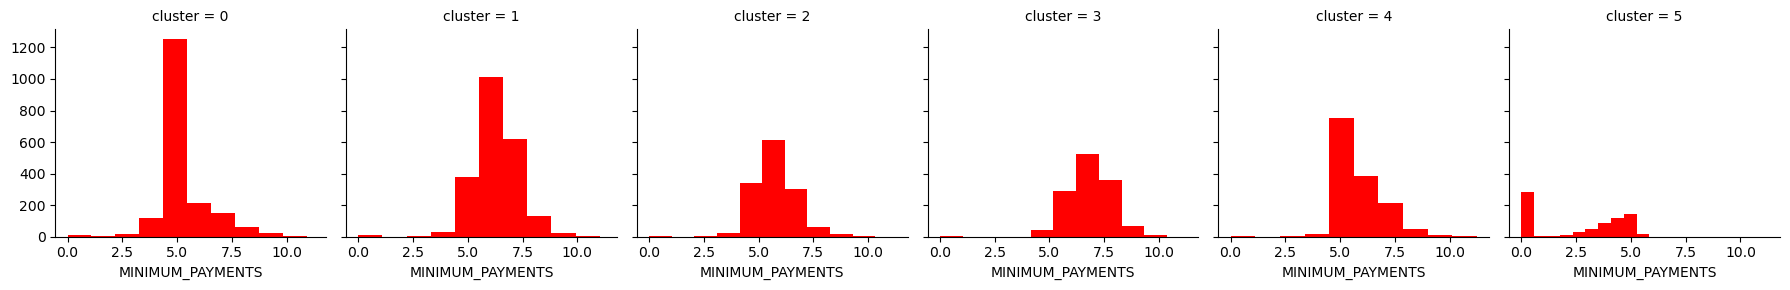

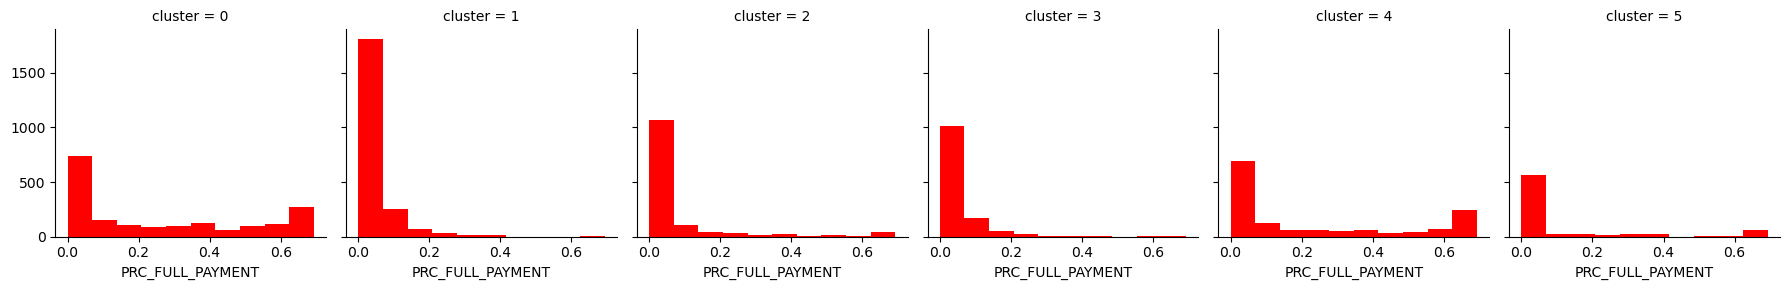

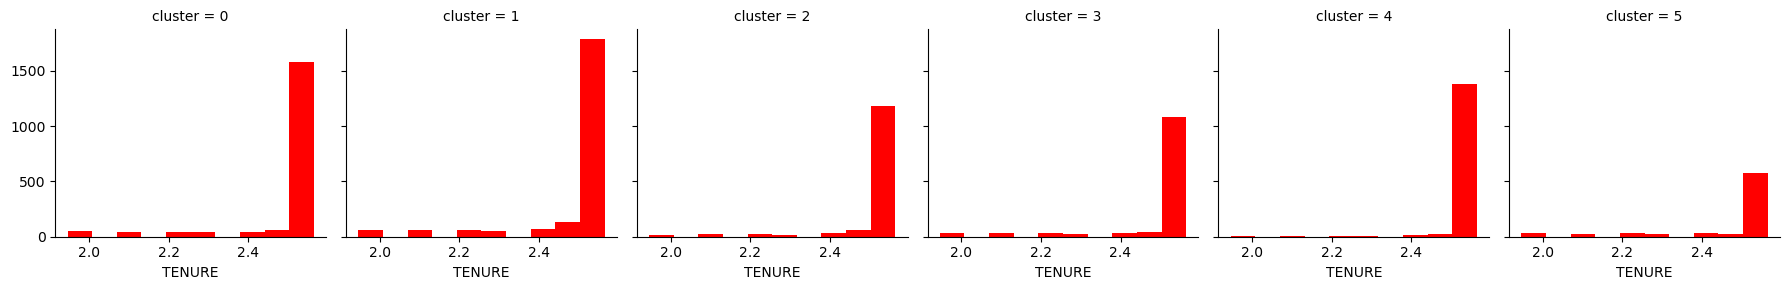

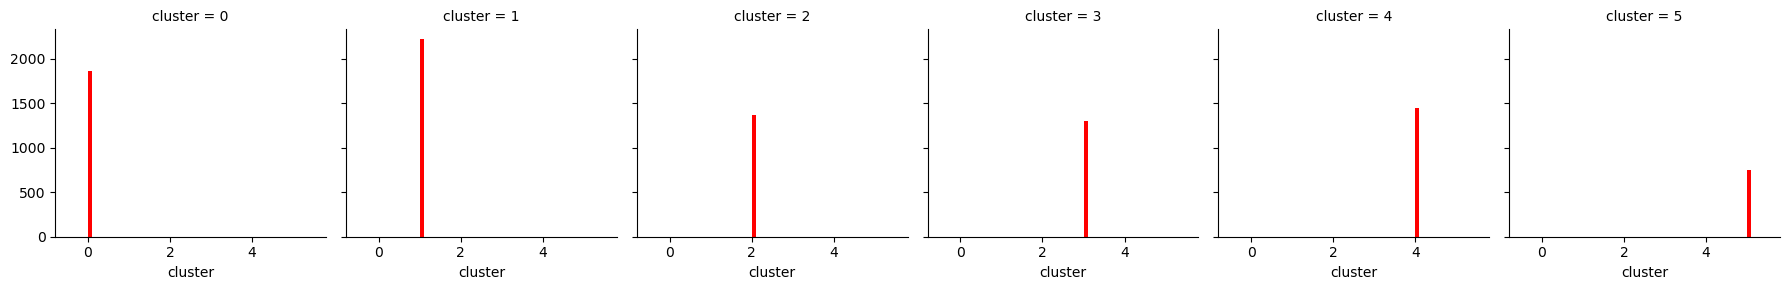

In [253]:
for c in cluster_kmeans:
    grid=sns.FacetGrid(cluster_kmeans,col='cluster')
    grid.map(plt.hist,c,color='red')